# Models with lemmatization

# Import pre-processed and lemmatized full dataset

In [335]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('preprocessed_and_lemmatized_full_data.csv')

# Now df contains the data from the CSV file

In [428]:
df.head()

,text,likes,replies,retweets,quotes,timestamp,url,week,custom_week,month,cleaned_text,Total Words After
0,"Manuprāt, diezgan vienkārši, īsi un konkrēti p...",7,1,0,1,2022-09-03 12:04:00+00:00,https://twitter.com/mooneshe/status/1566034429...,2022-08-29/2022-09-04,.,2022-09,manuprāt diezgan vienkāršs īss konkrēts pasaka...,29
1,"Šitādu pipļuku Saeimā? Paldies, nē. Visur rēgo...",0,0,0,0,2022-09-03 12:44:00+00:00,https://twitter.com/vagargovs/status/156604455...,2022-08-29/2022-09-04,.,2022-09,šitāds saeima paldies visur psrs visur komunis...,30
2,"Pie varas esot, @krisjaniskarins neieklausās u...",5,2,5,0,2022-09-03 13:18:00+00:00,https://twitter.com/FelisMaculosus/status/1566...,2022-08-29/2022-09-04,.,2022-09,vara būt ieklausīt uzņēmējs diskusija izvērtēt...,17
3,Mī un žē… Rosļikova pagalma puiku partijā 40% ...,19,2,5,1,2022-09-03 13:36:00+00:00,https://twitter.com/polittehnologs/status/1566...,2022-08-29/2022-09-04,.,2022-09,mī žē rosļikova puiku partija vidējs izglītība...,21
4,Diemžēl ar garantiju arī tiks Saeimā :(,0,0,0,0,2022-09-03 13:59:00+00:00,https://twitter.com/UldisTrokss/status/1566063...,2022-08-29/2022-09-04,.,2022-09,diemžēl garantija saeima,3


In [429]:
len(df)

26765

# Import pre-processed and lemmatized labelled dataset

In [338]:
# Read the CSV file into a DataFrame
df_labelled = pd.read_csv('preprocessed_and_lemmatized_labelled_data.csv')

In [339]:
df_labelled.head()

,text,label,cleaned_text
0,🎉 VĒSTURISKA UZVARA!Šodien Saeima ar 70 balsīm...,1,vēsturisks uzvara šodien saeima balss pieņemt ...
1,Gobzems nometis visas maskas - šobrīd Saeimā ļ...,-1,gobzems nomest viss maska šobrīd saeima ļoti a...
2,Šodien Saeimas komisijā atbalstīja manus un NA...,0,šodien saeima komisija atbalstīt mans na priek...
3,Latvijas Republikas Saeima gala lasījumā atbal...,0,latvija republika saeima gals lasījums atbalst...
4,"""Jūlijas Stepeņenko vīrs, biedrs Vjačeslavs St...",-1,jūlija stepeņenko vīrs biedrs vjačeslavs stepa...


In [340]:
len(df_labelled)

9985

In [341]:
df_labelled['label'].value_counts()

label
-1    6719
 0    2297
 1     969
Name: count, dtype: int64

In [342]:
# Remove duplicates
df_labelled = df_labelled.drop_duplicates(subset=['cleaned_text'])

# Convert to string
df_labelled['cleaned_text'] = df_labelled['cleaned_text'].astype(str)

# Remove empty text
df_labelled = df_labelled[df_labelled['cleaned_text'] != '']

# Reset index after removing rows
df_labelled = df_labelled.reset_index(drop=True)


In [380]:
len(df_labelled)

9929

# Balancing the classes

# Undersampling

In [343]:
# import pandas as pd
# from sklearn.utils import resample

# # Separate the data into positive, neutral, and negative classes
# positive_class = df_labelled[df_labelled['label'] == 1]
# neutral_class = df_labelled[df_labelled['label'] == 0]
# negative_class = df_labelled[df_labelled['label'] == -1]

# # Resample the minority classes to match the size of the majority class (assuming -1 is the majority)
# neutral_resampled = resample(neutral_class, replace=True, n_samples=len(positive_class), random_state=42)
# negative_resampled = resample(negative_class, replace=True, n_samples=len(positive_class), random_state=42)

# # Combine the resampled classes into a new balanced DataFrame
# df_labelled_balanced = pd.concat([positive_class, neutral_resampled, negative_resampled])

# # Shuffle the new DataFrame to mix the classes
# df_labelled_balanced = df_labelled_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# # Check the class distribution in the new DataFrame
# df_labelled_balanced['label'].value_counts()

# Random oversampling (ROS) procedure

In [344]:
from imblearn.over_sampling import RandomOverSampler

# Separate the data into features (X) and labels (y)
X = df_labelled['cleaned_text']
y = df_labelled['label']

# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the data
X_resampled, y_resampled = ros.fit_resample(X.values.reshape(-1, 1), y)

# Create a new DataFrame with resampled data
df_labelled_balanced = pd.DataFrame({'cleaned_text': X_resampled.flatten(), 'label': y_resampled})

# Shuffle the new DataFrame to mix the classes
df_labelled_balanced = df_labelled_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the class distribution in the new DataFrame
df_labelled_balanced['label'].value_counts()

label
-1    6708
 0    6708
 1    6708
Name: count, dtype: int64

In [391]:
len(df_labelled_balanced)

20124

# Naive Bayes

# Grid search for NB

In [370]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    f1_score,
    auc,
)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import numpy as np

# Assuming df_labelled_balanced is the balanced dataset

# Split the dataset into train and validation sets
df_train, df_val = train_test_split(df_labelled_balanced, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(df_train['cleaned_text'])
X_val_tfidf = vectorizer.transform(df_val['cleaned_text'])

# Define the parameter grid for grid search
param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}

# Initialize lists to store metrics for each alpha value
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Loop through all alpha values and perform evaluations
for alpha_value in param_grid['alpha']:
    # Naive Bayes Classifier
    nb_classifier = MultinomialNB(alpha=alpha_value)
    nb_classifier.fit(X_train_tfidf, df_train['label'])

    # Predictions on the validation set
    nb_val_predictions = nb_classifier.predict(X_val_tfidf)

    # Evaluate Naive Bayes model
    accuracy = accuracy_score(df_val['label'], nb_val_predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(df_val['label'], nb_val_predictions, average='weighted', sample_weight=np.ones(len(df_val['label'])))

    # Print the metrics for the current alpha
    print(f"Naive Bayes Metrics with Alpha={alpha_value}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print()

    # Store metrics for plotting or further analysis
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Find the best alpha based on the highest F1 score
best_alpha_index = np.argmax(f1_scores)
best_alpha = param_grid['alpha'][best_alpha_index]

# Print and store the metrics for the best alpha
print(f"Best Alpha={best_alpha} (Based on F1 Score):")
print(f"Accuracy: {accuracy_scores[best_alpha_index]:.4f}")
print(f"Precision: {precision_scores[best_alpha_index]:.4f}")
print(f"Recall: {recall_scores[best_alpha_index]:.4f}")
print(f"F1 Score: {f1_scores[best_alpha_index]:.4f}")

# Save the best alpha to a file (adjust the file path as needed)
best_alpha_filename = 'best_alpha_nb.npy'
np.save(best_alpha_filename, best_alpha)

Naive Bayes Metrics with Alpha=0.1:
Accuracy: 0.6810
Precision: 0.6843
Recall: 0.6810
F1 Score: 0.6804

Naive Bayes Metrics with Alpha=0.5:
Accuracy: 0.6805
Precision: 0.6842
Recall: 0.6805
F1 Score: 0.6799

Naive Bayes Metrics with Alpha=1.0:
Accuracy: 0.6812
Precision: 0.6851
Recall: 0.6812
F1 Score: 0.6805

Naive Bayes Metrics with Alpha=1.5:
Accuracy: 0.6807
Precision: 0.6848
Recall: 0.6807
F1 Score: 0.6800

Naive Bayes Metrics with Alpha=2.0:
Accuracy: 0.6807
Precision: 0.6851
Recall: 0.6807
F1 Score: 0.6800

Best Alpha=1.0 (Based on F1 Score):
Accuracy: 0.6812
Precision: 0.6851
Recall: 0.6812
F1 Score: 0.6805


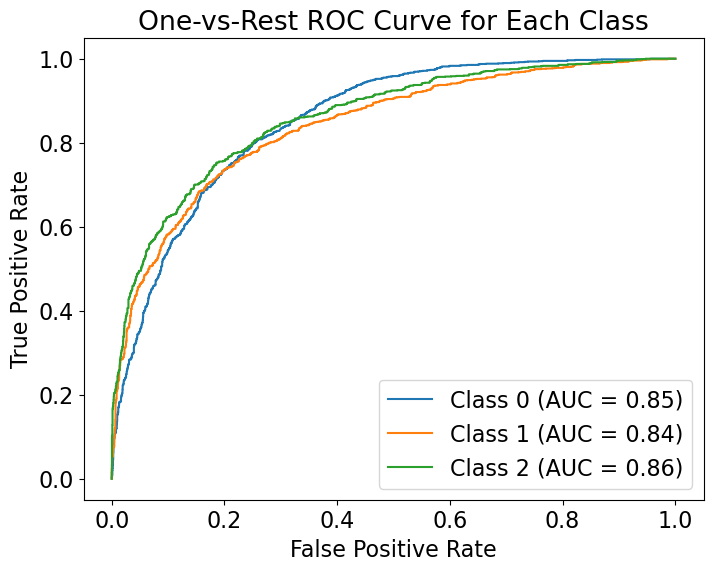

Naive Bayes Metrics:
{'Accuracy': 0.6812422360248447, 'Precision': 0.6851085557103278, 'Recall': 0.6812422360248447, 'F1 Score': 0.6805476151373823, 'Weighted Precision': 0.6851085557103278, 'Weighted Recall': 0.6812422360248447, 'Weighted F1 Score': 0.6805476151373823, 'Weighted Accuracy': 0.6812422360248447, 'Confusion Matrix': array([[1019,  169,  167],
       [ 293,  922,  160],
       [ 276,  218,  801]], dtype=int64), 'FPR': {0: array([0.        , 0.        , 0.        , ..., 0.99850187, 0.99925094,
       1.        ]), 1: array([0.        , 0.        , 0.        , ..., 0.99622642, 0.99811321,
       1.        ]), 2: array([0.       , 0.       , 0.       , ..., 0.996337 , 0.9978022,
       1.       ])}, 'TPR': {0: array([0.00000000e+00, 7.38007380e-04, 2.95202952e-03, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00]), 1: array([0.00000000e+00, 7.27272727e-04, 4.36363636e-03, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00]), 2: array([0.       , 0.0015444, 0

In [346]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, roc_auc_score, roc_curve, f1_score, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Assuming df_labelled_balanced is the balanced dataset

# Split the dataset into train and validation sets
df_train, df_val = train_test_split(df_labelled_balanced, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(df_train['cleaned_text'])
X_val_tfidf = vectorizer.transform(df_val['cleaned_text'])

# Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, df_train['label'])

# Predictions on the validation set
nb_val_predictions = nb_classifier.predict(X_val_tfidf)
nb_val_probabilities = nb_classifier.predict_proba(X_val_tfidf)

# Binarize the labels in a One-vs-Rest fashion
label_binarizer = LabelBinarizer()
y_onehot_val = label_binarizer.fit_transform(df_val['label'])

# Calculate ROC and AUC for all classes
n_classes = len(label_binarizer.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_val[:, i], nb_val_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.title('One-vs-Rest ROC Curve for Each Class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Evaluate Naive Bayes model
nb_accuracy = accuracy_score(df_val['label'], nb_val_predictions)
nb_precision, nb_recall, nb_f1_score, _ = precision_recall_fscore_support(df_val['label'], nb_val_predictions, average='weighted', sample_weight=np.ones(len(df_val['label'])))
nb_conf_matrix = confusion_matrix(df_val['label'], nb_val_predictions)

# Calculate other metrics
weighted_f1 = f1_score(df_val['label'], nb_val_predictions, average='weighted', sample_weight=np.ones(len(df_val['label'])))
weighted_accuracy = accuracy_score(df_val['label'], nb_val_predictions, sample_weight=np.ones(len(df_val['label'])))

# Store all metrics
nb_metrics = {
    'Accuracy': nb_accuracy,
    'Precision': nb_precision,
    'Recall': nb_recall,
    'F1 Score': nb_f1_score,
    'Weighted Precision': nb_precision,
    'Weighted Recall': nb_recall,
    'Weighted F1 Score': weighted_f1,
    'Weighted Accuracy': weighted_accuracy,
    'Confusion Matrix': nb_conf_matrix,
    'FPR': fpr,
    'TPR': tpr,
    'ROC AUC': roc_auc,
}

# Print and store the metrics
print("Naive Bayes Metrics:")
print(nb_metrics)

# Save all metrics to a file (adjust the file path as needed)
metrics_filename = 'naive_bayes_metrics.npy'
np.savez(metrics_filename, **nb_metrics)

# Learning curve NB

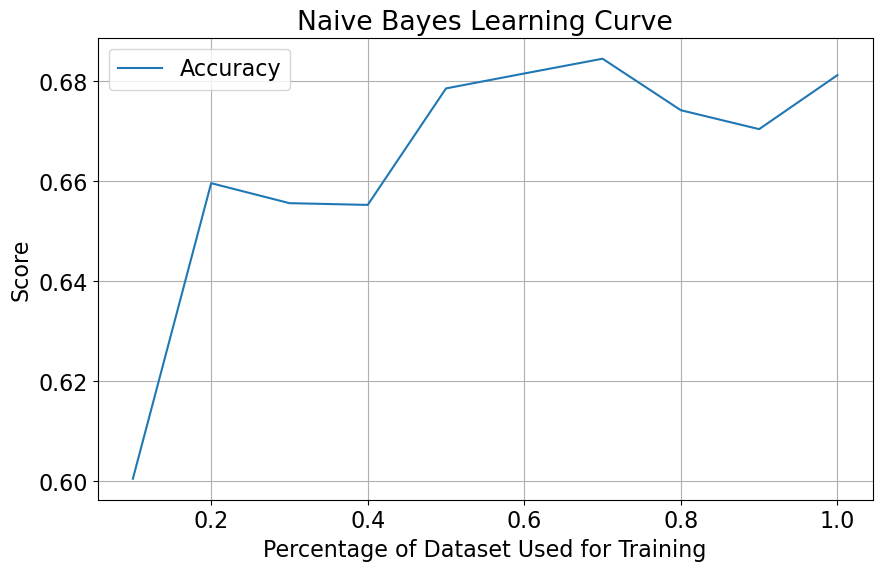

In [347]:
# Define the percentage splits for training
percentage_splits_nb = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Create lists to store metrics for each training size
accuracy_list_nb = []
precision_list_nb = []
recall_list_nb = []
f1_list_nb = []

# Loop over different training sizes
for percentage in percentage_splits_nb:
    # Calculate the training size for the current iteration
    current_training_size = int(len(df_labelled_balanced) * percentage)

    # Take a subset of the dataset
    df_subset = df_labelled_balanced.head(current_training_size)

    # Split the dataset into train and validation sets (80:20 split)
    df_train, df_val = train_test_split(df_subset, test_size=0.2, random_state=42)

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer(max_features=1000)
    X_train_tfidf = vectorizer.fit_transform(df_train['cleaned_text'])
    X_val_tfidf = vectorizer.transform(df_val['cleaned_text'])

    # Naive Bayes Classifier
    nb_classifier = MultinomialNB()
    nb_classifier.fit(X_train_tfidf, df_train['label'])

    # Predictions on the validation set
    nb_val_predictions = nb_classifier.predict(X_val_tfidf)

    # Evaluate Naive Bayes model
    precision, recall, f1_score, _ = precision_recall_fscore_support(df_val['label'], nb_val_predictions, average='weighted', sample_weight=np.ones(len(df_val['label'])))

    # Calculate accuracy
    nb_accuracy = accuracy_score(df_val['label'], nb_val_predictions)

    # Append metrics to the lists
    accuracy_list_nb.append(nb_accuracy)
    precision_list_nb.append(nb_precision)
    recall_list_nb.append(nb_recall)
    f1_list_nb.append(nb_f1_score)

# Plot Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(percentage_splits_nb, accuracy_list_nb, label='Accuracy')
#plt.plot(percentage_splits, precision_list, label='Precision')
#plt.plot(percentage_splits, recall_list, label='Recall')
#plt.plot(percentage_splits, f1_list, label='F1 Score')
plt.title('Naive Bayes Learning Curve')
plt.xlabel('Percentage of Dataset Used for Training')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

# Save Learning Curve Metrics
learning_curve_metrics_nb = {
    'Training Percentages': percentage_splits_nb,
    'Accuracy': accuracy_list_nb,
    'Precision': precision_list_nb,
    'Recall': recall_list_nb,
    'F1 Score': f1_list_nb,
}

# Save all metrics to a file (adjust the file path as needed)
learning_curve_filename = 'naive_bayes_learning_curve_metrics.npy'
np.savez(learning_curve_filename, **learning_curve_metrics_nb)

# SVM

In [348]:
len(df_labelled_balanced)

20124

In [349]:
df_train.shape, df_val.shape

((16099, 2), (4025, 2))

# 5-fold cross validation with parameter grid evaluation

In [368]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    confusion_matrix,
    roc_curve,
    auc,
    f1_score,
)
import numpy as np
import time

# Assuming df_labelled_balanced is your labeled dataset
# Split the labeled dataset into features (X) and labels (y)
X = df_labelled_balanced['cleaned_text']
y = df_labelled_balanced['label']

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(X)

# Define the parameter grid for grid search
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}

# Initialize StratifiedKFold with k=5
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop through all combinations and perform cross-validation
for c_value in param_grid['C']:
    for kernel_type in param_grid['kernel']:
        start_time = time.time()  # Record the start time

        # Initialize lists to store metrics for each fold
        accuracy_scores = []
        precision_scores = []
        recall_scores = []
        f1_scores = []

        # Perform cross-validation
        for train_index, test_index in skf.split(X_tfidf, y):
            X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Train SVM classifier with current parameters
            svm_classifier_current = SVC(C=c_value, kernel=kernel_type, probability=True)
            svm_classifier_current.fit(X_train, y_train)

            # Make predictions on the test set
            svm_val_predictions_current = svm_classifier_current.predict(X_test)

            # Calculate metrics for the current fold
            accuracy_scores.append(accuracy_score(y_test, svm_val_predictions_current))
            precision, recall, f1, _ = precision_recall_fscore_support(y_test, svm_val_predictions_current, average='weighted')
            precision_scores.append(precision)
            recall_scores.append(recall)
            f1_scores.append(f1)

        # Calculate average metrics across folds
        avg_accuracy = np.mean(accuracy_scores)
        avg_precision = np.mean(precision_scores)
        avg_recall = np.mean(recall_scores)
        avg_f1 = np.mean(f1_scores)

        end_time = time.time()  # Record the end time
        elapsed_time = end_time - start_time  # Calculate the elapsed time

        # Print and store the metrics for the current parameter combination
        print(f"SVM Metrics with Kernel={kernel_type} and C={c_value} - Average across folds:")
        print(f"Accuracy: {avg_accuracy:.4f}")
        print(f"Precision: {avg_precision:.4f}")
        print(f"Recall: {avg_recall:.4f}")
        print(f"F1 Score: {avg_f1:.4f}")
        print(f"Elapsed Time: {elapsed_time:.4f} seconds")

SVM Metrics with Kernel=linear and C=0.1 - Average across folds:
Accuracy: 0.7020
Precision: 0.7044
Recall: 0.7020
F1 Score: 0.7020
Elapsed Time: 1396.2777 seconds
SVM Metrics with Kernel=rbf and C=0.1 - Average across folds:
Accuracy: 0.7574
Precision: 0.7617
Recall: 0.7574
F1 Score: 0.7581
Elapsed Time: 1615.2284 seconds
SVM Metrics with Kernel=poly and C=0.1 - Average across folds:
Accuracy: 0.8484
Precision: 0.8829
Recall: 0.8484
F1 Score: 0.8447
Elapsed Time: 1985.2988 seconds
SVM Metrics with Kernel=linear and C=1 - Average across folds:
Accuracy: 0.7475
Precision: 0.7482
Recall: 0.7475
F1 Score: 0.7473
Elapsed Time: 1037.1697 seconds
SVM Metrics with Kernel=rbf and C=1 - Average across folds:
Accuracy: 0.9345
Precision: 0.9341
Recall: 0.9345
F1 Score: 0.9342
Elapsed Time: 1190.2999 seconds
SVM Metrics with Kernel=poly and C=1 - Average across folds:
Accuracy: 0.9692
Precision: 0.9700
Recall: 0.9692
F1 Score: 0.9692
Elapsed Time: 1550.6961 seconds
SVM Metrics with Kernel=linear a

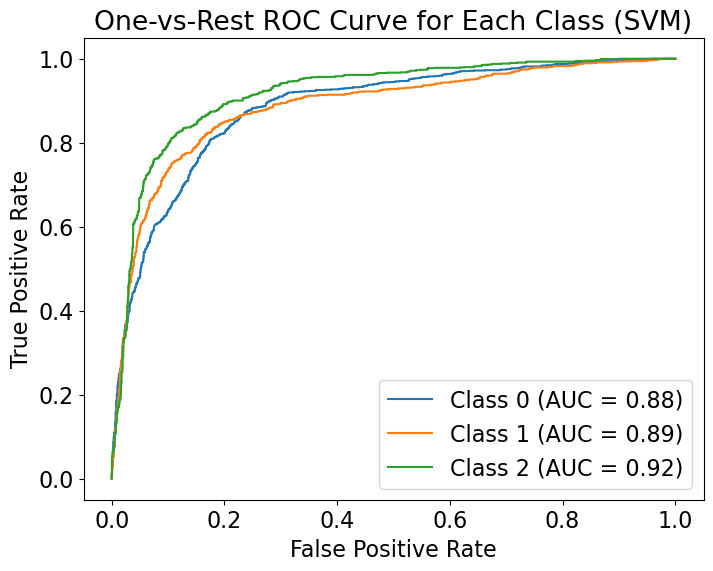

SVM Metrics with Linear Kernel and C=1:
{'Accuracy': 0.76, 'Precision': 0.7605511457437463, 'Recall': 0.76, 'F1 Score': 0.759862286485077, 'Weighted Precision': 0.7605511457437463, 'Weighted Recall': 0.76, 'Weighted F1 Score': 0.759862286485077, 'Weighted Accuracy': 0.76, 'Confusion Matrix': array([[ 995,  183,  177],
       [ 236, 1013,  126],
       [ 150,   94, 1051]], dtype=int64), 'FPR': {0: array([0.        , 0.        , 0.        , ..., 0.9988764 , 0.99962547,
       1.        ]), 1: array([0.        , 0.        , 0.        , ..., 0.99886792, 0.99962264,
       1.        ]), 2: array([0.       , 0.       , 0.       , ..., 0.9956044, 0.996337 ,
       1.       ])}, 'TPR': {0: array([0.00000000e+00, 7.38007380e-04, 9.59409594e-03, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00]), 1: array([0.        , 0.00145455, 0.00727273, ..., 1.        , 1.        ,
       1.        ]), 2: array([0.00000000e+00, 7.72200772e-04, 2.31660232e-03, ...,
       1.00000000e+00, 1.00000000

In [363]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    confusion_matrix,
    roc_curve,
    auc,
    f1_score,
)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # Make sure to import pandas if it's not already imported

# Assuming df_labelled_balanced is your labeled dataset
# Split the labeled dataset into train and validation sets
df_train, df_val = train_test_split(df_labelled_balanced, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(df_train['cleaned_text'])
X_val_tfidf = vectorizer.transform(df_val['cleaned_text'])

# SVM Classifier with linear kernel and C=1
svm_classifier_linear = SVC(kernel='linear', C=1, probability=True)
svm_classifier_linear.fit(X_train_tfidf, df_train['label'])

# Predictions and probabilities on the validation set
svm_val_predictions_linear = svm_classifier_linear.predict(X_val_tfidf)
svm_val_probabilities_linear = svm_classifier_linear.predict_proba(X_val_tfidf)

# Binarize the labels in a One-vs-Rest fashion
label_binarizer = LabelBinarizer()
y_onehot_val = label_binarizer.fit_transform(df_val['label'])

# Calculate ROC and AUC for all classes
n_classes = len(label_binarizer.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_val[:, i], svm_val_probabilities_linear[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.title('One-vs-Rest ROC Curve for Each Class (SVM)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Evaluate SVM model
svm_accuracy_linear = accuracy_score(df_val['label'], svm_val_predictions_linear)
svm_precision_linear, svm_recall_linear, svm_f1_score_linear, _ = precision_recall_fscore_support(df_val['label'], svm_val_predictions_linear, average='weighted')
svm_conf_matrix_linear = confusion_matrix(df_val['label'], svm_val_predictions_linear)

# Calculate other metrics
weighted_f1 = f1_score(df_val['label'], svm_val_predictions_linear, average='weighted', sample_weight=np.ones(len(df_val['label'])))
weighted_accuracy = accuracy_score(df_val['label'], svm_val_predictions_linear, sample_weight=np.ones(len(df_val['label'])))

# Store all metrics
svm_metrics_linear = {
    'Accuracy': svm_accuracy_linear,
    'Precision': svm_precision_linear,
    'Recall': svm_recall_linear,
    'F1 Score': svm_f1_score_linear,
    'Weighted Precision': svm_precision_linear,
    'Weighted Recall': svm_recall_linear,
    'Weighted F1 Score': weighted_f1,
    'Weighted Accuracy': weighted_accuracy,
    'Confusion Matrix': svm_conf_matrix_linear,
    'FPR': fpr,
    'TPR': tpr,
    'ROC AUC': roc_auc,
}

# Print and store the metrics
print("SVM Metrics with Linear Kernel and C=1:")
print(svm_metrics_linear)

# Save all metrics to a file (adjust the file path as needed)
svm_metrics_filename = 'svm_metrics_linear.npy'
np.savez(svm_metrics_filename, **svm_metrics_linear)

# Learning curve SVM

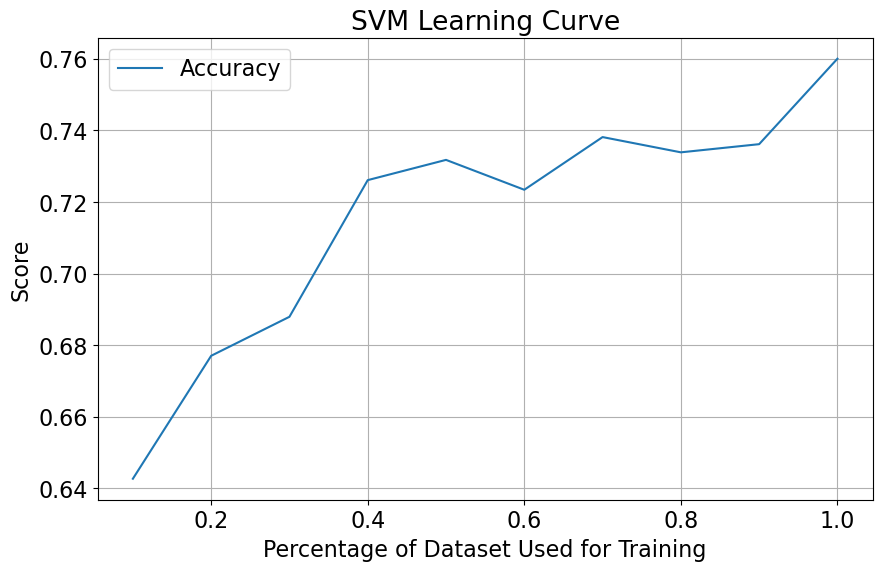

In [355]:
# Define the percentage splits for training
percentage_splits_svm = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Create lists to store metrics for each training size
accuracy_list_svm = []
precision_list_svm = []
recall_list_svm = []
f1_list_svm = []

# Loop over different training sizes
for percentage in percentage_splits_svm:
    # Calculate the training size for the current iteration
    current_training_size = int(len(df_labelled_balanced) * percentage)

    # Take a subset of the dataset
    df_subset = df_labelled_balanced.head(current_training_size)

    # Split the dataset into train and validation sets (80:20 split)
    df_train, df_val = train_test_split(df_subset, test_size=0.2, random_state=42)

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer(max_features=1000)
    X_train_tfidf = vectorizer.fit_transform(df_train['cleaned_text'])
    X_val_tfidf = vectorizer.transform(df_val['cleaned_text'])

    # SVM Classifier with linear kernel and C=1
    svm_classifier_linear = SVC(kernel='linear', C=1, probability=True)
    svm_classifier_linear.fit(X_train_tfidf, df_train['label'])

    # Predictions on the validation set
    svm_val_predictions_linear = svm_classifier_linear.predict(X_val_tfidf)

    # Evaluate SVM model
    precision, recall, f1_score_value, _ = precision_recall_fscore_support(df_val['label'], svm_val_predictions_linear, average='weighted')

    # Calculate accuracy
    svm_accuracy = accuracy_score(df_val['label'], svm_val_predictions_linear)

    # Append metrics to the lists
    accuracy_list_svm.append(svm_accuracy)
    precision_list_svm.append(precision)
    recall_list_svm.append(recall)
    f1_list_svm.append(f1_score_value)

# Plot Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(percentage_splits_svm, accuracy_list_svm, label='Accuracy')
# Uncomment the following lines if you want to plot other metrics
# plt.plot(percentage_splits, precision_list, label='Precision')
# plt.plot(percentage_splits, recall_list, label='Recall')
# plt.plot(percentage_splits, f1_list, label='F1 Score')
plt.title('SVM Learning Curve')
plt.xlabel('Percentage of Dataset Used for Training')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

# Save Learning Curve Metrics
learning_curve_metrics_svm = {
    'Training Percentages': percentage_splits_svm,
    'Accuracy': accuracy_list_svm,
    'Precision': precision_list_svm,
    'Recall': recall_list_svm,
    'F1 Score': f1_list_svm,
}

# Save all metrics to a file (adjust the file path as needed)
learning_curve_filename = 'svm_learning_curve_metrics.npy'
np.savez(learning_curve_filename, **learning_curve_metrics_svm)

# Generating word embeddings with Fasttext

In [395]:
df_labelled_balanced['label'].value_counts()

label
-1    6708
 0    6708
 1    6708
Name: count, dtype: int64

In [397]:
len(df)

26765

In [398]:
df.head()

,text,likes,replies,retweets,quotes,timestamp,url,week,custom_week,month,cleaned_text,Total Words After
0,"Manuprāt, diezgan vienkārši, īsi un konkrēti p...",7,1,0,1,2022-09-03 12:04:00+00:00,https://twitter.com/mooneshe/status/1566034429...,2022-08-29/2022-09-04,.,2022-09,manuprāt diezgan vienkāršs īss konkrēts pasaka...,29
1,"Šitādu pipļuku Saeimā? Paldies, nē. Visur rēgo...",0,0,0,0,2022-09-03 12:44:00+00:00,https://twitter.com/vagargovs/status/156604455...,2022-08-29/2022-09-04,.,2022-09,šitāds saeima paldies visur psrs visur komunis...,30
2,"Pie varas esot, @krisjaniskarins neieklausās u...",5,2,5,0,2022-09-03 13:18:00+00:00,https://twitter.com/FelisMaculosus/status/1566...,2022-08-29/2022-09-04,.,2022-09,vara būt ieklausīt uzņēmējs diskusija izvērtēt...,17
3,Mī un žē… Rosļikova pagalma puiku partijā 40% ...,19,2,5,1,2022-09-03 13:36:00+00:00,https://twitter.com/polittehnologs/status/1566...,2022-08-29/2022-09-04,.,2022-09,mī žē rosļikova puiku partija vidējs izglītība...,21
4,Diemžēl ar garantiju arī tiks Saeimā :(,0,0,0,0,2022-09-03 13:59:00+00:00,https://twitter.com/UldisTrokss/status/1566063...,2022-08-29/2022-09-04,.,2022-09,diemžēl garantija saeima,3


In [399]:
import fasttext

# Assuming df is your DataFrame with "cleaned_text" column
df['cleaned_text'] = df['cleaned_text'].astype(str)  # Convert to string

# Save the training data to a text file for FastText
train_filename = 'fasttext_train.txt'
df[['cleaned_text']].to_csv(train_filename, sep=' ', header=None, index=None)

# Train the FastText model
model = fasttext.train_unsupervised(input=train_filename, model='skipgram', epoch=10, lr=0.1, wordNgrams=2)

# Save the FastText model to a file
model.save_model('fasttext_model.bin')

# Example: Get word embeddings for a few words, like "saeima"
word_embedding_saeima = model.get_word_vector('saeima')
print(f'Embedding for "saeima": {word_embedding_saeima}')

Embedding for "saeima": [ 0.02410613 -0.02594335  0.13816719 -0.14071149 -0.12017725 -0.10889684
 -0.08526991  0.02726785  0.08672669 -0.06372593 -0.09929649  0.05596492
  0.10765374 -0.37143272 -0.10479121  0.05281263 -0.11381571  0.09256128
  0.1710076  -0.16318673  0.11795062  0.011515    0.08683659  0.05568487
 -0.12636429 -0.1345592   0.04774479  0.06762568 -0.0158655   0.225655
  0.07814568  0.15976538 -0.31789273  0.04322199 -0.06968551  0.11721475
  0.20875205 -0.11748488  0.16426808  0.06643615  0.19225296 -0.08108074
 -0.10905196  0.19039312 -0.25234354 -0.11065586 -0.01838795  0.14585778
  0.15812775  0.2009382   0.05295579  0.31923878 -0.1670026  -0.11403415
  0.20566554 -0.23451544  0.1017063  -0.02461471  0.19860202 -0.0111116
 -0.07468539 -0.07858188  0.12479023  0.13577336  0.15132439  0.10584743
 -0.10032399  0.10004287  0.01479361 -0.02800162 -0.19677943 -0.00066776
  0.11207194  0.13713993  0.0639702  -0.12342522 -0.16643783 -0.14404395
  0.29277316  0.05809558  0.00

In [400]:
# Load the trained FastText model
model = fasttext.load_model('fasttext_model.bin')

# Get nearest neighbors for a word, e.g., "saeima"
nearest_neighbors = model.get_nearest_neighbors('partija', k=10)
print(f'Nearest neighbors for "balsot": {nearest_neighbors}')

Nearest neighbors for "balsot": [(0.7077271342277527, 'partija"'), (0.6816555857658386, 'iekļūt'), (0.672819972038269, '"partija'), (0.6666327714920044, 'sīkpartijas'), (0.6587716937065125, 'sīkpartijām'), (0.6354273557662964, 'pārstāvēt'), (0.6266855597496033, 'saeima'), (0.6178216934204102, 'sīkpartiju'), (0.6041448712348938, 'tikt'), (0.5925437211990356, 'barjera"')]


# FastText word embeddings with SVM classifier

In [366]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.svm import SVC
import fasttext
import numpy as np
import time

# Load the trained FastText model
fasttext_model = fasttext.load_model('fasttext_model.bin')

# Assuming df_labelled_balanced is your DataFrame with 'cleaned_text' and 'label' columns
df_labelled_balanced['cleaned_text'] = df_labelled_balanced['cleaned_text'].astype(str)

# Tokenize and obtain embeddings for each word in 'cleaned_text'
df_labelled_balanced['word_embeddings'] = df_labelled_balanced['cleaned_text'].apply(
    lambda x: [fasttext_model.get_word_vector(word) for word in x.split()]
)

# Aggregate word embeddings to obtain tweet-level embeddings (average)
df_labelled_balanced['tweet_embeddings'] = df_labelled_balanced['word_embeddings'].apply(
    lambda x: np.mean(x, axis=0)
)

# Split the labeled data into features (X) and labels (y)
X_labelled = list(df_labelled_balanced['tweet_embeddings'])
y_labelled = df_labelled_balanced['label']

# Reshape feature arrays for SVM
X_labelled = np.array(X_labelled).reshape(-1, 100)  # Assuming embedding size is 100

# Define the parameter grid for grid search
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}

# Initialize StratifiedKFold with k=5
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop through all combinations and perform cross-validation
for c_value in param_grid['C']:
    for kernel_type in param_grid['kernel']:
        start_time = time.time()  # Record the start time

        # Initialize lists to store metrics for each fold
        accuracy_scores = []
        precision_scores = []
        recall_scores = []
        f1_scores = []

        # Perform cross-validation
        for train_index, test_index in skf.split(X_labelled, y_labelled):
            X_train, X_test = X_labelled[train_index], X_labelled[test_index]
            y_train, y_test = y_labelled.iloc[train_index], y_labelled.iloc[test_index]

            # Train SVM classifier with current parameters
            svm_classifier_fasttext_current = SVC(C=c_value, kernel=kernel_type, probability=True)
            svm_classifier_fasttext_current.fit(X_train, y_train)

            # Make predictions on the test set
            svm_val_predictions_fasttext_current = svm_classifier_fasttext_current.predict(X_test)

            # Calculate metrics for the current fold
            accuracy_scores.append(accuracy_score(y_test, svm_val_predictions_fasttext_current))
            precision, recall, f1, _ = precision_recall_fscore_support(y_test, svm_val_predictions_fasttext_current, average='weighted')
            precision_scores.append(precision)
            recall_scores.append(recall)
            f1_scores.append(f1)

        # Calculate average metrics across folds
        avg_accuracy = np.mean(accuracy_scores)
        avg_precision = np.mean(precision_scores)
        avg_recall = np.mean(recall_scores)
        avg_f1 = np.mean(f1_scores)

        end_time = time.time()  # Record the end time
        elapsed_time = end_time - start_time  # Calculate the elapsed time

        # Print and store the metrics for the current parameter combination
        print(f"SVM Metrics with Kernel={kernel_type} and C={c_value} (FastText) - Average across folds:")
        print(f"Accuracy: {avg_accuracy:.4f}")
        print(f"Precision: {avg_precision:.4f}")
        print(f"Recall: {avg_recall:.4f}")
        print(f"F1 Score: {avg_f1:.4f}")
        print(f"Elapsed Time: {elapsed_time:.4f} seconds")

SVM Metrics with Kernel=linear and C=0.1 (FastText) - Average across folds:
Accuracy: 0.6649
Precision: 0.6662
Recall: 0.6649
F1 Score: 0.6630
Elapsed Time: 850.4665 seconds
SVM Metrics with Kernel=rbf and C=0.1 (FastText) - Average across folds:
Accuracy: 0.6869
Precision: 0.6899
Recall: 0.6869
F1 Score: 0.6857
Elapsed Time: 1081.6424 seconds
SVM Metrics with Kernel=poly and C=0.1 (FastText) - Average across folds:
Accuracy: 0.6973
Precision: 0.7090
Recall: 0.6973
F1 Score: 0.6959
Elapsed Time: 879.7478 seconds
SVM Metrics with Kernel=linear and C=1 (FastText) - Average across folds:
Accuracy: 0.6658
Precision: 0.6662
Recall: 0.6658
F1 Score: 0.6646
Elapsed Time: 781.6824 seconds
SVM Metrics with Kernel=rbf and C=1 (FastText) - Average across folds:
Accuracy: 0.7649
Precision: 0.7693
Recall: 0.7649
F1 Score: 0.7653
Elapsed Time: 897.1466 seconds
SVM Metrics with Kernel=poly and C=1 (FastText) - Average across folds:
Accuracy: 0.7832
Precision: 0.7920
Recall: 0.7832
F1 Score: 0.7840
El

In [364]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, roc_curve, auc, f1_score
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import fasttext

# Load the trained FastText model
fasttext_model = fasttext.load_model('fasttext_model.bin')

# Assuming df_labelled_balanced is your DataFrame with 'cleaned_text' and 'label' columns
df_labelled_balanced['cleaned_text'] = df_labelled_balanced['cleaned_text'].astype(str)

# Tokenize and obtain embeddings for each word in 'cleaned_text'
df_labelled_balanced['word_embeddings'] = df_labelled_balanced['cleaned_text'].apply(
    lambda x: [fasttext_model.get_word_vector(word) for word in x.split()]
)

# Aggregate word embeddings to obtain tweet-level embeddings (average)
df_labelled_balanced['tweet_embeddings'] = df_labelled_balanced['word_embeddings'].apply(
    lambda x: np.mean(x, axis=0)
)

# Split the labeled data into features (X) and labels (y)
X_labelled = list(df_labelled_balanced['tweet_embeddings'])
y_labelled = df_labelled_balanced['label']

# Split the labeled data into training and testing sets
X_train_labelled, X_test_labelled, y_train_labelled, y_test_labelled = train_test_split(
    X_labelled, y_labelled, test_size=0.2, random_state=42
)

# Reshape feature arrays for SVM
X_train_labelled = np.array(X_train_labelled).reshape(-1, 100)  # Assuming embedding size is 100
X_test_labelled = np.array(X_test_labelled).reshape(-1, 100)

# Define the parameter grid for grid search
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}

# Loop through all combinations and store metrics
for c_value in param_grid['C']:
    for kernel_type in param_grid['kernel']:
        # Train SVM classifier with current parameters
        svm_classifier_fasttext_current = SVC(C=c_value, kernel=kernel_type, probability=True)
        svm_classifier_fasttext_current.fit(X_train_labelled, y_train_labelled)

        # Make predictions and probabilities on the test set
        svm_val_predictions_fasttext_current = svm_classifier_fasttext_current.predict(X_test_labelled)
        svm_val_probabilities_fasttext_current = svm_classifier_fasttext_current.predict_proba(X_test_labelled)

        # Binarize the labels in a One-vs-Rest fashion
        label_binarizer_fasttext_current = LabelBinarizer()
        y_onehot_val_fasttext_current = label_binarizer_fasttext_current.fit_transform(y_test_labelled)

        # Calculate ROC and AUC for all classes
        n_classes_fasttext_current = len(label_binarizer_fasttext_current.classes_)
        fpr_fasttext_current = dict()
        tpr_fasttext_current = dict()
        roc_auc_fasttext_current = dict()

        for i in range(n_classes_fasttext_current):
            fpr_fasttext_current[i], tpr_fasttext_current[i], _ = roc_curve(
                y_onehot_val_fasttext_current[:, i], svm_val_probabilities_fasttext_current[:, i]
            )
            roc_auc_fasttext_current[i] = auc(fpr_fasttext_current[i], tpr_fasttext_current[i])

        # Store metrics for the current parameter combination
        svm_metrics_fasttext_current = {
            'Accuracy': accuracy_score(y_test_labelled, svm_val_predictions_fasttext_current),
            'Precision': precision_recall_fscore_support(
                y_test_labelled, svm_val_predictions_fasttext_current, average='weighted'
            )[0],
            'Recall': precision_recall_fscore_support(
                y_test_labelled, svm_val_predictions_fasttext_current, average='weighted'
            )[1],
            'F1 Score': precision_recall_fscore_support(
                y_test_labelled, svm_val_predictions_fasttext_current, average='weighted'
            )[2],
            'Weighted Precision': precision_recall_fscore_support(
                y_test_labelled, svm_val_predictions_fasttext_current, average='weighted'
            )[0],
            'Weighted Recall': precision_recall_fscore_support(
                y_test_labelled, svm_val_predictions_fasttext_current, average='weighted'
            )[1],
            'Weighted F1 Score': f1_score(
                y_test_labelled, svm_val_predictions_fasttext_current, average='weighted'
            ),
            'Confusion Matrix': confusion_matrix(y_test_labelled, svm_val_predictions_fasttext_current),
            'FPR': fpr_fasttext_current,
            'TPR': tpr_fasttext_current,
            'ROC AUC': roc_auc_fasttext_current,
        }

        # Print and store the metrics for the current parameter combination
        print(f"SVM Metrics with Kernel={kernel_type} and C={c_value} (FastText):")
        print(svm_metrics_fasttext_current)

        # Save all metrics to a file (adjust the file path as needed)
        svm_metrics_filename_fasttext_current = f'svm_metrics_fasttext_current_{kernel_type}_C_{c_value}.npy'
        np.savez(svm_metrics_filename_fasttext_current, **svm_metrics_fasttext_current)

SVM Metrics with Kernel=linear and C=0.1 (FastText):
{'Accuracy': 0.6613664596273292, 'Precision': 0.6618843089277872, 'Recall': 0.6613664596273292, 'F1 Score': 0.6600742083489791, 'Weighted Precision': 0.6618843089277872, 'Weighted Recall': 0.6613664596273292, 'Weighted F1 Score': 0.6600742083489791, 'Confusion Matrix': array([[1014,  140,  201],
       [ 257,  871,  247],
       [ 269,  249,  777]], dtype=int64), 'FPR': {0: array([0.00000000e+00, 7.49063670e-04, 7.49063670e-04, ...,
       9.95880150e-01, 9.96629213e-01, 1.00000000e+00]), 1: array([0.        , 0.        , 0.        , ..., 0.99849057, 0.99962264,
       1.        ]), 2: array([0.       , 0.       , 0.       , ..., 0.9978022, 0.9992674,
       1.       ])}, 'TPR': {0: array([0.        , 0.        , 0.01328413, ..., 1.        , 1.        ,
       1.        ]), 1: array([0.00000000e+00, 7.27272727e-04, 1.45454545e-03, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00]), 2: array([0.00000000e+00, 7.72200772e-04, 

# Learning curve FastText+SVM

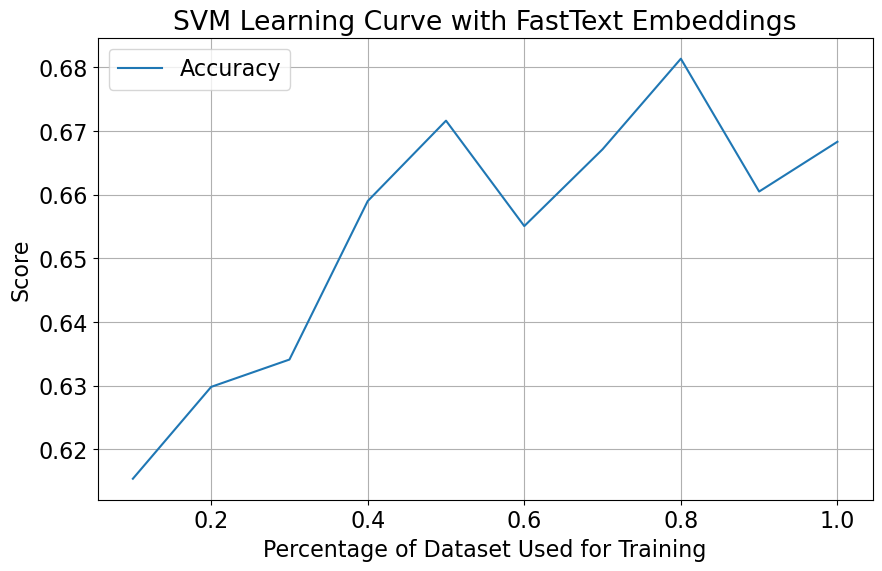

In [360]:
# Load the trained FastText model
fasttext_model = fasttext.load_model('fasttext_model.bin')

# Assuming df_labelled_balanced is your DataFrame with 'cleaned_text' and 'label' columns
df_labelled_balanced['cleaned_text'] = df_labelled_balanced['cleaned_text'].astype(str)

# Tokenize and obtain embeddings for each word in 'cleaned_text'
df_labelled_balanced['word_embeddings'] = df_labelled_balanced['cleaned_text'].apply(
    lambda x: [fasttext_model.get_word_vector(word) for word in x.split()]
)

# Aggregate word embeddings to obtain tweet-level embeddings (average)
df_labelled_balanced['tweet_embeddings'] = df_labelled_balanced['word_embeddings'].apply(
    lambda x: np.mean(x, axis=0)
)

# Define the percentage splits for training
percentage_splits_fasttext_svm = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Create lists to store metrics for each training size
accuracy_list_fasttext_svm = []
precision_list_fasttext_svm = []
recall_list_fasttext_svm = []
f1_list_fasttext_svm = []

# Loop over different training sizes
for percentage in percentage_splits_fasttext_svm:
    # Calculate the training size for the current iteration
    current_training_size = int(len(df_labelled_balanced) * percentage)

    # Take a subset of the dataset
    df_subset = df_labelled_balanced.head(current_training_size)

    # Split the dataset into train and validation sets (80:20 split)
    df_train, df_val = train_test_split(df_subset, test_size=0.2, random_state=42)

    # Reshape feature arrays for SVM
    X_train = np.array(list(df_train['tweet_embeddings'])).reshape(-1, 100)  # Assuming embedding size is 100
    X_val = np.array(list(df_val['tweet_embeddings'])).reshape(-1, 100)

    # SVM Classifier with linear kernel and C=1
    svm_classifier_linear = SVC(kernel='linear', C=1)
    svm_classifier_linear.fit(X_train, df_train['label'])

    # Predictions on the validation set
    svm_val_predictions_linear = svm_classifier_linear.predict(X_val)

    # Evaluate SVM model
    precision, recall, f1_score_value, _ = precision_recall_fscore_support(df_val['label'], svm_val_predictions_linear, average='weighted')

    # Calculate accuracy
    svm_accuracy = accuracy_score(df_val['label'], svm_val_predictions_linear)

    # Append metrics to the lists
    accuracy_list_fasttext_svm.append(svm_accuracy)
    precision_list_fasttext_svm.append(precision)
    recall_list_fasttext_svm.append(recall)
    f1_list_fasttext_svm.append(f1_score_value)

# Plot Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(percentage_splits_fasttext_svm, accuracy_list_fasttext_svm, label='Accuracy')
# Uncomment the following lines if you want to plot other metrics
# plt.plot(percentage_splits, precision_list, label='Precision')
# plt.plot(percentage_splits, recall_list, label='Recall')
# plt.plot(percentage_splits, f1_list, label='F1 Score')
plt.title('SVM Learning Curve with FastText Embeddings')
plt.xlabel('Percentage of Dataset Used for Training')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

# Save Learning Curve Metrics
learning_curve_metrics_fasttext_svm = {
    'Training Percentages': percentage_splits_fasttext_svm,
    'Accuracy': accuracy_list_fasttext_svm,
    'Precision': precision_list_fasttext_svm,
    'Recall': recall_list_fasttext_svm,
    'F1 Score': f1_list_fasttext_svm,
}

# Save all metrics to a file (adjust the file path as needed)
learning_curve_filename = 'svm_learning_curve_metrics_fasttext.npy'
np.savez(learning_curve_filename, **learning_curve_metrics_fasttext_svm)

# Learning curves for traditional classifiers together

In [ ]:
# learning_curve_metrics_nb, learning_curve_metrics_svm, learning_curve_metrics_fasttext_svm

# Assuming you have the following data stored in variables
learning_curve_metrics_nb = {
    'Training Percentages': percentage_splits_nb,
    'Accuracy': accuracy_list_nb,
    'Precision': precision_list_nb,
    'Recall': recall_list_nb,
    'F1 Score': f1_list_nb,
}

learning_curve_metrics_svm = {
    'Training Percentages': percentage_splits_svm,
    'Accuracy': accuracy_list_svm,
    'Precision': precision_list_svm,
    'Recall': recall_list_svm,
    'F1 Score': f1_list_svm,
}

learning_curve_metrics_fasttext_svm = {
    'Training Percentages': percentage_splits_fasttext_svm,
    'Accuracy': accuracy_list_fasttext_svm,
    'Precision': precision_list_fasttext_svm,
    'Recall': recall_list_fasttext_svm,
    'F1 Score': f1_list_fasttext_svm,
}

# Create a comparison chart for learning curves
plt.figure(figsize=(12, 8))

# Plot learning curves for Naive Bayes
plt.plot(learning_curve_metrics_nb['Training Percentages'], learning_curve_metrics_nb['Accuracy'], label='Naive Bayes - Accuracy', marker='o')
# plt.plot(learning_curve_metrics_nb['Training Percentages'], learning_curve_metrics_nb['Precision'], label='Naive Bayes - Precision', marker='o')
# plt.plot(learning_curve_metrics_nb['Training Percentages'], learning_curve_metrics_nb['Recall'], label='Naive Bayes - Recall', marker='o')
# plt.plot(learning_curve_metrics_nb['Training Percentages'], learning_curve_metrics_nb['F1 Score'], label='Naive Bayes - F1 Score', marker='o')

# Plot learning curves for SVM
plt.plot(learning_curve_metrics_svm['Training Percentages'], learning_curve_metrics_svm['Accuracy'], label='SVM - Accuracy', marker='o')
# plt.plot(learning_curve_metrics_svm['Training Percentages'], learning_curve_metrics_svm['Precision'], label='SVM - Precision', marker='o')
# plt.plot(learning_curve_metrics_svm['Training Percentages'], learning_curve_metrics_svm['Recall'], label='SVM - Recall', marker='o')
# plt.plot(learning_curve_metrics_svm['Training Percentages'], learning_curve_metrics_svm['F1 Score'], label='SVM - F1 Score', marker='o')

# Plot learning curves for Fasttext SVM
plt.plot(learning_curve_metrics_fasttext_svm['Training Percentages'], learning_curve_metrics_fasttext_svm['Accuracy'], label='Fasttext SVM - Accuracy', marker='o')
# plt.plot(learning_curve_metrics_fasttext_svm['Training Percentages'], learning_curve_metrics_fasttext_svm['Precision'], label='Fasttext SVM - Precision', marker='o')
# plt.plot(learning_curve_metrics_fasttext_svm['Training Percentages'], learning_curve_metrics_fasttext_svm['Recall'], label='Fasttext SVM - Recall', marker='o')
# plt.plot(learning_curve_metrics_fasttext_svm['Training Percentages'], learning_curve_metrics_fasttext_svm['F1 Score'], label='Fasttext SVM - F1 Score', marker='o')

# Customize the plot
plt.title('Comparison of Learning Curves for Different Classifiers')
plt.xlabel('Size of the dataset')
plt.ylabel('Metric Value')
plt.xticks(percentage_splits_nb)
plt.grid(True)
plt.legend()
plt.show()

# CNN

In [394]:
df_labelled_balanced.head()

,cleaned_text,label,word_embeddings,tweet_embeddings
0,a kas mainīt latvija joprojām divvalodība latv...,-1,"[[0.00032013853, -0.39717516, 0.5683046, 0.131...","[0.12463789, -0.07362965, 0.2524779, -0.175912..."
1,saeima viens lasījums atbalstīt likums grozīju...,0,"[[0.08818289, 0.061040886, 0.025814341, -0.084...","[0.15680987, -0.01133137, 0.01814358, -0.25765..."
2,tauta viedoklis ko politiķis ignorēt pats zaķu...,-1,"[[0.015250072, 0.0887813, 0.08648844, -0.19220...","[0.081825875, -0.08922597, 0.067938454, -0.193..."
3,kāds dīvains sajūta latvija pārvaldīt saeima p...,-1,"[[0.033297993, -0.016143698, 0.24480975, 0.098...","[0.15866517, -0.040478934, 0.10842872, -0.1078..."
4,tblnnk toreiz ļoti atbalstīt investīcija sliek...,0,"[[0.14154106, -0.16866411, -0.26716208, -1.079...","[0.07929303, 0.028814126, -0.07519746, -0.1957..."


# Grid search for CNN

In [413]:
# To avoid out of memory errors, grid search is performed by running the model with parameter combinations separately

126/126 [==============================] - 2s 10ms/step
Epoch 1/5 - Train Loss: 0.7594 - Val Loss: 0.5678 - Val Accuracy: 0.7811
126/126 [==============================] - 1s 9ms/step
Epoch 2/5 - Train Loss: 0.4326 - Val Loss: 0.3354 - Val Accuracy: 0.8773
126/126 [==============================] - 1s 10ms/step
Epoch 3/5 - Train Loss: 0.2240 - Val Loss: 0.2712 - Val Accuracy: 0.9004
126/126 [==============================] - 1s 9ms/step
Epoch 4/5 - Train Loss: 0.1351 - Val Loss: 0.2096 - Val Accuracy: 0.9302
126/126 [==============================] - 1s 10ms/step
Epoch 5/5 - Train Loss: 0.0868 - Val Loss: 0.2286 - Val Accuracy: 0.9287
Configuration - Model: 1D CNN, Num Filters: 128, Filter Sizes: [4, 5, 6]


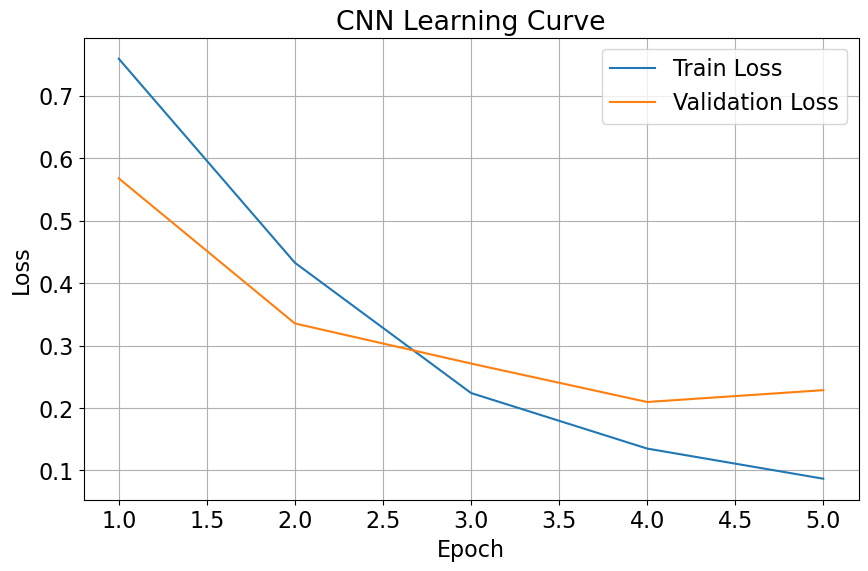

In [412]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import fasttext
import numpy as np
import matplotlib.pyplot as plt
import time

# Load the trained FastText model
fasttext_model = fasttext.load_model('fasttext_model.bin')

# Assuming df_labelled_balanced is your DataFrame with 'cleaned_text' and 'label' columns
df_labelled_balanced['cleaned_text'] = df_labelled_balanced['cleaned_text'].astype(str)

# Tokenize and obtain embeddings for each word in 'cleaned_text'
df_labelled_balanced['word_embeddings'] = df_labelled_balanced['cleaned_text'].apply(
    lambda x: [fasttext_model.get_word_vector(word) for word in x.split()]
)

# Pad sequences to ensure consistent length
max_sequence_length = max(len(seq) for seq in df_labelled_balanced['word_embeddings'])
df_labelled_balanced['word_embeddings_padded'] = df_labelled_balanced['word_embeddings'].apply(
    lambda x: np.pad(x, ((0, max_sequence_length - len(x)), (0, 0)), 'constant', constant_values=np.nan)
)

# Convert to numpy array
X = np.array(df_labelled_balanced['word_embeddings_padded'].tolist())

# Replace NaN values with zeros
X = np.nan_to_num(X)

# Map labels to start from 0
label_mapping = {-1: 0, 0: 1, 1: 2}
df_labelled_balanced['label_mapped'] = df_labelled_balanced['label'].map(label_mapping)

# Split the labeled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, df_labelled_balanced['label_mapped'], test_size=0.2, random_state=42
)

# Define the CNN model configuration
num_filters = 128
filter_sizes = [4, 5, 6]
num_classes = 3
num_layers = len(filter_sizes)

# Build a 1D CNN model
model_cnn = Sequential()
for filter_size in filter_sizes:
    model_cnn.add(Conv1D(num_filters, filter_size, activation='relu', input_shape=(max_sequence_length, 100)))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(num_classes, activation='softmax'))

# Compile the model
model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Lists to store metrics over epochs
train_losses_cnn = []
val_losses_cnn = []
accuracies_cnn = []
precisions_cnn = []
recalls_cnn = []
f1_scores_cnn = []
conf_matrices_cnn = []

# Train the CNN model and collect metrics
start_time = time.time()

num_epochs_cnn = 5

for epoch in range(num_epochs_cnn):
    history = model_cnn.fit(X_train, y_train, epochs=1, batch_size=64, validation_data=(X_test, y_test), verbose=0)

    # Evaluate on training data
    y_train_pred = np.argmax(model_cnn.predict(X_train), axis=1)
    train_loss = history.history['loss'][0]
    train_losses_cnn.append(train_loss)

    # Evaluate on validation data
    y_val_pred = np.argmax(model_cnn.predict(X_test), axis=1)
    val_loss = history.history['val_loss'][0]
    val_losses_cnn.append(val_loss)

    # Calculate metrics
    accuracy_cnn = accuracy_score(y_test, y_val_pred)
    accuracies_cnn.append(accuracy_cnn)

    precision_cnn, recall_cnn, f1_cnn, _ = precision_recall_fscore_support(y_test, y_val_pred, average='weighted')
    precisions_cnn.append(precision_cnn)
    recalls_cnn.append(recall_cnn)
    f1_scores_cnn.append(f1_cnn)

    conf_matrix_cnn = confusion_matrix(y_test, y_val_pred)
    conf_matrices_cnn.append(conf_matrix_cnn)

    print(f'Epoch {epoch + 1}/{num_epochs_cnn} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f} - Val Accuracy: {accuracy_cnn:.4f}')

# Calculate the time taken to train the model
end_time = time.time()
training_time = end_time - start_time

# Print out the results for the specific configuration
print(f"Configuration - Model: 1D CNN, Num Filters: {num_filters}, Filter Sizes: {filter_sizes}")
# print(f"Metrics:")
# print(f"  Accuracy: {accuracy_cnn:.4f}")
# print(f"  Precision: {precision_cnn:.4f}")
# print(f"  Recall: {recall_cnn:.4f}")
# print(f"  F1 Score: {f1_cnn:.4f}")
# print(f"Training Time: {training_time:.2f} seconds")

# Plot Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs_cnn + 1), train_losses_cnn, label='Train Loss')
plt.plot(range(1, num_epochs_cnn + 1), val_losses_cnn, label='Validation Loss')
plt.title('CNN Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

126/126 [==============================] - 2s 9ms/step
Epoch 1/5 - Train Loss: 0.7723 - Val Loss: 0.6058 - Val Accuracy: 0.7533
126/126 [==============================] - 1s 10ms/step
Epoch 2/5 - Train Loss: 0.4633 - Val Loss: 0.3735 - Val Accuracy: 0.8663
126/126 [==============================] - 1s 9ms/step
Epoch 3/5 - Train Loss: 0.2413 - Val Loss: 0.2559 - Val Accuracy: 0.9175
126/126 [==============================] - 1s 10ms/step
Epoch 4/5 - Train Loss: 0.1516 - Val Loss: 0.3315 - Val Accuracy: 0.8802
126/126 [==============================] - 1s 9ms/step
Epoch 5/5 - Train Loss: 0.1041 - Val Loss: 0.1926 - Val Accuracy: 0.9389


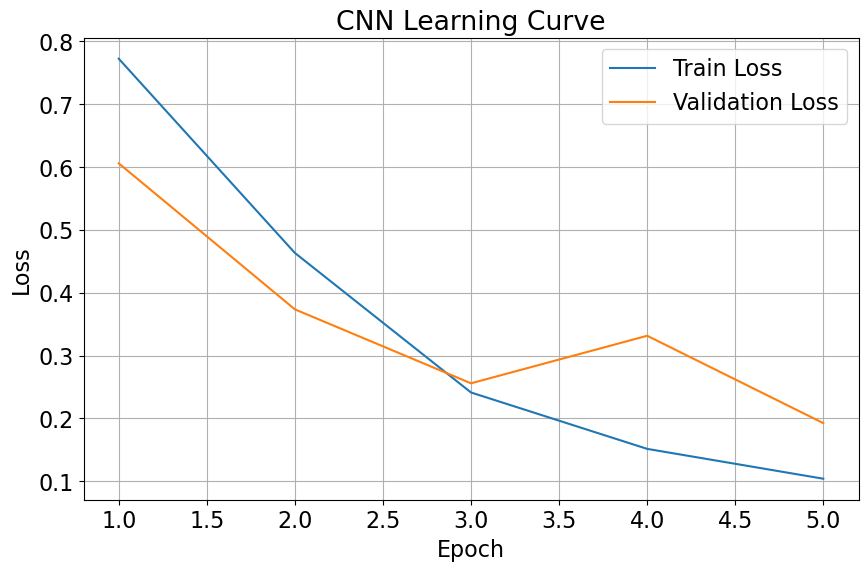

In [406]:
# Load the trained FastText model
fasttext_model = fasttext.load_model('fasttext_model.bin')

# Assuming df_labelled_balanced is your DataFrame with 'cleaned_text' and 'label' columns
df_labelled_balanced['cleaned_text'] = df_labelled_balanced['cleaned_text'].astype(str)

# Tokenize and obtain embeddings for each word in 'cleaned_text'
df_labelled_balanced['word_embeddings'] = df_labelled_balanced['cleaned_text'].apply(
    lambda x: [fasttext_model.get_word_vector(word) for word in x.split()]
)

# Pad sequences to ensure consistent length
max_sequence_length = max(len(seq) for seq in df_labelled_balanced['word_embeddings'])
df_labelled_balanced['word_embeddings_padded'] = df_labelled_balanced['word_embeddings'].apply(
    lambda x: np.pad(x, ((0, max_sequence_length - len(x)), (0, 0)), 'constant', constant_values=np.nan)
)

# Convert to numpy array
X = np.array(df_labelled_balanced['word_embeddings_padded'].tolist())

# Replace NaN values with zeros
X = np.nan_to_num(X)

# Map labels to start from 0
label_mapping = {-1: 0, 0: 1, 1: 2}
df_labelled_balanced['label_mapped'] = df_labelled_balanced['label'].map(label_mapping)

# Split the labeled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, df_labelled_balanced['label_mapped'], test_size=0.2, random_state=42
)

# Build a 1D CNN model
embedding_size = 100
num_filters = 128
filter_sizes = [3, 4, 5]
num_classes = 3

model_cnn = Sequential()
model_cnn.add(Conv1D(num_filters, 3, activation='relu', input_shape=(max_sequence_length, embedding_size)))
model_cnn.add(Conv1D(num_filters, 4, activation='relu'))
model_cnn.add(Conv1D(num_filters, 5, activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(num_classes, activation='softmax'))

# Compile the model
model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Lists to store metrics over epochs
train_losses_cnn = []
val_losses_cnn = []
accuracies_cnn = []
precisions_cnn = []
recalls_cnn = []
f1_scores_cnn = []
conf_matrices_cnn = []

# Train the CNN model and collect metrics
num_epochs_cnn = 5

for epoch in range(num_epochs_cnn):
    history = model_cnn.fit(X_train, y_train, epochs=1, batch_size=64, validation_data=(X_test, y_test), verbose=0)

    # Evaluate on training data
    y_train_pred = np.argmax(model_cnn.predict(X_train), axis=1)
    train_loss = history.history['loss'][0]
    train_losses_cnn.append(train_loss)

    # Evaluate on validation data
    y_val_pred = np.argmax(model_cnn.predict(X_test), axis=1)
    val_loss = history.history['val_loss'][0]
    val_losses_cnn.append(val_loss)

    # Calculate metrics
    accuracy_cnn = accuracy_score(y_test, y_val_pred)
    accuracies_cnn.append(accuracy_cnn)

    precision_cnn, recall_cnn, f1_cnn, _ = precision_recall_fscore_support(y_test, y_val_pred, average='weighted')
    precisions_cnn.append(precision_cnn)
    recalls_cnn.append(recall_cnn)
    f1_scores_cnn.append(f1_cnn)

    conf_matrix_cnn = confusion_matrix(y_test, y_val_pred)
    conf_matrices_cnn.append(conf_matrix_cnn)

    print(f'Epoch {epoch + 1}/{num_epochs_cnn} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f} - Val Accuracy: {accuracy_cnn:.4f}')

# Plot Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs_cnn + 1), train_losses_cnn, label='Train Loss')
plt.plot(range(1, num_epochs_cnn + 1), val_losses_cnn, label='Validation Loss')
plt.title('CNN Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# ROC and AUC curves for all models

In [326]:
nb_metrics

{'Accuracy': 0.6812422360248447,
 'Precision': 0.6851085557103278,
 'Recall': 0.6812422360248447,
 'F1 Score': 0.6805476151373823,
 'Weighted Precision': 0.6851085557103278,
 'Weighted Recall': 0.6812422360248447,
 'Weighted F1 Score': 0.6805476151373823,
 'Weighted Accuracy': 0.6812422360248447,
 'Confusion Matrix': array([[1019,  169,  167],
        [ 293,  922,  160],
        [ 276,  218,  801]], dtype=int64),
 'FPR': {0: array([0.        , 0.        , 0.        , ..., 0.99850187, 0.99925094,
         1.        ]),
  1: array([0.        , 0.        , 0.        , ..., 0.99622642, 0.99811321,
         1.        ]),
  2: array([0.       , 0.       , 0.       , ..., 0.996337 , 0.9978022,
         1.       ])},
 'TPR': {0: array([0.00000000e+00, 7.38007380e-04, 2.95202952e-03, ...,
         1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
  1: array([0.00000000e+00, 7.27272727e-04, 4.36363636e-03, ...,
         1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
  2: array([0.       , 0.0

In [ ]:
# The following metrics dictionaries
# nb_metrics, svm_metrics_linear, svm_metrics_fasttext, cnn_metrics

# List of classifiers and their ROC curve information
classifiers = ['Naive Bayes', 'SVM', 'FastText with SVM', 'FastText with CNN']
roc_curves = [
    (nb_metrics['FPR'][0], nb_metrics['TPR'][0], nb_metrics['ROC AUC'][0]),
    (svm_metrics_linear['FPR'][0], svm_metrics_linear['TPR'][0], svm_metrics_linear['ROC AUC'][0]),
    (svm_metrics_fasttext['FPR'][0], svm_metrics_fasttext['TPR'][0], svm_metrics_fasttext['ROC AUC'][0]),
    (cnn_metrics['FPR'][0], cnn_metrics['TPR'][0], cnn_metrics['ROC AUC'][0])
]

# Define a color map for better aesthetics
colors = plt.cm.viridis(np.linspace(0, 1, len(classifiers)))

# Plotting ROC curves with enhanced aesthetics
plt.figure(figsize=(10, 6))
for i, (fpr, tpr, roc_auc_value) in enumerate(roc_curves):
    plt.plot(fpr, tpr, label=f'{classifiers[i]} (AUC = {roc_auc_value:.2f})', color=colors[i], linestyle='-', linewidth=2)

# Adding random classifier (no skill)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Chance level (AUC=0.5)', alpha=0.8)

plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from plotnine import ggplot, aes, geom_line, theme_minimal, theme, labs

# Convert ROC curve data to a tidy DataFrame
roc_data = []
for i, (fpr, tpr, roc_auc_value) in enumerate(roc_curves):
    roc_df = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'classifier': classifiers[i], 'AUC': roc_auc_value})
    roc_data.append(roc_df)

roc_df = pd.concat(roc_data)

# Plot ROC curves using plotnine
(
    ggplot(roc_df, aes(x='fpr', y='tpr', color='classifier', linetype='classifier'))
    + geom_line(size=1.5)
    + theme_minimal()
    + labs(title='Receiver Operating Characteristic (ROC) Curves', x='False Positive Rate', y='True Positive Rate')
)

# Confusion matrices for all models

In [ ]:
import seaborn as sns

# Metrics: svm_conf_matrix_variable, conf_matrix_variable, conf_matrix_svm, conf_matrix_cnn are already defined

# Convert the values in the confusion matrices to integers
conf_matrices_int = [conf_matrix.astype(int) for conf_matrix in [svm_conf_matrix_variable, conf_matrix_variable, conf_matrix_svm, conf_matrix_cnn]]

model_names = ['SVM', 'NB', 'FastText+SVM', 'FastText+CNN']

# Map the original labels to -1, 0, 1
label_mapping = {0: -1, 1: 0, 2: 1}

# Plotting Confusion Matrices and Confusion Matrix Table
plt.figure(figsize=(15, 5))

for i in range(4):
    plt.subplot(1, 4, i+1)
    
    # Plot the heatmap with integer values, fmt='d' ensures formatting as integers
    sns.heatmap(conf_matrices_int[i], annot=False, fmt='d', cmap="Blues", cbar=False, linewidths=.5)
    
    plt.title(f'{model_names[i]} Confusion Matrix', fontsize=12)
    plt.xlabel('Predicted', fontsize=10)
    plt.ylabel('Actual', fontsize=10)

    # Add labels
    labels = [str(label_mapping[l]) for l in range(conf_matrices_int[i].shape[0])]
    plt.xticks(np.arange(len(labels)) + 0.5, labels)
    plt.yticks(np.arange(len(labels)) + 0.5, labels)

    for x in range(conf_matrices_int[i].shape[0]):
        for y in range(conf_matrices_int[i].shape[1]):
            plt.text(y + 0.5, x + 0.5, f'{conf_matrices_int[i][x, y]}', ha='center', va='center', fontsize=12)

# Confusion Matrix Table
fp = [conf_matrices_int[i].sum(axis=0)[label_mapping[0]] - conf_matrices_int[i][label_mapping[0], label_mapping[0]] for i in range(4)]
fn = [conf_matrices_int[i].sum(axis=1)[label_mapping[0]] - conf_matrices_int[i][label_mapping[0], label_mapping[0]] for i in range(4)]
tp = [conf_matrices_int[i][label_mapping[0], label_mapping[0]] for i in range(4)]
tn = [conf_matrices_int[i].sum() - fp[i] - fn[i] - tp[i] for i in range(4)]

conf_table_data = {
    'Model': model_names,
    'False Positive (FP)': fp,
    'False Negative (FN)': fn,
    'True Positive (TP)': tp,
    'True Negative (TN)': tn,
}

conf_table = pd.DataFrame(conf_table_data)
print("Confusion Matrix Table:")
print(conf_table)

plt.tight_layout()
plt.show()


In [ ]:
svm_conf_matrix_variable, conf_matrix_variable, conf_matrix_svm, conf_matrix_cnn

# Models without lemmatization

# Import preprocessed and not lemmatized full data

In [21]:
import pandas as pd
df_not_lemmatized = pd.read_csv('preprocessed_not_lemmatized_full_data.csv')

# Import preprocessed and not lemmatized labelled data

In [22]:
df_labelled_not_lemmatized = pd.read_csv('preprocessed_not_lemmatized_labelled_data.csv')

In [23]:
# Remove duplicates
df_labelled_not_lemmatized = df_labelled_not_lemmatized.drop_duplicates(subset=['cleaned_text'])

# Convert to string
df_labelled_not_lemmatized['cleaned_text'] = df_labelled_not_lemmatized['cleaned_text'].astype(str)

# Remove empty text
df_labelled_not_lemmatized = df_labelled_not_lemmatized[df_labelled_not_lemmatized['cleaned_text'] != '']

# Reset index after removing rows
df_labelled_not_lemmatized = df_labelled_not_lemmatized.reset_index(drop=True)

In [24]:
len(df_labelled_not_lemmatized)

9932

# Random undersampling

In [27]:
import pandas as pd
from sklearn.utils import resample

# Separate the data into positive, neutral, and negative classes
positive_class = df_labelled_not_lemmatized[df_labelled_not_lemmatized['label'] == 1]
neutral_class = df_labelled_not_lemmatized[df_labelled_not_lemmatized['label'] == 0]
negative_class = df_labelled_not_lemmatized[df_labelled_not_lemmatized['label'] == -1]

# Resample the minority classes to match the size of the majority class (assuming -1 is the majority)
neutral_resampled = resample(neutral_class, replace=True, n_samples=len(positive_class), random_state=42)
negative_resampled = resample(negative_class, replace=True, n_samples=len(positive_class), random_state=42)

# Combine the resampled classes into a new balanced DataFrame
df_labelled_balanced = pd.concat([positive_class, neutral_resampled, negative_resampled])

# Shuffle the new DataFrame to mix the classes
df_labelled_balanced = df_labelled_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the class distribution in the new DataFrame
df_labelled_balanced['label'].value_counts()

label
 1    967
-1    967
 0    967
Name: count, dtype: int64

# ROS

In [7]:
from imblearn.over_sampling import RandomOverSampler
# Assuming df_labelled_not_lemmatized is your DataFrame
# Replace 'features' and 'label' with your actual column names

# Separate features and labels
X = df_labelled_not_lemmatized['cleaned_text'].values  # Replace with your actual feature column
y = df_labelled_not_lemmatized['label'].values  # Replace with your actual label column

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Perform random oversampling
X_resampled, y_resampled = ros.fit_resample(X.reshape(-1, 1), y)

# Convert the resampled data back to a DataFrame
df_resampled = pd.DataFrame({'cleaned_text': X_resampled.flatten(), 'label': y_resampled})

# Check the value counts after oversampling
print(df_resampled['label'].value_counts())

label
 1    6708
-1    6708
 0    6708
Name: count, dtype: int64


In [28]:
len(df_labelled_balanced), len(df_not_lemmatized)

(2901, 26765)

# Naive Bayes

In [390]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    f1_score,
    auc,
)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import numpy as np

# Split the dataset into train and validation sets
df_train, df_val = train_test_split(df_resampled, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(df_train['cleaned_text'])
X_val_tfidf = vectorizer.transform(df_val['cleaned_text'])

# Define the parameter grid for grid search
param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}

# Initialize lists to store metrics for each alpha value
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Loop through all alpha values and perform evaluations
for alpha_value in param_grid['alpha']:
    # Naive Bayes Classifier
    nb_classifier = MultinomialNB(alpha=alpha_value)
    nb_classifier.fit(X_train_tfidf, df_train['label'])

    # Predictions on the validation set
    nb_val_predictions = nb_classifier.predict(X_val_tfidf)

    # Evaluate Naive Bayes model
    accuracy = accuracy_score(df_val['label'], nb_val_predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(df_val['label'], nb_val_predictions, average='weighted', sample_weight=np.ones(len(df_val['label'])))

    # Print the metrics for the current alpha
    print(f"Naive Bayes Metrics with Alpha={alpha_value}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print()

    # Store metrics for plotting or further analysis
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Find the best alpha based on the highest F1 score
best_alpha_index = np.argmax(f1_scores)
best_alpha = param_grid['alpha'][best_alpha_index]

# Print and store the metrics for the best alpha
print(f"Best Alpha={best_alpha} (Based on F1 Score):")
print(f"Accuracy: {accuracy_scores[best_alpha_index]:.4f}")
print(f"Precision: {precision_scores[best_alpha_index]:.4f}")
print(f"Recall: {recall_scores[best_alpha_index]:.4f}")
print(f"F1 Score: {f1_scores[best_alpha_index]:.4f}")

# Save the best alpha to a file (adjust the file path as needed)
best_alpha_filename = 'best_alpha_nb.npy'
np.save(best_alpha_filename, best_alpha)

Naive Bayes Metrics with Alpha=0.1:
Accuracy: 0.6611
Precision: 0.6666
Recall: 0.6611
F1 Score: 0.6593

Naive Bayes Metrics with Alpha=0.5:
Accuracy: 0.6624
Precision: 0.6683
Recall: 0.6624
F1 Score: 0.6604

Naive Bayes Metrics with Alpha=1.0:
Accuracy: 0.6601
Precision: 0.6667
Recall: 0.6601
F1 Score: 0.6581

Naive Bayes Metrics with Alpha=1.5:
Accuracy: 0.6584
Precision: 0.6649
Recall: 0.6584
F1 Score: 0.6562

Naive Bayes Metrics with Alpha=2.0:
Accuracy: 0.6581
Precision: 0.6648
Recall: 0.6581
F1 Score: 0.6559

Best Alpha=0.5 (Based on F1 Score):
Accuracy: 0.6624
Precision: 0.6683
Recall: 0.6624
F1 Score: 0.6604


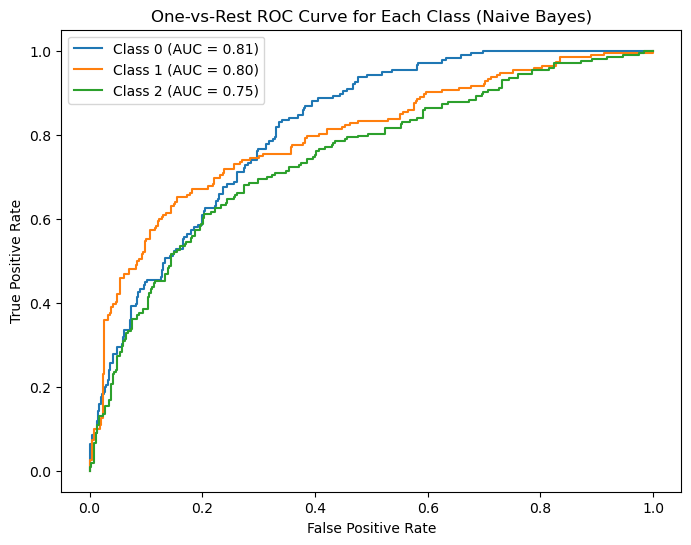

Naive Bayes Metrics with TF-IDF (Not Lemmatized):
{'Accuracy': 0.6110154905335629, 'Precision': 0.6439829727026001, 'Recall': 0.6110154905335629, 'F1 Score': 0.6056520411046672, 'Weighted Precision': 0.6439829727026001, 'Weighted Recall': 0.6110154905335629, 'Weighted F1 Score': 0.6056520411046672, 'Weighted Accuracy': 0.6110154905335629, 'Confusion Matrix': array([[144,  12,  20],
       [ 52, 117,  23],
       [ 85,  34,  94]], dtype=int64), 'FPR': {0: array([0.        , 0.        , 0.        , 0.00493827, 0.00493827,
       0.00740741, 0.00740741, 0.01234568, 0.01234568, 0.01481481,
       0.01481481, 0.01728395, 0.01728395, 0.01975309, 0.01975309,
       0.02222222, 0.02222222, 0.02469136, 0.02469136, 0.02716049,
       0.02716049, 0.02962963, 0.02962963, 0.03209877, 0.03209877,
       0.0345679 , 0.0345679 , 0.03703704, 0.03703704, 0.04197531,
       0.04197531, 0.04938272, 0.04938272, 0.05679012, 0.05679012,
       0.05925926, 0.05925926, 0.0617284 , 0.0617284 , 0.07160494,
     

In [30]:
# Assuming df_labelled_balanced is the balanced dataset
# If not, you can use the resampling code provided earlier

# Handle NaN values in 'cleaned_text'
df_resampled['cleaned_text'] = df_resampled['cleaned_text'].fillna('')

# Split the dataset into train and validation sets
df_train, df_val = train_test_split(df_resampled, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(df_train['cleaned_text'])
X_val_tfidf = vectorizer.transform(df_val['cleaned_text'])

# Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, df_train['label'])

# Predictions and probabilities on the validation set
nb_val_predictions = nb_classifier.predict(X_val_tfidf)
nb_val_probabilities = nb_classifier.predict_proba(X_val_tfidf)

# Binarize the labels in a One-vs-Rest fashion
label_binarizer = LabelBinarizer()
y_onehot_val = label_binarizer.fit_transform(df_val['label'])

# Calculate ROC and AUC for all classes
n_classes = len(label_binarizer.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_val[:, i], nb_val_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.title('One-vs-Rest ROC Curve for Each Class (Naive Bayes)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Evaluate Naive Bayes model
nb_accuracy = accuracy_score(df_val['label'], nb_val_predictions)
nb_precision, nb_recall, nb_f1_score, _ = precision_recall_fscore_support(df_val['label'], nb_val_predictions, average='weighted')
nb_conf_matrix = confusion_matrix(df_val['label'], nb_val_predictions)

# Calculate other metrics
weighted_f1 = f1_score(df_val['label'], nb_val_predictions, average='weighted', sample_weight=np.ones(len(df_val['label'])))
weighted_accuracy = accuracy_score(df_val['label'], nb_val_predictions, sample_weight=np.ones(len(df_val['label'])))

# Store all metrics with a new name
nb_metrics_not_lemmatized = {
    'Accuracy': nb_accuracy,
    'Precision': nb_precision,
    'Recall': nb_recall,
    'F1 Score': nb_f1_score,
    'Weighted Precision': nb_precision,
    'Weighted Recall': nb_recall,
    'Weighted F1 Score': weighted_f1,
    'Weighted Accuracy': weighted_accuracy,
    'Confusion Matrix': nb_conf_matrix,
    'FPR': fpr,
    'TPR': tpr,
    'ROC AUC': roc_auc,
}

# Print and store the metrics with the new name
print("Naive Bayes Metrics with TF-IDF (Not Lemmatized):")
print(nb_metrics_not_lemmatized)

# Save all metrics to a file with a new name (adjust the file path as needed)
metrics_filename_not_lemmatized = 'naive_bayes_metrics_tfidf_not_lemmatized.npy'
np.savez(metrics_filename_not_lemmatized, **nb_metrics_not_lemmatized)

# Learning curve for NB

C:\Users\tomsb\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


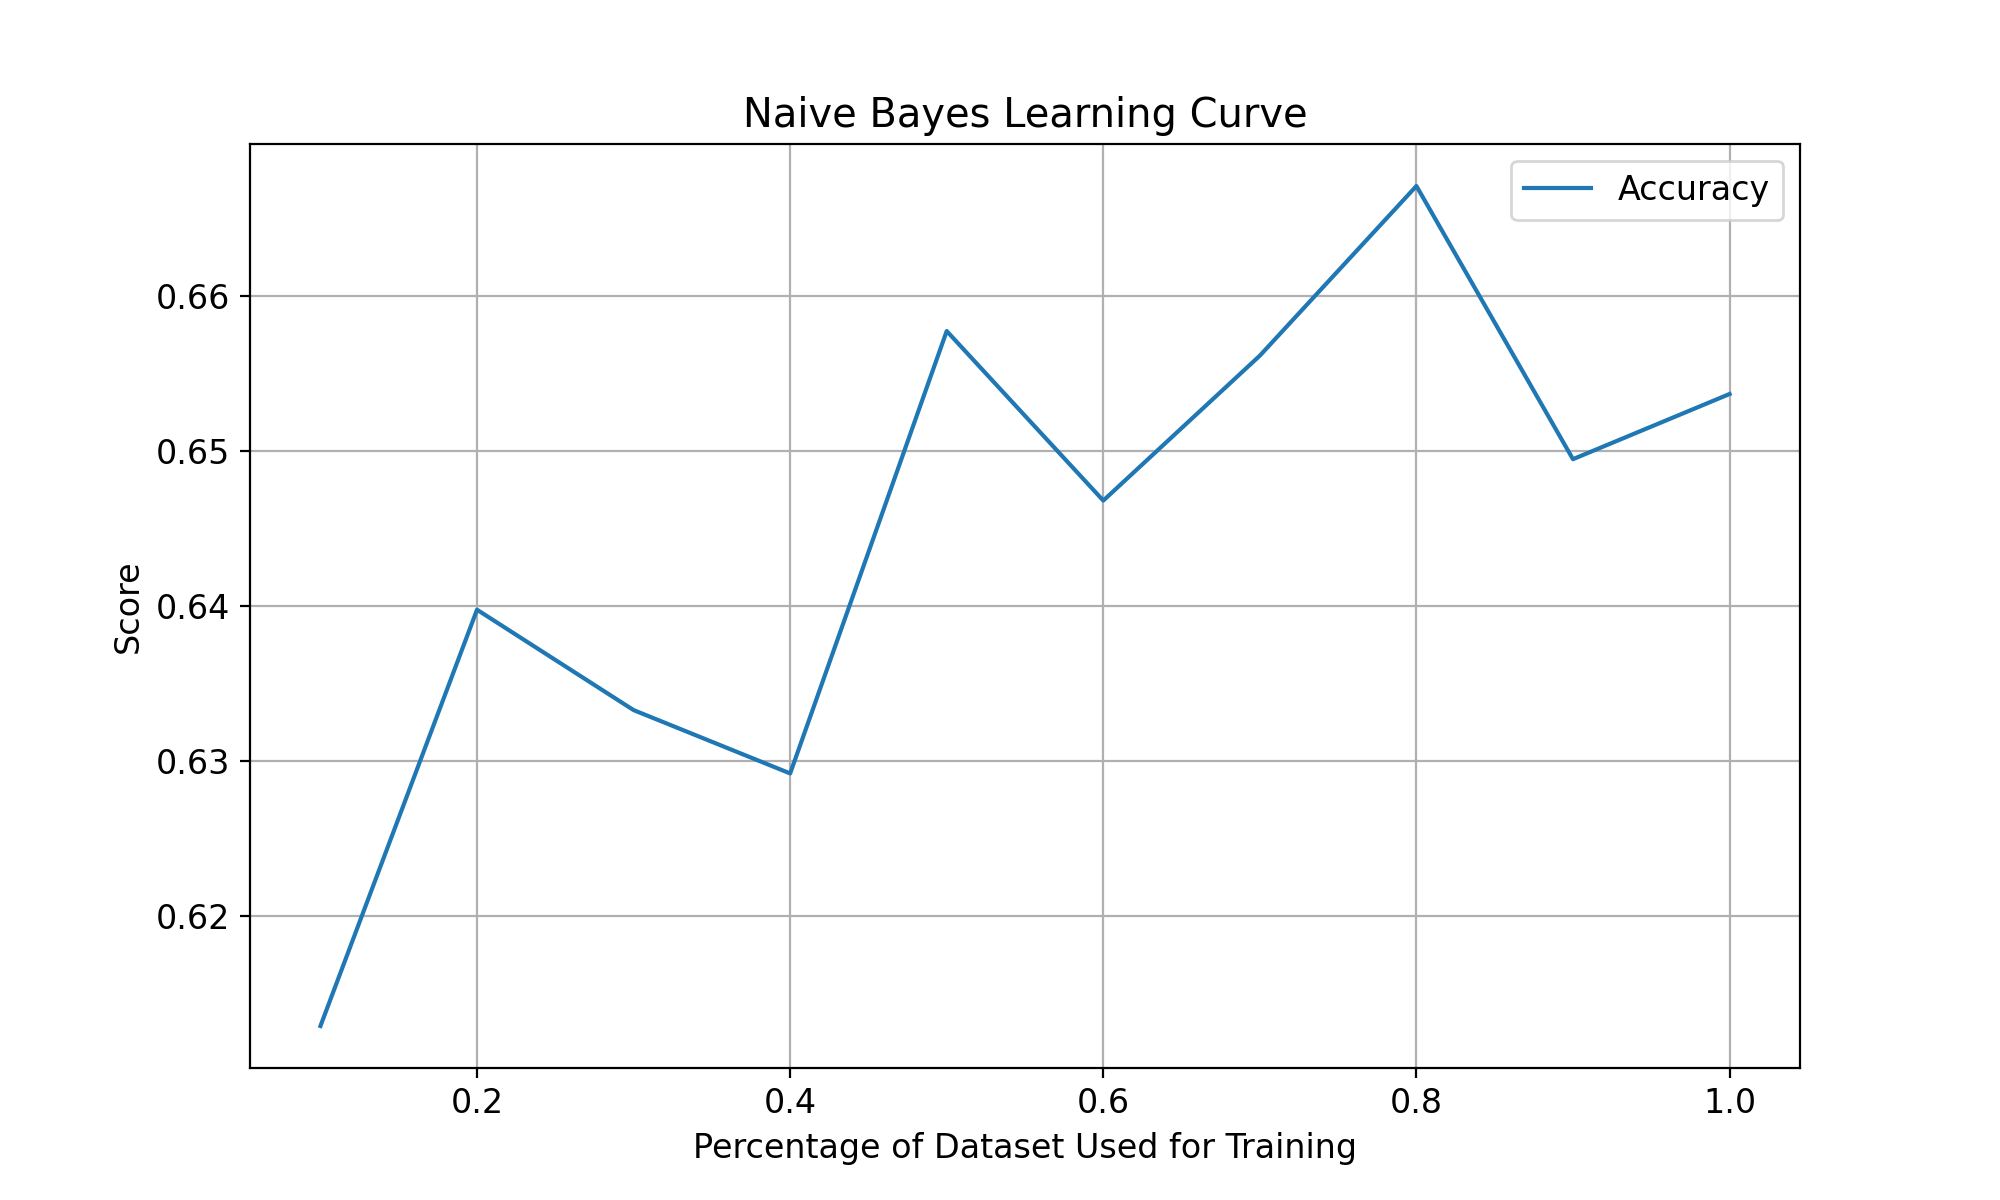

In [243]:
# Assuming df_labelled_balanced is the balanced dataset
# If not, you can use the resampling code provided earlier

# Define the percentage splits for training
percentage_splits_nb_not_lemmatized = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Create lists to store metrics for each training size
accuracy_list_nb_not_lemmatized = []
precision_list_nb_not_lemmatized = []
recall_list_nb_not_lemmatized = []
f1_list_nb_not_lemmatized = []

# Loop over different training sizes
for percentage in percentage_splits:
    # Calculate the training size for the current iteration
    current_training_size = int(len(df_resampled) * percentage)

    # Take a subset of the dataset
    df_subset = df_resampled.head(current_training_size)

    # Split the dataset into train and validation sets (80:20 split)
    df_train, df_val = train_test_split(df_subset, test_size=0.2, random_state=42)

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer(max_features=1000)
    X_train_tfidf = vectorizer.fit_transform(df_train['cleaned_text'])
    X_val_tfidf = vectorizer.transform(df_val['cleaned_text'])

    # Naive Bayes Classifier
    nb_classifier = MultinomialNB()
    nb_classifier.fit(X_train_tfidf, df_train['label'])

    # Predictions on the validation set
    nb_val_predictions = nb_classifier.predict(X_val_tfidf)

    # Evaluate Naive Bayes model
    precision, recall, f1_score, _ = precision_recall_fscore_support(df_val['label'], nb_val_predictions, average='weighted', sample_weight=np.ones(len(df_val['label'])))

    # Calculate accuracy
    nb_accuracy = accuracy_score(df_val['label'], nb_val_predictions)

    # Append metrics to the lists
    accuracy_list_nb_not_lemmatized.append(nb_accuracy)
    precision_list_nb_not_lemmatized.append(nb_precision)
    recall_list_nb_not_lemmatized.append(nb_recall)
    f1_list_nb_not_lemmatized.append(nb_f1_score)

# Plot Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(percentage_splits, accuracy_list, label='Accuracy')
#plt.plot(percentage_splits, precision_list, label='Precision')
#plt.plot(percentage_splits, recall_list, label='Recall')
#plt.plot(percentage_splits, f1_list, label='F1 Score')
plt.title('Naive Bayes Learning Curve')
plt.xlabel('Percentage of Dataset Used for Training')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

# Save Learning Curve Metrics
learning_curve_metrics_nb_not_lemmatized = {
    'Training Percentages': percentage_splits,
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
}

# Save all metrics to a file (adjust the file path as needed)
learning_curve_filename = 'naive_bayes_learning_curve_metrics.npy'
np.savez(learning_curve_filename, **learning_curve_metrics_nb_not_lemmatized)

# SVM

# Grid search for SVM

In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    confusion_matrix,
    roc_curve,
    auc,
    f1_score,
)
import numpy as np
import time

# Assuming df_labelled_balanced is your labeled dataset
# Split the labeled dataset into features (X) and labels (y)
X = df_resampled['cleaned_text']
y = df_resampled['label']

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(X)

# Define the parameter grid for grid search
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}

# Initialize StratifiedKFold with k=5
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop through all combinations and perform cross-validation
for c_value in param_grid['C']:
    for kernel_type in param_grid['kernel']:
        start_time = time.time()  # Record the start time

        # Initialize lists to store metrics for each fold
        accuracy_scores = []
        precision_scores = []
        recall_scores = []
        f1_scores = []

        # Perform cross-validation
        for train_index, test_index in skf.split(X_tfidf, y):
            X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Train SVM classifier with current parameters
            svm_classifier_current = SVC(C=c_value, kernel=kernel_type, probability=True)
            svm_classifier_current.fit(X_train, y_train)

            # Make predictions on the test set
            svm_val_predictions_current = svm_classifier_current.predict(X_test)

            # Calculate metrics for the current fold
            accuracy_scores.append(accuracy_score(y_test, svm_val_predictions_current))
            precision, recall, f1, _ = precision_recall_fscore_support(y_test, svm_val_predictions_current, average='weighted')
            precision_scores.append(precision)
            recall_scores.append(recall)
            f1_scores.append(f1)

        # Calculate average metrics across folds
        avg_accuracy = np.mean(accuracy_scores)
        avg_precision = np.mean(precision_scores)
        avg_recall = np.mean(recall_scores)
        avg_f1 = np.mean(f1_scores)

        end_time = time.time()  # Record the end time
        elapsed_time = end_time - start_time  # Calculate the elapsed time

        # Print and store the metrics for the current parameter combination
        print(f"SVM Metrics with Kernel={kernel_type} and C={c_value} - Average across folds:")
        print(f"Accuracy: {avg_accuracy:.4f}")
        print(f"Precision: {avg_precision:.4f}")
        print(f"Recall: {avg_recall:.4f}")
        print(f"F1 Score: {avg_f1:.4f}")
        print(f"Elapsed Time: {elapsed_time:.4f} seconds")

KeyboardInterrupt: 

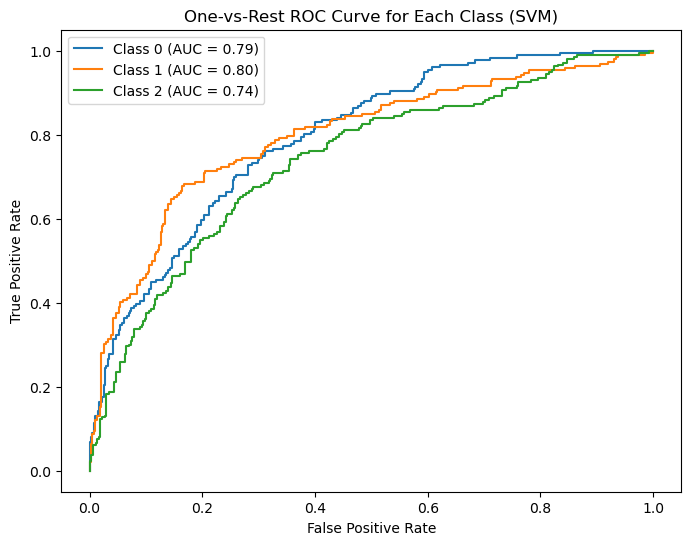

SVM Metrics with Linear Kernel and C=1 (Not Lemmatized):
{'Accuracy': 0.5938037865748709, 'Precision': 0.6035385810461568, 'Recall': 0.5938037865748709, 'F1 Score': 0.5921684708735453, 'Weighted Precision': 0.6035385810461568, 'Weighted Recall': 0.5938037865748709, 'Weighted F1 Score': 0.5921684708735453, 'Weighted Accuracy': 0.5938037865748709, 'Confusion Matrix': array([[120,  18,  38],
       [ 43, 123,  26],
       [ 68,  43, 102]], dtype=int64), 'FPR': {0: array([0.        , 0.        , 0.        , 0.00246914, 0.00246914,
       0.00493827, 0.00493827, 0.00740741, 0.00740741, 0.00987654,
       0.00987654, 0.01481481, 0.01481481, 0.01728395, 0.01728395,
       0.02222222, 0.02222222, 0.02469136, 0.02469136, 0.02716049,
       0.02716049, 0.02962963, 0.02962963, 0.03209877, 0.03209877,
       0.0345679 , 0.0345679 , 0.04197531, 0.04197531, 0.04691358,
       0.04691358, 0.05185185, 0.05185185, 0.05432099, 0.05432099,
       0.05679012, 0.05679012, 0.0617284 , 0.0617284 , 0.06666667

In [32]:
# Split the labeled dataset into train and validation sets
df_train, df_val = train_test_split(df_resampled, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(df_train['cleaned_text'])
X_val_tfidf = vectorizer.transform(df_val['cleaned_text'])

# SVM Classifier with linear kernel and C=1
svm_classifier_linear = SVC(kernel='linear', C=1, probability=True)
svm_classifier_linear.fit(X_train_tfidf, df_train['label'])

# Predictions and probabilities on the validation set
svm_val_predictions_linear = svm_classifier_linear.predict(X_val_tfidf)
svm_val_probabilities_linear = svm_classifier_linear.predict_proba(X_val_tfidf)

# Binarize the labels in a One-vs-Rest fashion
label_binarizer = LabelBinarizer()
y_onehot_val = label_binarizer.fit_transform(df_val['label'])

# Calculate ROC and AUC for all classes
n_classes = len(label_binarizer.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_val[:, i], svm_val_probabilities_linear[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.title('One-vs-Rest ROC Curve for Each Class (SVM)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Evaluate SVM model
svm_accuracy_linear = accuracy_score(df_val['label'], svm_val_predictions_linear)
svm_precision_linear, svm_recall_linear, svm_f1_score_linear, _ = precision_recall_fscore_support(df_val['label'], svm_val_predictions_linear, average='weighted')
svm_conf_matrix_linear = confusion_matrix(df_val['label'], svm_val_predictions_linear)

# Calculate other metrics
weighted_f1 = f1_score(df_val['label'], svm_val_predictions_linear, average='weighted', sample_weight=np.ones(len(df_val['label'])))
weighted_accuracy = accuracy_score(df_val['label'], svm_val_predictions_linear, sample_weight=np.ones(len(df_val['label'])))

# Store all metrics
svm_metrics_not_lemmatized = {
    'Accuracy': svm_accuracy_linear,
    'Precision': svm_precision_linear,
    'Recall': svm_recall_linear,
    'F1 Score': svm_f1_score_linear,
    'Weighted Precision': svm_precision_linear,
    'Weighted Recall': svm_recall_linear,
    'Weighted F1 Score': weighted_f1,
    'Weighted Accuracy': weighted_accuracy,
    'Confusion Matrix': svm_conf_matrix_linear,
    'FPR': fpr,
    'TPR': tpr,
    'ROC AUC': roc_auc,
}

# Print and store the metrics
print("SVM Metrics with Linear Kernel and C=1 (Not Lemmatized):")
print(svm_metrics_not_lemmatized)

# Save all metrics to a file (adjust the file path as needed)
svm_metrics_not_lemmatized_filename = 'svm_metrics_not_lemmatized.npy'
np.savez(svm_metrics_not_lemmatized_filename, **svm_metrics_not_lemmatized)

# Learning curve with SVM

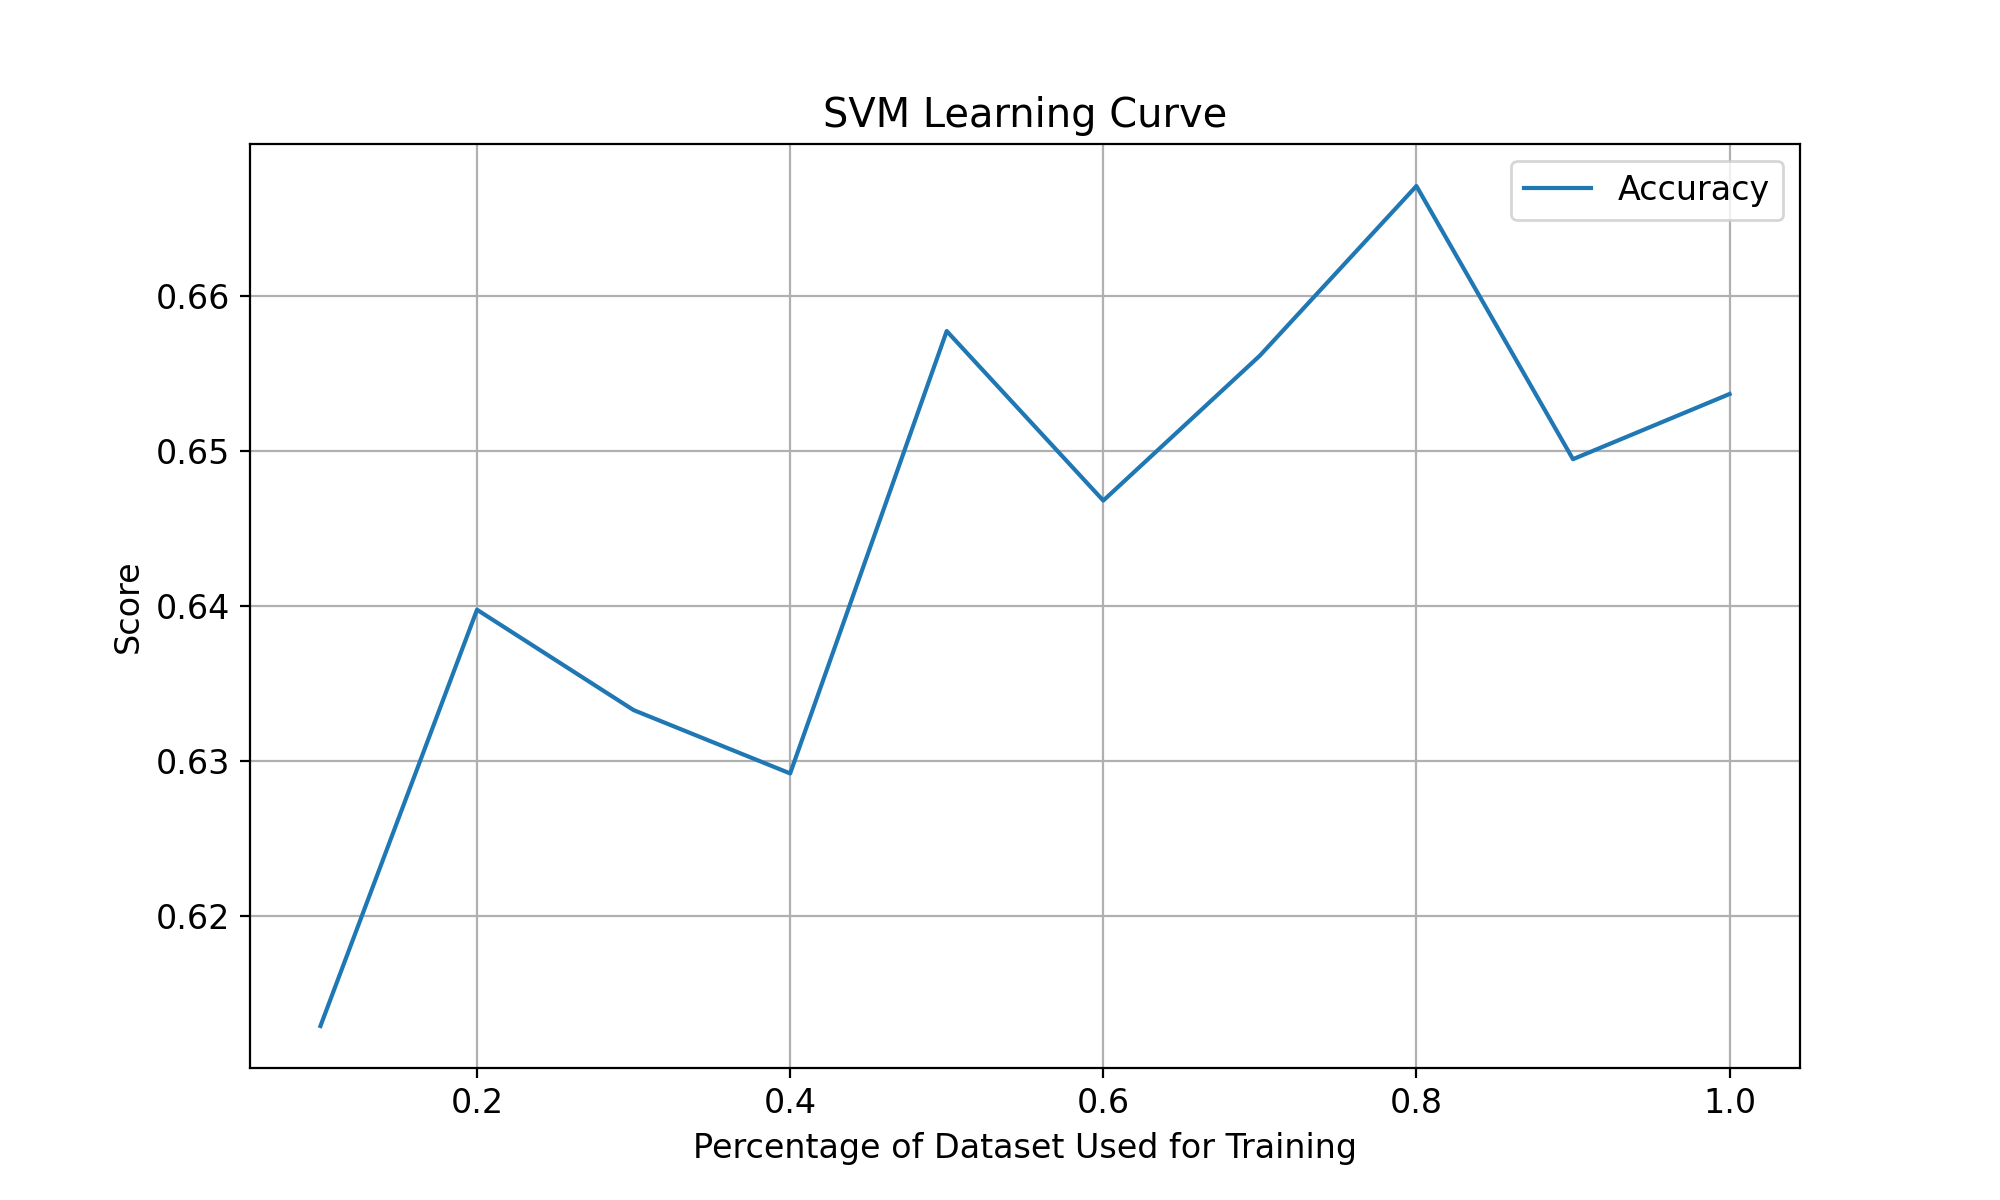

In [245]:
# Assuming df_labelled_balanced is the balanced dataset
# If not, you can use the resampling code provided earlier

# Define the percentage splits for training
percentage_splits_svm_not_lemmatized = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Create lists to store metrics for each training size
accuracy_list_svm_not_lemmatized = []
precision_list_svm_not_lemmatized = []
recall_list_svm_not_lemmatized = []
f1_list_svm_not_lemmatized = []

# Loop over different training sizes
for percentage in percentage_splits:
    # Calculate the training size for the current iteration
    current_training_size = int(len(df_resampled) * percentage)

    # Take a subset of the dataset
    df_subset = df_resampled.head(current_training_size)

    # Split the dataset into train and validation sets (80:20 split)
    df_train, df_val = train_test_split(df_subset, test_size=0.2, random_state=42)

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer(max_features=1000)
    X_train_tfidf = vectorizer.fit_transform(df_train['cleaned_text'])
    X_val_tfidf = vectorizer.transform(df_val['cleaned_text'])

    # SVM Classifier with linear kernel and C=1
    svm_classifier_linear = SVC(kernel='linear', C=1, probability=True)
    svm_classifier_linear.fit(X_train_tfidf, df_train['label'])

    # Predictions on the validation set
    svm_val_predictions_linear = svm_classifier_linear.predict(X_val_tfidf)

    # Evaluate SVM model
    precision, recall, f1_score_value, _ = precision_recall_fscore_support(df_val['label'], svm_val_predictions_linear, average='weighted')

    # Calculate accuracy
    svm_accuracy = accuracy_score(df_val['label'], svm_val_predictions_linear)

    # Append metrics to the lists
    accuracy_list_svm_not_lemmatized.append(svm_accuracy)
    precision_list_svm_not_lemmatized.append(precision)
    recall_list_svm_not_lemmatized.append(recall)
    f1_list_svm_not_lemmatized.append(f1_score_value)

# Plot Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(percentage_splits, accuracy_list, label='Accuracy')
# Uncomment the following lines if you want to plot other metrics
# plt.plot(percentage_splits, precision_list, label='Precision')
# plt.plot(percentage_splits, recall_list, label='Recall')
# plt.plot(percentage_splits, f1_list, label='F1 Score')
plt.title('SVM Learning Curve')
plt.xlabel('Percentage of Dataset Used for Training')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

# Save Learning Curve Metrics
learning_curve_metrics_svm_not_lemmatized = {
    'Training Percentages': percentage_splits,
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
}

# Save all metrics to a file (adjust the file path as needed)
learning_curve_filename = 'svm_learning_curve_metrics.npy'
np.savez(learning_curve_filename, **learning_curve_metrics_svm_not_lemmatized)

# Generating word embeddings with Fasttext

# Use pre-built word embeddings from fasttext-lv-vectors

In [424]:
# import fasttext
# from huggingface_hub import hf_hub_download

# # Download the fasttext-lv-vectors model
# model_path = hf_hub_download(repo_id="facebook/fasttext-lv-vectors", filename="model.bin")

# # Load the pre-trained FastText model
# pretrained_model = fasttext.load_model(model_path)

# # Example: Get word embeddings for a few words, like "saeima"
# word_embedding_saeima = pretrained_model.get_word_vector('saeima')
# print(f'Embedding for "saeima": {word_embedding_saeima}')

# # Your existing code for potential grid for parameter settings
# # (Assuming df_not_lemmatized is your DataFrame with "cleaned_text" column)
# # Potential grid for parameter settings (replace with actual values based on your exploration)
# grid_parameters = {
#     'epoch': [5, 10, 15],       # Number of training epochs
#     'lr': [0.1, 0.2, 0.5],      # Learning rate
#     'wordNgrams': [1, 2, 3]     # Word n-grams
# }

# # You can now proceed with using the pre-trained model for your specific task
# # For example, using the word embeddings for classification or other NLP tasks

C:\Users\tomsb\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:137: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\tomsb\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Embedding for "saeima": [ 0.03842235 -0.07755803 -0.01322223  0.05409748  0.07645614  0.00617245
  0.02965291 -0.05800439  0.0029679  -0.08291853 -0.04430001 -0.03918453
 -0.09373049  0.02423862 -0.01630659 -0.08546112  0.03832908  0.06063778
 -0.01650383 -0.01371647  0.04675859 -0.0721302   0.01181454  0.01198544
 -0.01121368  0.00276401 -0.11378322  0.06069642 -0.14751765  0.00883853
 -0.0426394   0.01793448 -0.00639191 -0.0202365   0.05242854  0.02782035
  0.00466973  0.03145762  0.01313953 -0.088383    0.02995126 -0.05986543
 -0.05708344  0.00611483 -0.09001562 -0.05776558  0.01582784  0.01365662
  0.04987416  0.02025175 -0.04546609  0.0117517  -0.03077544  0.09265283
 -0.05278678 -0.02029436 -0.14091209  0.01774021 -0.08741986 -0.02559435
  0.02631698 -0.03860404 -0.00116061 -0.00029851  0.06185828 -0.03071564
 -0.00943356  0.01089799  0.03102332 -0.08585136  0.02841738 -0.09185276
  0.01020985  0.05051455  0.05166629 -0.03490509 -0.02451416 -0.00785735
 -0.01884642 -0.00727948 -0

In [ ]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import accuracy_score, precision_recall_fscore_support
# from sklearn.svm import SVC
# import fasttext
# import numpy as np
# import time

# # Assuming df_labelled_balanced is your DataFrame with 'cleaned_text' and 'label' columns
# df_resampled['cleaned_text'] = df_resampled['cleaned_text'].astype(str)

# # Tokenize and obtain embeddings for each word in 'cleaned_text'
# df_resampled['word_embeddings'] = df_resampled['cleaned_text'].apply(
#     lambda x: [pretrained_model.get_word_vector(word) for word in x.split()]
# )

# # Aggregate word embeddings to obtain tweet-level embeddings (average)
# df_resampled['tweet_embeddings'] = df_resampled['word_embeddings'].apply(
#     lambda x: np.mean(x, axis=0)
# )

# # Split the labeled data into features (X) and labels (y)
# X_labelled = list(df_resampled['tweet_embeddings'])
# y_labelled = df_resampled['label']

# # Reshape feature arrays for SVM
# X_labelled = np.array(X_labelled).reshape(-1, 300)  # Assuming embedding size is 300

# # Define the parameter grid for grid search
# param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}

# # Initialize StratifiedKFold with k=5
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Loop through all combinations and perform cross-validation
# for c_value in param_grid['C']:
#     for kernel_type in param_grid['kernel']:
#         start_time = time.time()  # Record the start time

#         # Initialize lists to store metrics for each fold
#         accuracy_scores = []
#         precision_scores = []
#         recall_scores = []
#         f1_scores = []

#         # Perform cross-validation
#         for train_index, test_index in skf.split(X_labelled, y_labelled):
#             X_train, X_test = X_labelled[train_index], X_labelled[test_index]
#             y_train, y_test = y_labelled.iloc[train_index], y_labelled.iloc[test_index]

#             # Train SVM classifier with current parameters
#             svm_classifier_fasttext_current = SVC(C=c_value, kernel=kernel_type, probability=True)
#             svm_classifier_fasttext_current.fit(X_train, y_train)

#             # Make predictions on the test set
#             svm_val_predictions_fasttext_current = svm_classifier_fasttext_current.predict(X_test)

#             # Calculate metrics for the current fold
#             accuracy_scores.append(accuracy_score(y_test, svm_val_predictions_fasttext_current))
#             precision, recall, f1, _ = precision_recall_fscore_support(y_test, svm_val_predictions_fasttext_current, average='weighted')
#             precision_scores.append(precision)
#             recall_scores.append(recall)
#             f1_scores.append(f1)

#         # Calculate average metrics across folds
#         avg_accuracy = np.mean(accuracy_scores)
#         avg_precision = np.mean(precision_scores)
#         avg_recall = np.mean(recall_scores)
#         avg_f1 = np.mean(f1_scores)

#         end_time = time.time()  # Record the end time
#         elapsed_time = end_time - start_time  # Calculate the elapsed time

#         # Print and store the metrics for the current parameter combination
#         print(f"SVM Metrics with Kernel={kernel_type} and C={c_value} (FastText) - Average across folds:")
#         print(f"Accuracy: {avg_accuracy:.4f}")
#         print(f"Precision: {avg_precision:.4f}")
#         print(f"Recall: {avg_recall:.4f}")
#         print(f"F1 Score: {avg_f1:.4f}")
#         print(f"Elapsed Time: {elapsed_time:.4f} seconds")

SVM Metrics with Kernel=linear and C=0.1 (FastText) - Average across folds:
Accuracy: 0.6237
Precision: 0.6291
Recall: 0.6237
F1 Score: 0.6170
Elapsed Time: 2271.2003 seconds


# Pre-train word embeddings on the not lemmatized dataset

In [ ]:
# import fasttext
# import pandas as pd

# # Assuming df is your DataFrame with the 'cleaned_text' column
# text_data = df['cleaned_text'].tolist()

# # Variable parameter grid with options
# params = {
#     'model': 'skipgram',  # or 'cbow' for continuous bag of words
#     'dim': [100, 200],  # Dimension of word vectors (options: 100, 200)
#     'lr': [0.1, 0.2],  # Learning rate (options: 0.1, 0.2)
#     'word_ngrams': [1, 2],  # Max length of word n-grams (options: 1, 2)
#     'ws': [5, 10],  # Size of the context window (options: 5, 10)
#     'min_count': 1,  # Minimum number of word occurrences
#     'neg': 5,  # Number of negatives sampled
#     'thread': 4,  # Number of threads used for training
# }

# # Train the FastText model with variable parameters
# latvian_fasttext_model_trained_on_tweets = fasttext.train_unsupervised(text_data, **params)

# # Save the model (optional)
# latvian_fasttext_model_trained_on_tweets.save_model('latvian_fasttext_model_trained_on_tweets.bin')

# # Example: Get the word vector for a specific word ('example_word')
# word_vector = latvian_fasttext_model_trained_on_tweets.get_word_vector('example_word')

# # Print the word vector
# print(word_vector)

# Building FastText word embeddings on the tweets data

In [9]:
import fasttext
# Convert to string
df_not_lemmatized['cleaned_text'] = df_not_lemmatized['cleaned_text'].astype(str)  

# Save the training data to a text file for FastText
train_filename = 'fasttext_train.txt'
df_not_lemmatized[['cleaned_text']].to_csv(train_filename, sep=' ', header=None, index=None)

# Train the FastText model
model = fasttext.train_unsupervised(input=train_filename, model='skipgram', epoch=10, lr=0.1, wordNgrams=2)

# Save the FastText model to a file
model.save_model('fasttext_model.bin')

# Example: Get word embeddings for a few words, like "saeima"
word_embedding_saeima = model.get_word_vector('saeima')
print(f'Embedding for "saeima": {word_embedding_saeima}')

Embedding for "saeima": [ 0.07265992 -0.04982704 -0.3986385  -0.00095318 -0.3267898   0.09599282
 -0.07174906 -0.13214423 -0.25408417 -0.12902598 -0.1836838   0.04916414
  0.22363394 -0.0811709   0.22378995 -0.02228155  0.08924586 -0.00378097
  0.21201864  0.19922021  0.22294466  0.09763577  0.09317102  0.24035805
 -0.14822415  0.2134754  -0.19284281  0.047286    0.23388195 -0.04970775
 -0.0945613   0.07093849  0.03699858  0.21057476 -0.03071023  0.0759813
 -0.16517109  0.05371177  0.15641789  0.22034253 -0.15190205  0.05375826
  0.04781199  0.34449714  0.21179727  0.02748436  0.44703248 -0.0768055
  0.38038772 -0.35174787  0.09006528 -0.10560887 -0.37362126  0.37834364
  0.0250479  -0.10288309  0.20077004  0.25160182 -0.12156512  0.14451504
  0.03745441 -0.08756302 -0.06184936 -0.00854492  0.26682064 -0.18996324
  0.19351232  0.11961119  0.05136659  0.44083685  0.0777997   0.0736503
  0.44716805  0.20659421 -0.11722537  0.07512208  0.14079112 -0.10220739
 -0.18270741 -0.08787479 -0.06

In [10]:
# Load the trained FastText model
fasttext_model = fasttext.load_model('fasttext_model.bin')

# Get nearest neighbors for a word, e.g., "saeima"
nearest_neighbors = model.get_nearest_neighbors('paldies', k=10)
print(f'Nearest neighbors for "": {nearest_neighbors}')

Nearest neighbors for "": [(0.7722075581550598, '"paldies'), (0.7435762286186218, 'paldies"'), (0.6168749928474426, 'dievam'), (0.5388419032096863, 'atsaucīgajiem'), (0.5103908181190491, 'kolēģiem'), (0.49354907870292664, 'pateicību'), (0.46841007471084595, '🙏"'), (0.467136025428772, 'prieks'), (0.46042540669441223, 'visiem'), (0.45600855350494385, 'draugiem')]


# SVM with FastText

# Grid search for SVM with FastText

In [11]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.svm import SVC
import fasttext
import numpy as np
import time

# Load the trained FastText model
fasttext_model = fasttext.load_model('fasttext_model.bin')

# Assuming df_labelled_balanced is your DataFrame with 'cleaned_text' and 'label' columns
df_resampled['cleaned_text'] = df_resampled['cleaned_text'].astype(str)

# Tokenize and obtain embeddings for each word in 'cleaned_text'
df_resampled['word_embeddings'] = df_resampled['cleaned_text'].apply(
    lambda x: [fasttext_model.get_word_vector(word) for word in x.split()]
)

# Aggregate word embeddings to obtain tweet-level embeddings (average)
df_resampled['tweet_embeddings'] = df_resampled['word_embeddings'].apply(
    lambda x: np.mean(x, axis=0)
)

# Split the labeled data into features (X) and labels (y)
X_labelled = list(df_resampled['tweet_embeddings'])
y_labelled = df_resampled['label']

# Reshape feature arrays for SVM
X_labelled = np.array(X_labelled).reshape(-1, 100)  # Assuming embedding size is 100

# Define the parameter grid for grid search
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}

# Initialize StratifiedKFold with k=5
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop through all combinations and perform cross-validation
for c_value in param_grid['C']:
    for kernel_type in param_grid['kernel']:
        start_time = time.time()  # Record the start time

        # Initialize lists to store metrics for each fold
        accuracy_scores = []
        precision_scores = []
        recall_scores = []
        f1_scores = []

        # Perform cross-validation
        for train_index, test_index in skf.split(X_labelled, y_labelled):
            X_train, X_test = X_labelled[train_index], X_labelled[test_index]
            y_train, y_test = y_labelled.iloc[train_index], y_labelled.iloc[test_index]

            # Train SVM classifier with current parameters
            svm_classifier_fasttext_current = SVC(C=c_value, kernel=kernel_type, probability=True)
            svm_classifier_fasttext_current.fit(X_train, y_train)

            # Make predictions on the test set
            svm_val_predictions_fasttext_current = svm_classifier_fasttext_current.predict(X_test)

            # Calculate metrics for the current fold
            accuracy_scores.append(accuracy_score(y_test, svm_val_predictions_fasttext_current))
            precision, recall, f1, _ = precision_recall_fscore_support(y_test, svm_val_predictions_fasttext_current, average='weighted')
            precision_scores.append(precision)
            recall_scores.append(recall)
            f1_scores.append(f1)

        # Calculate average metrics across folds
        avg_accuracy = np.mean(accuracy_scores)
        avg_precision = np.mean(precision_scores)
        avg_recall = np.mean(recall_scores)
        avg_f1 = np.mean(f1_scores)

        end_time = time.time()  # Record the end time
        elapsed_time = end_time - start_time  # Calculate the elapsed time

        # Print and store the metrics for the current parameter combination
        print(f"SVM Metrics with Kernel={kernel_type} and C={c_value} (FastText) - Average across folds:")
        print(f"Accuracy: {avg_accuracy:.4f}")
        print(f"Precision: {avg_precision:.4f}")
        print(f"Recall: {avg_recall:.4f}")
        print(f"F1 Score: {avg_f1:.4f}")
        print(f"Elapsed Time: {elapsed_time:.4f} seconds")

SVM Metrics with Kernel=linear and C=0.1 (FastText) - Average across folds:
Accuracy: 0.6566
Precision: 0.6602
Recall: 0.6566
F1 Score: 0.6550
Elapsed Time: 680.2409 seconds
SVM Metrics with Kernel=rbf and C=0.1 (FastText) - Average across folds:
Accuracy: 0.6770
Precision: 0.6824
Recall: 0.6770
F1 Score: 0.6754
Elapsed Time: 935.0277 seconds
SVM Metrics with Kernel=poly and C=0.1 (FastText) - Average across folds:
Accuracy: 0.6873
Precision: 0.7063
Recall: 0.6873
F1 Score: 0.6856
Elapsed Time: 751.8590 seconds
SVM Metrics with Kernel=linear and C=1 (FastText) - Average across folds:
Accuracy: 0.6559
Precision: 0.6583
Recall: 0.6559
F1 Score: 0.6546
Elapsed Time: 687.2288 seconds
SVM Metrics with Kernel=rbf and C=1 (FastText) - Average across folds:
Accuracy: 0.7743
Precision: 0.7803
Recall: 0.7743
F1 Score: 0.7749
Elapsed Time: 797.5231 seconds
SVM Metrics with Kernel=poly and C=1 (FastText) - Average across folds:
Accuracy: 0.7964
Precision: 0.8079
Recall: 0.7964
F1 Score: 0.7974
Ela

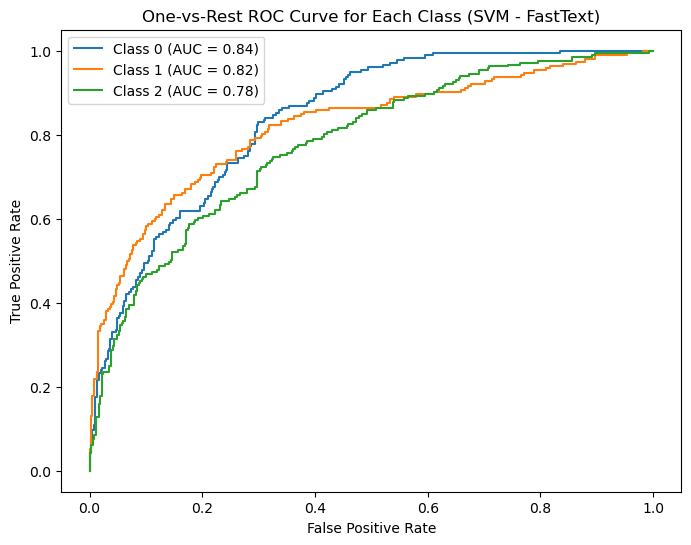

SVM Metrics with Linear Kernel and C=1 (FastText - Not Lemmatized):
{'Accuracy': 0.6230636833046471, 'Precision': 0.6323166216219657, 'Recall': 0.6230636833046471, 'F1 Score': 0.6208353499404751, 'Weighted Precision': 0.6323166216219657, 'Weighted Recall': 0.6230636833046471, 'Weighted F1 Score': 0.6208353499404751, 'Weighted Accuracy': 0.6230636833046471, 'Confusion Matrix': array([[133,  14,  29],
       [ 42, 116,  34],
       [ 60,  40, 113]], dtype=int64), 'FPR': {0: array([0.        , 0.        , 0.        , 0.00246914, 0.00246914,
       0.00493827, 0.00493827, 0.00740741, 0.00740741, 0.00987654,
       0.00987654, 0.01234568, 0.01234568, 0.01728395, 0.01728395,
       0.01728395, 0.01975309, 0.01975309, 0.02222222, 0.02222222,
       0.02716049, 0.02716049, 0.02962963, 0.02962963, 0.03209877,
       0.03209877, 0.0345679 , 0.0345679 , 0.03703704, 0.03703704,
       0.03950617, 0.03950617, 0.04691358, 0.04691358, 0.04938272,
       0.04938272, 0.05185185, 0.05185185, 0.05432099,

In [33]:
from keras.preprocessing.sequence import pad_sequences

# Load the trained FastText model
fasttext_model = fasttext.load_model('fasttext_model.bin')

# Assuming df_resampled is your DataFrame with 'cleaned_text' and 'label' columns
df_resampled['cleaned_text'] = df_resampled['cleaned_text'].astype(str)

# Tokenize and obtain embeddings for each word in 'cleaned_text'
df_resampled['word_embeddings'] = df_resampled['cleaned_text'].apply(
    lambda x: [fasttext_model.get_word_vector(word) for word in x.split()]
)

# Aggregate word embeddings to obtain tweet-level embeddings (average)
df_resampled['tweet_embeddings'] = df_resampled['word_embeddings'].apply(
    lambda x: np.mean(x, axis=0) if x else np.zeros(100)  # Assuming embedding size is 100
)

# Drop rows with NaN values in 'tweet_embeddings'
df_resampled = df_resampled.dropna(subset=['tweet_embeddings'])

# Split the labeled data into features (X) and labels (y)
X_labelled = list(df_resampled['tweet_embeddings'])
y_labelled = df_resampled['label']

# Split the labeled data into training and testing sets
X_train_labelled, X_test_labelled, y_train_labelled, y_test_labelled = train_test_split(
    X_labelled, y_labelled, test_size=0.2, random_state=42
)

# Ensure all tweet embeddings have the same length
max_length = max(len(embedding) for embedding in X_train_labelled + X_test_labelled)
X_train_labelled = [np.pad(embedding, (0, max_length - len(embedding))) for embedding in X_train_labelled]
X_test_labelled = [np.pad(embedding, (0, max_length - len(embedding))) for embedding in X_test_labelled]

# Convert to numpy arrays
X_train_labelled = np.array(X_train_labelled)
X_test_labelled = np.array(X_test_labelled)

# Train an SVM classifier with C=1 and linear kernel
svm_classifier_fasttext_not_lemmatized = SVC(C=1, kernel='linear', probability=True)
svm_classifier_fasttext_not_lemmatized.fit(X_train_labelled, y_train_labelled)

# Make predictions and probabilities on the test set
svm_val_predictions_fasttext_not_lemmatized = svm_classifier_fasttext_not_lemmatized.predict(X_test_labelled)
svm_val_probabilities_fasttext_not_lemmatized = svm_classifier_fasttext_not_lemmatized.predict_proba(X_test_labelled)

# Binarize the labels in a One-vs-Rest fashion
label_binarizer_fasttext_not_lemmatized = LabelBinarizer()
y_onehot_val_fasttext_not_lemmatized = label_binarizer_fasttext_not_lemmatized.fit_transform(y_test_labelled)

# Calculate ROC and AUC for all classes
n_classes_fasttext = len(label_binarizer_fasttext_not_lemmatized.classes_)
fpr_fasttext = dict()
tpr_fasttext = dict()
roc_auc_fasttext = dict()

for i in range(n_classes_fasttext):
    fpr_fasttext[i], tpr_fasttext[i], _ = roc_curve(y_onehot_val_fasttext_not_lemmatized[:, i], svm_val_probabilities_fasttext_not_lemmatized[:, i])
    roc_auc_fasttext[i] = auc(fpr_fasttext[i], tpr_fasttext[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes_fasttext):
    plt.plot(fpr_fasttext[i], tpr_fasttext[i], label=f'Class {i} (AUC = {roc_auc_fasttext[i]:.2f})')

plt.title('One-vs-Rest ROC Curve for Each Class (SVM - FastText)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Evaluate the SVM classifier
svm_accuracy_fasttext_not_lemmatized = accuracy_score(y_test_labelled, svm_val_predictions_fasttext_not_lemmatized)
svm_precision_fasttext_not_lemmatized, svm_recall_fasttext_not_lemmatized, svm_f1_score_fasttext_not_lemmatized, _ = precision_recall_fscore_support(y_test_labelled, svm_val_predictions_fasttext_not_lemmatized, average='weighted')
svm_conf_matrix_fasttext_not_lemmatized = confusion_matrix(y_test_labelled, svm_val_predictions_fasttext_not_lemmatized)

# Calculate other metrics
weighted_f1_fasttext_not_lemmatized = f1_score(y_test_labelled, svm_val_predictions_fasttext_not_lemmatized, average='weighted', sample_weight=np.ones(len(y_test_labelled)))
weighted_accuracy_fasttext_not_lemmatized = accuracy_score(y_test_labelled, svm_val_predictions_fasttext_not_lemmatized, sample_weight=np.ones(len(y_test_labelled)))

# Store all metrics
svm_metrics_fasttext_not_lemmatized = {
    'Accuracy': svm_accuracy_fasttext_not_lemmatized,
    'Precision': svm_precision_fasttext_not_lemmatized,
    'Recall': svm_recall_fasttext_not_lemmatized,
    'F1 Score': svm_f1_score_fasttext_not_lemmatized,
    'Weighted Precision': svm_precision_fasttext_not_lemmatized,
    'Weighted Recall': svm_recall_fasttext_not_lemmatized,
    'Weighted F1 Score': weighted_f1_fasttext_not_lemmatized,
    'Weighted Accuracy': weighted_accuracy_fasttext_not_lemmatized,
    'Confusion Matrix': svm_conf_matrix_fasttext_not_lemmatized,
    'FPR': fpr_fasttext,
    'TPR': tpr_fasttext,
    'ROC AUC': roc_auc_fasttext,
}

# Print and store the metrics
print("SVM Metrics with Linear Kernel and C=1 (FastText - Not Lemmatized):")
print(svm_metrics_fasttext_not_lemmatized)

# Save all metrics to a file (adjust the file path as needed)
svm_metrics_filename_fasttext_not_lemmatized = 'svm_metrics_linear_fasttext_not_lemmatized.npy'
np.savez(svm_metrics_filename_fasttext_not_lemmatized, **svm_metrics_fasttext_not_lemmatized)

# Learning curve for FastText+SVM

In [251]:
len(df_resampled)

20169

C:\Users\tomsb\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


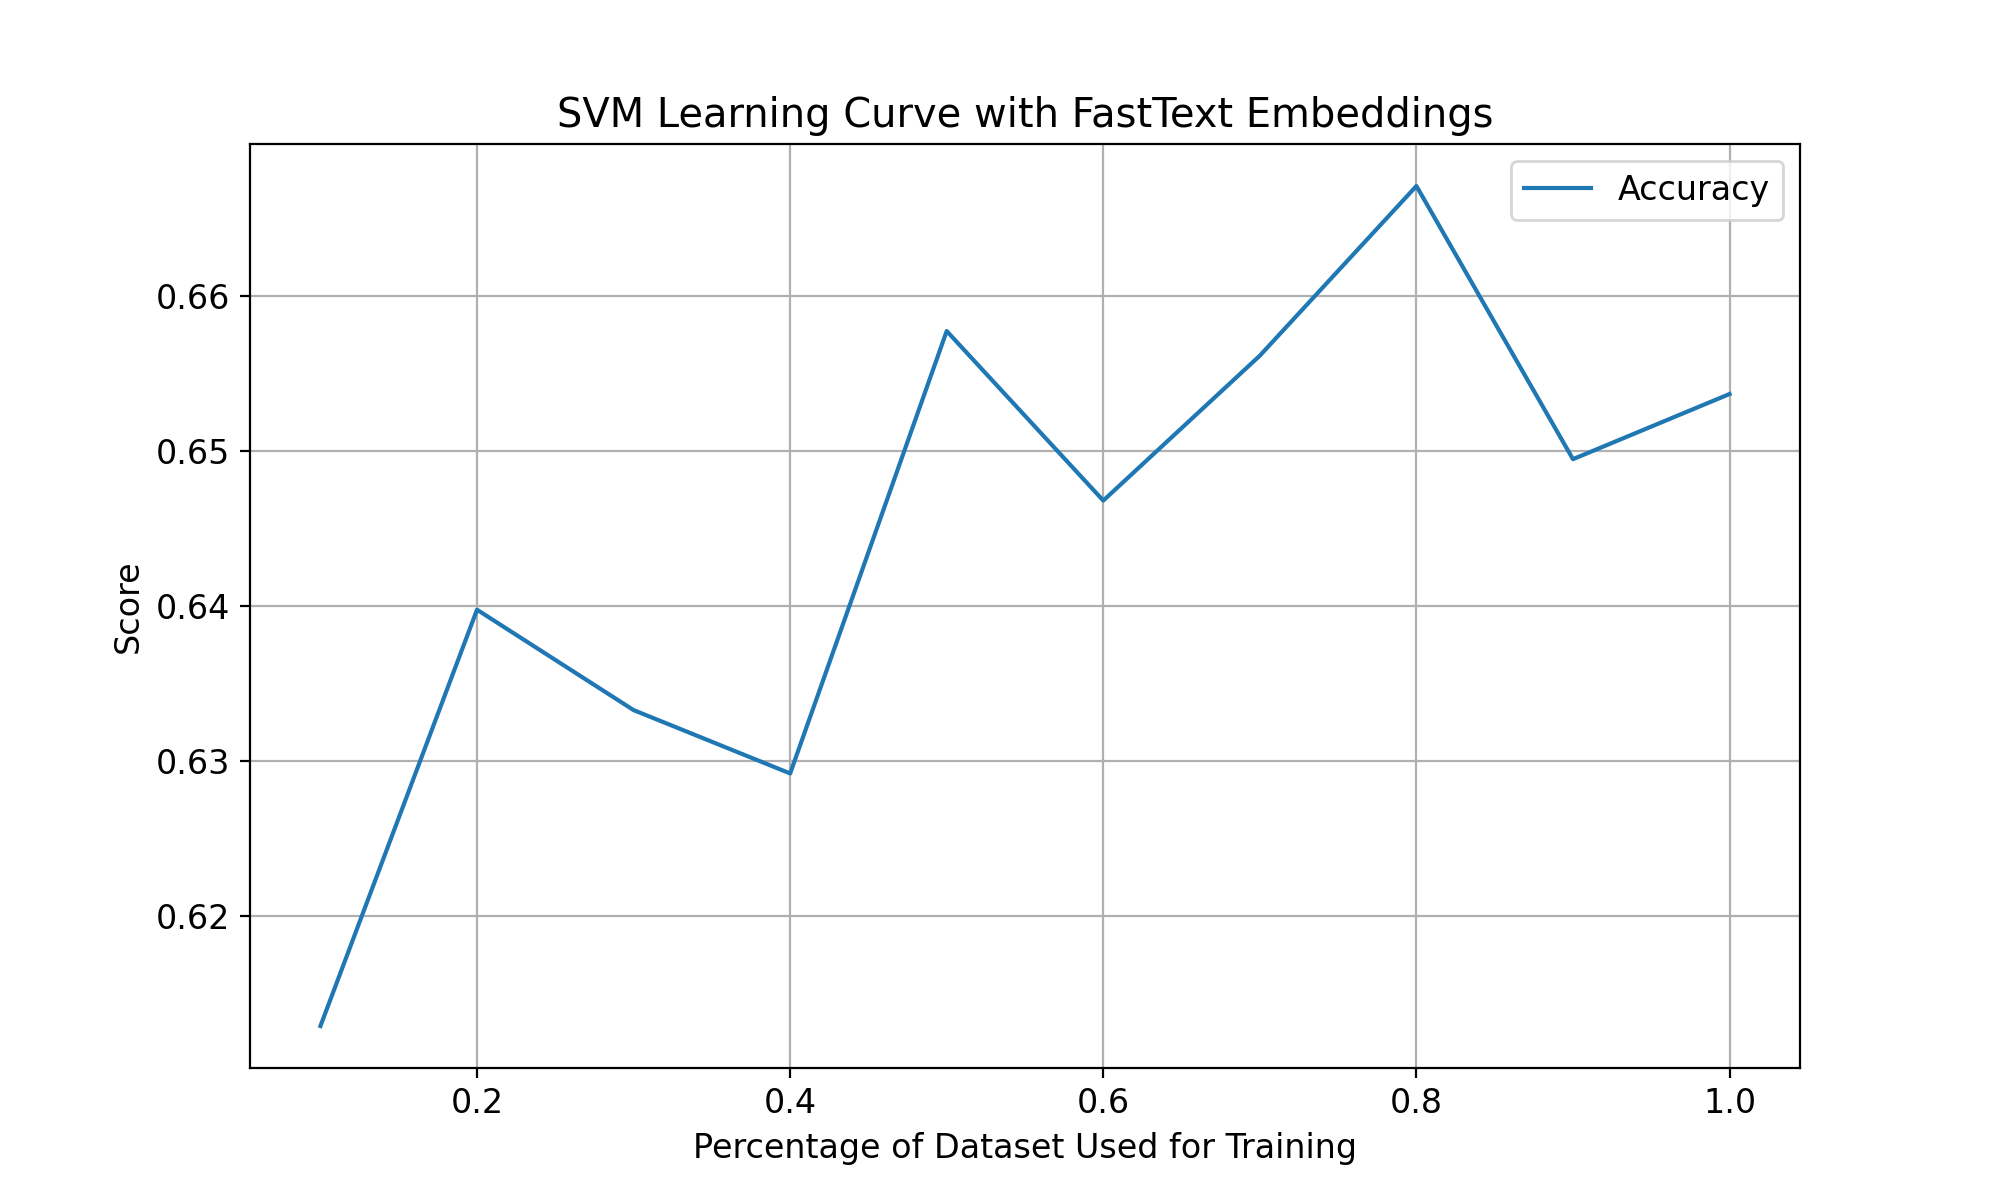

In [253]:
# Load the trained FastText model
fasttext_model = fasttext.load_model('fasttext_model.bin')

# Assuming df_resampled is your DataFrame with 'cleaned_text' and 'label' columns
df_resampled['cleaned_text'] = df_resampled['cleaned_text'].astype(str)

# Tokenize and obtain embeddings for each word in 'cleaned_text'
df_resampled['word_embeddings'] = df_resampled['cleaned_text'].apply(
    lambda x: [fasttext_model.get_word_vector(word) for word in x.split()]
)

# Aggregate word embeddings to obtain tweet-level embeddings (average)
df_resampled['tweet_embeddings'] = df_resampled['word_embeddings'].apply(
    lambda x: np.mean(x, axis=0) if x else np.zeros(100)  # Assuming embedding size is 100
)

# Drop rows with NaN values in 'tweet_embeddings'
df_resampled = df_resampled.dropna(subset=['tweet_embeddings'])

# Define the percentage splits for training
percentage_splits_fasttext_svm_not_lemmatized = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Create lists to store metrics for each training size
accuracy_list_fasttext_svm_not_lemmatized = []
precision_list_fasttext_svm_not_lemmatized = []
recall_list_fasttext_svm_not_lemmatized = []
f1_list_fasttext_svm_not_lemmatized = []

# Loop over different training sizes
for percentage in percentage_splits:
    # Calculate the training size for the current iteration
    current_training_size = int(len(df_resampled) * percentage)

    # Take a subset of the dataset
    df_subset = df_resampled.head(current_training_size)

    # Split the dataset into train and validation sets (80:20 split)
    df_train, df_val = train_test_split(df_subset, test_size=0.2, random_state=42)

    # Reshape feature arrays for SVM
    X_train = np.array(list(df_train['tweet_embeddings'])).reshape(-1, 100)  # Assuming embedding size is 100
    X_val = np.array(list(df_val['tweet_embeddings'])).reshape(-1, 100)

    # SVM Classifier with linear kernel and C=1
    svm_classifier_linear = SVC(kernel='linear', C=1)
    svm_classifier_linear.fit(X_train, df_train['label'])

    # Predictions on the validation set
    svm_val_predictions_linear = svm_classifier_linear.predict(X_val)

    # Evaluate SVM model
    precision, recall, f1_score_value, _ = precision_recall_fscore_support(df_val['label'], svm_val_predictions_linear, average='weighted')

    # Calculate accuracy
    svm_accuracy = accuracy_score(df_val['label'], svm_val_predictions_linear)

    # Append metrics to the lists
    accuracy_list_fasttext_svm_not_lemmatized.append(svm_accuracy)
    precision_list_fasttext_svm_not_lemmatized.append(precision)
    recall_list_fasttext_svm_not_lemmatized.append(recall)
    f1_list_fasttext_svm_not_lemmatized.append(f1_score_value)

# Plot Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(percentage_splits, accuracy_list, label='Accuracy')
# Uncomment the following lines if you want to plot other metrics
# plt.plot(percentage_splits, precision_list, label='Precision')
# plt.plot(percentage_splits, recall_list, label='Recall')
# plt.plot(percentage_splits, f1_list, label='F1 Score')
plt.title('SVM Learning Curve with FastText Embeddings')
plt.xlabel('Percentage of Dataset Used for Training')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

# Save Learning Curve Metrics
learning_curve_metrics_fasttext_svm_not_lemmatized = {
    'Training Percentages': percentage_splits,
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
}

# Save all metrics to a file (adjust the file path as needed)
learning_curve_filename = 'svm_learning_curve_metrics_fasttext.npy'
np.savez(learning_curve_filename, **learning_curve_metrics_fasttext_svm_not_lemmatized)

# CNN

19/19 [==============================] - 5s 11ms/step
Epoch 1/5 - Train Loss: 0.9799 - Val Loss: 0.8599 - Val Accuracy: 0.6007
  Precision: 0.6148 - Recall: 0.6007 - F1 Score: 0.5961
Metrics:
  Accuracy: 0.6007
  Precision: 0.6148
  Recall: 0.6007
  F1 Score: 0.5961
Training Time: 106.24 seconds
19/19 [==============================] - 3s 13ms/step
Epoch 2/5 - Train Loss: 0.7610 - Val Loss: 0.8590 - Val Accuracy: 0.6076
  Precision: 0.6449 - Recall: 0.6076 - F1 Score: 0.6008
Metrics:
  Accuracy: 0.6076
  Precision: 0.6449
  Recall: 0.6076
  F1 Score: 0.6008
Training Time: 106.24 seconds
19/19 [==============================] - 3s 12ms/step
Epoch 3/5 - Train Loss: 0.6604 - Val Loss: 0.8489 - Val Accuracy: 0.6093
  Precision: 0.6422 - Recall: 0.6093 - F1 Score: 0.6020
Metrics:
  Accuracy: 0.6093
  Precision: 0.6422
  Recall: 0.6093
  F1 Score: 0.6020
Training Time: 106.24 seconds
19/19 [==============================] - 3s 12ms/step
Epoch 4/5 - Train Loss: 0.5691 - Val Loss: 0.8155 - Val

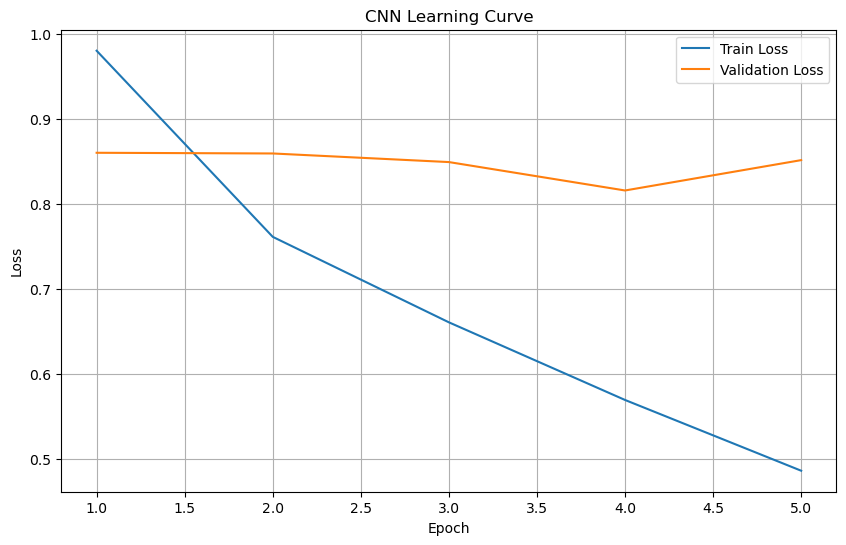

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import fasttext
import numpy as np
import matplotlib.pyplot as plt
import time
import tensorflow as tf

# Set random seed for TensorFlow
tf.random.set_seed(42)  # You can use any integer value as the seed

# Set random seed for NumPy
np.random.seed(42)

# Load the trained FastText model
fasttext_model = fasttext.load_model('fasttext_model.bin')

# Assuming df_labelled_balanced is your DataFrame with 'cleaned_text' and 'label' columns
df_labelled_balanced['cleaned_text'] = df_labelled_balanced['cleaned_text'].astype(str)

# Tokenize and obtain embeddings for each word in 'cleaned_text'
df_labelled_balanced['word_embeddings'] = df_labelled_balanced['cleaned_text'].apply(
    lambda x: [fasttext_model.get_word_vector(word) for word in x.split()]
)

# Pad sequences to ensure consistent length
max_sequence_length = max(len(seq) for seq in df_labelled_balanced['word_embeddings'])
df_labelled_balanced['word_embeddings_padded'] = df_labelled_balanced['word_embeddings'].apply(
    lambda x: np.pad(x, ((0, max_sequence_length - len(x)), (0, 0)), 'constant', constant_values=np.nan)
)

# Convert to numpy array
X = np.array(df_labelled_balanced['word_embeddings_padded'].tolist())

# Replace NaN values with zeros
X = np.nan_to_num(X)

# Map labels to start from 0
label_mapping = {-1: 0, 0: 1, 1: 2}
df_labelled_balanced['label_mapped'] = df_labelled_balanced['label'].map(label_mapping)

# Split the labeled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, df_labelled_balanced['label_mapped'], test_size=0.2, random_state=42
)

# Define the CNN model configuration
num_filters = 128
filter_sizes = [3, 4, 5]
num_classes = 3
num_layers = len(filter_sizes)

# Build a 1D CNN model
model_cnn = Sequential()
for filter_size in filter_sizes:
    model_cnn.add(Conv1D(num_filters, filter_size, activation='relu', input_shape=(max_sequence_length, 100)))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(num_classes, activation='softmax'))

# Compile the model
model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Lists to store metrics over epochs
train_losses_cnn = []
val_losses_cnn = []
accuracies_cnn = []
precisions_cnn = []
recalls_cnn = []
f1_scores_cnn = []
conf_matrices_cnn = []

# Train the CNN model and collect metrics
start_time = time.time()

num_epochs_cnn = 5

for epoch in range(num_epochs_cnn):
    history = model_cnn.fit(X_train, y_train, epochs=1, batch_size=64, validation_data=(X_test, y_test), verbose=0)

    # Evaluate on training data
    y_train_pred = np.argmax(model_cnn.predict(X_train), axis=1)
    train_loss = history.history['loss'][0]
    train_losses_cnn.append(train_loss)

    # Evaluate on validation data
    y_val_pred = np.argmax(model_cnn.predict(X_test), axis=1)
    val_loss = history.history['val_loss'][0]
    val_losses_cnn.append(val_loss)

    # Calculate metrics
    accuracy_cnn = accuracy_score(y_test, y_val_pred)
    accuracies_cnn.append(accuracy_cnn)

    precision_cnn, recall_cnn, f1_cnn, _ = precision_recall_fscore_support(y_test, y_val_pred, average='weighted')
    precisions_cnn.append(precision_cnn)
    recalls_cnn.append(recall_cnn)
    f1_scores_cnn.append(f1_cnn)

    conf_matrix_cnn = confusion_matrix(y_test, y_val_pred)
    conf_matrices_cnn.append(conf_matrix_cnn)

    print(f'Epoch {epoch + 1}/{num_epochs_cnn} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f} - Val Accuracy: {accuracy_cnn:.4f}')
    print(f'  Precision: {precision_cnn:.4f} - Recall: {recall_cnn:.4f} - F1 Score: {f1_cnn:.4f}')
    print(f"Metrics:")
    print(f"  Accuracy: {accuracy_cnn:.4f}")
    print(f"  Precision: {precision_cnn:.4f}")
    print(f"  Recall: {recall_cnn:.4f}")
    print(f"  F1 Score: {f1_cnn:.4f}")
    print(f"Training Time: {training_time:.2f} seconds")

# Calculate the time taken to train the model
end_time = time.time()
training_time = end_time - start_time

# Print out the results for the specific configuration
print(f"Configuration - Model: 1D CNN, Num Filters: {num_filters}, Filter Sizes: {filter_sizes}")
print(f"Metrics:")
print(f"  Accuracy: {accuracy_cnn:.4f}")
print(f"  Precision: {precision_cnn:.4f}")
print(f"  Recall: {recall_cnn:.4f}")
print(f"  F1 Score: {f1_cnn:.4f}")
print(f"Training Time: {training_time:.2f} seconds")

# Plot Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs_cnn + 1), train_losses_cnn, label='Train Loss')
plt.plot(range(1, num_epochs_cnn + 1), val_losses_cnn, label='Validation Loss')
plt.title('CNN Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import fasttext
import numpy as np
import matplotlib.pyplot as plt
import time

# Load the trained FastText model
fasttext_model = fasttext.load_model('fasttext_model.bin')

# Assuming df_labelled_balanced is your DataFrame with 'cleaned_text' and 'label' columns
df_resampled['cleaned_text'] = df_resampled['cleaned_text'].astype(str)

# Tokenize and obtain embeddings for each word in 'cleaned_text'
df_resampled['word_embeddings'] = df_resampled['cleaned_text'].apply(
    lambda x: [fasttext_model.get_word_vector(word) for word in x.split()]
)

# Pad sequences to ensure consistent length
max_sequence_length = max(len(seq) for seq in df_resampled['word_embeddings'])
df_resampled['word_embeddings_padded'] = df_resampled['word_embeddings'].apply(
    lambda x: np.pad(x, ((0, max_sequence_length - len(x)), (0, 0)), 'constant', constant_values=np.nan)
)

# Convert to numpy array
X = np.array(df_resampled['word_embeddings_padded'].tolist())

# Replace NaN values with zeros
X = np.nan_to_num(X)

# Map labels to start from 0
label_mapping = {-1: 0, 0: 1, 1: 2}
df_resampled['label_mapped'] = df_resampled['label'].map(label_mapping)

# Split the labeled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, df_resampled['label_mapped'], test_size=0.2, random_state=42
)

# Define the CNN model configuration
num_filters = 64
filter_sizes = [3, 4, 5]
num_classes = 3
num_layers = len(filter_sizes)

# Build a 1D CNN model
model_cnn = Sequential()
for filter_size in filter_sizes:
    model_cnn.add(Conv1D(num_filters, filter_size, activation='relu', input_shape=(max_sequence_length, 100)))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(num_classes, activation='softmax'))

# Compile the model
model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Lists to store metrics over epochs
train_losses_cnn = []
val_losses_cnn = []
accuracies_cnn = []
precisions_cnn = []
recalls_cnn = []
f1_scores_cnn = []
conf_matrices_cnn = []

# Train the CNN model and collect metrics
start_time = time.time()

num_epochs_cnn = 5

for epoch in range(num_epochs_cnn):
    history = model_cnn.fit(X_train, y_train, epochs=1, batch_size=64, validation_data=(X_test, y_test), verbose=0)

    # Evaluate on training data
    y_train_pred = np.argmax(model_cnn.predict(X_train), axis=1)
    train_loss = history.history['loss'][0]
    train_losses_cnn.append(train_loss)

    # Evaluate on validation data
    y_val_pred = np.argmax(model_cnn.predict(X_test), axis=1)
    val_loss = history.history['val_loss'][0]
    val_losses_cnn.append(val_loss)

    # Calculate metrics
    accuracy_cnn = accuracy_score(y_test, y_val_pred)
    accuracies_cnn.append(accuracy_cnn)

    precision_cnn, recall_cnn, f1_cnn, _ = precision_recall_fscore_support(y_test, y_val_pred, average='weighted')
    precisions_cnn.append(precision_cnn)
    recalls_cnn.append(recall_cnn)
    f1_scores_cnn.append(f1_cnn)

    conf_matrix_cnn = confusion_matrix(y_test, y_val_pred)
    conf_matrices_cnn.append(conf_matrix_cnn)

    print(f'Epoch {epoch + 1}/{num_epochs_cnn} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f} - Val Accuracy: {accuracy_cnn:.4f}')

# Calculate the time taken to train the model
end_time = time.time()
training_time = end_time - start_time

# Print out the results for the specific configuration
print(f"Configuration - Model: 1D CNN, Num Filters: {num_filters}, Filter Sizes: {filter_sizes}")
# print(f"Metrics:")
# print(f"  Accuracy: {accuracy_cnn:.4f}")
# print(f"  Precision: {precision_cnn:.4f}")
# print(f"  Recall: {recall_cnn:.4f}")
# print(f"  F1 Score: {f1_cnn:.4f}")
# print(f"Training Time: {training_time:.2f} seconds")

# Plot Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs_cnn + 1), train_losses_cnn, label='Train Loss')
plt.plot(range(1, num_epochs_cnn + 1), val_losses_cnn, label='Validation Loss')
plt.title('CNN Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/3
253/253 [==============================] - 56s 183ms/step - loss: 0.7571 - accuracy: 0.6708 - val_loss: 0.6278 - val_accuracy: 0.7546
Epoch 2/3
253/253 [==============================] - 41s 161ms/step - loss: 0.4494 - accuracy: 0.8335 - val_loss: 0.3720 - val_accuracy: 0.8723
Epoch 3/3
127/127 [==============================] - 8s 16ms/step


C:\Users\tomsb\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
C:\Users\tomsb\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
C:\Users\tomsb\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
C:\Users\tomsb\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
C:\Users\tomsb\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstanc

127/127 [==============================] - 4s 17ms/step


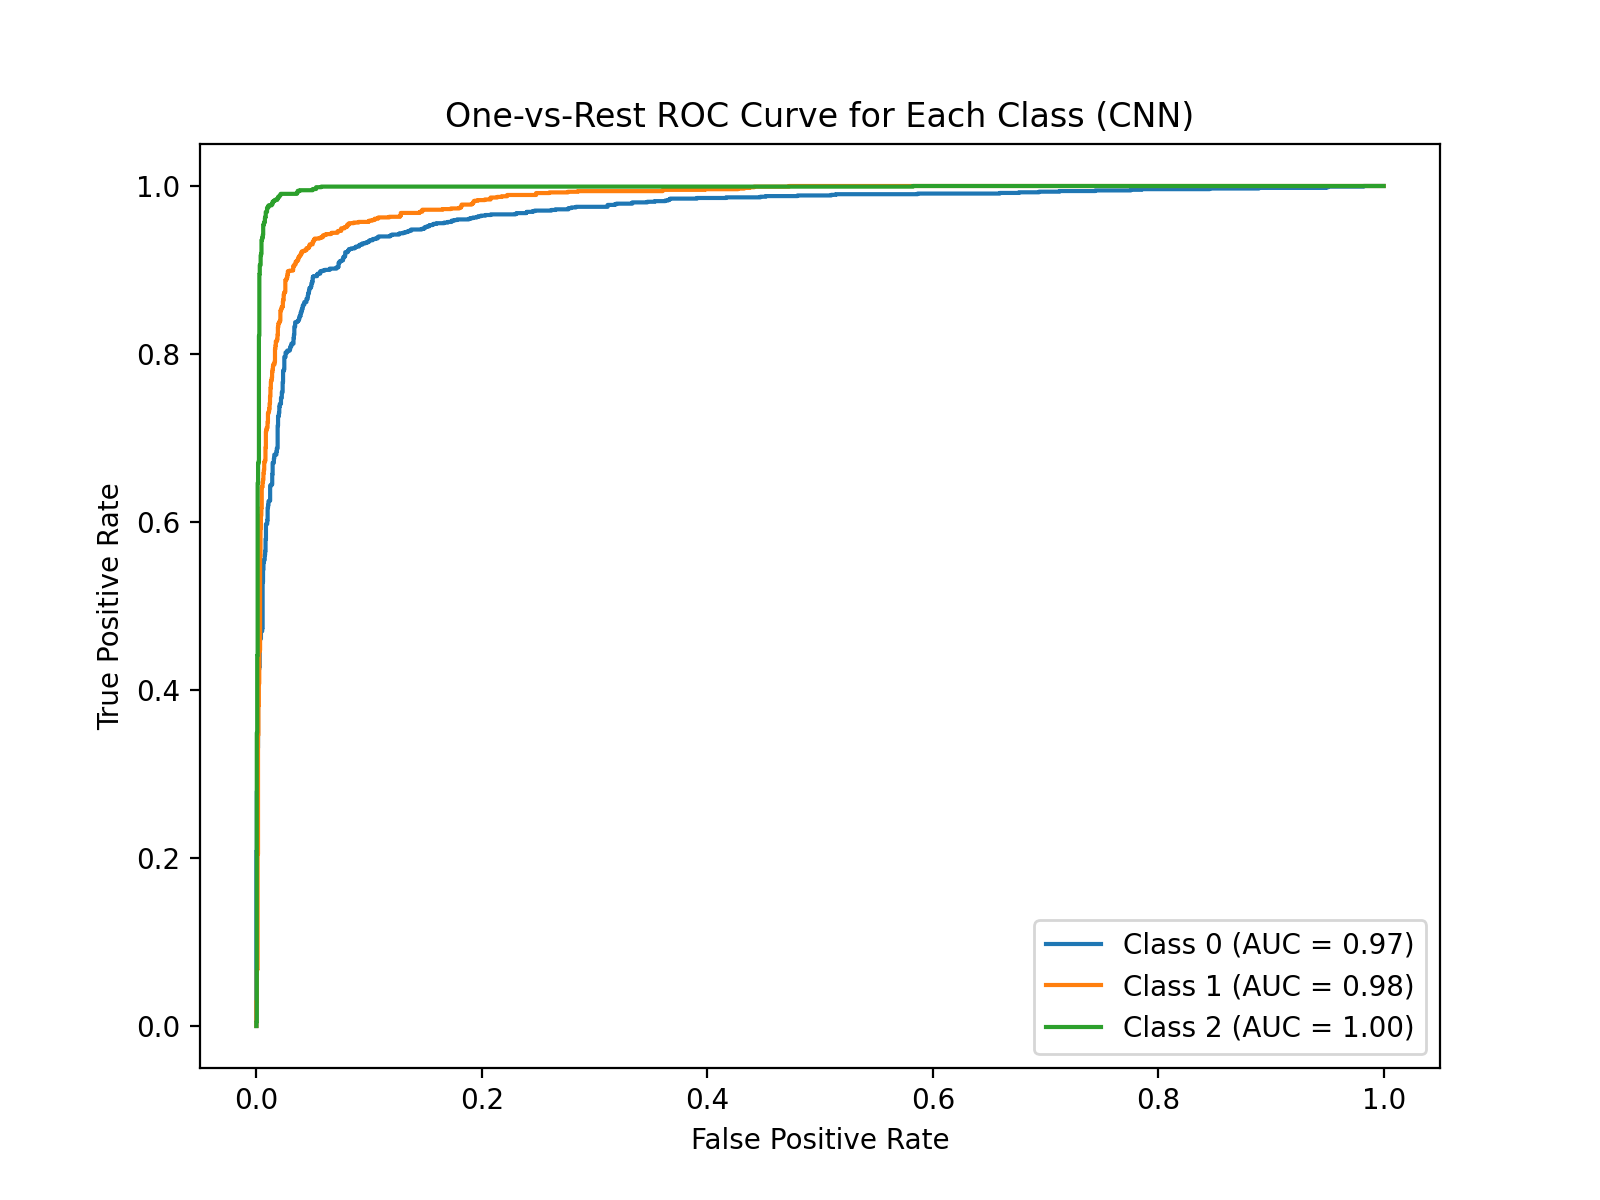

CNN Metrics:
{'Accuracy': 0.8936539414972732, 'Precision': array([0.94123314, 0.7923463 , 0.97360913]), 'Recall': array([0.73348348, 0.96412214, 0.98060345]), 'F1 Score': array([0.82447257, 0.86983471, 0.97709377]), 'Weighted Precision': array([0.94123314, 0.7923463 , 0.97360913]), 'Weighted Recall': array([0.73348348, 0.96412214, 0.98060345]), 'Weighted F1 Score': 0.8918679897290441, 'Weighted Accuracy': 0.8936539414972732, 'Confusion Matrix': array([[ 977,  318,   37],
       [  47, 1263,    0],
       [  14,   13, 1365]], dtype=int64), 'FPR': {0: array([0.        , 0.        , 0.        , ..., 0.99629904, 0.99703923,
       1.        ]), 1: array([0.        , 0.        , 0.        , ..., 0.99743025, 0.99816446,
       1.        ]), 2: array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.78501136e-04, 3.78501136e-04, 3.78501136e-04, 3.78501136e-04,
       3.78501136e-04, 3.78501136e-04, 3.78501136e-04, 3.78501136e-04,
       3.78501136e-04, 3.78501136e-04, 

In [172]:
# Set seeds and environment variables for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
os.environ["PYTHONHASHSEED"] = "0"
os.environ["TF_DETERMINISTIC_OPS"] = "1"

# Assuming df_resampled is your DataFrame with 'cleaned_text' and 'label' columns
df_resampled["cleaned_text"] = df_resampled["cleaned_text"].astype(str)

# Tokenize and obtain embeddings for each word in 'cleaned_text'
df_resampled["word_embeddings"] = df_resampled["cleaned_text"].apply(
    lambda x: [model.get_word_vector(word) for word in x.split()]
)

# Pad sequences to ensure consistent length
X_padded = pad_sequences(
    df_resampled["word_embeddings"].tolist(),
    maxlen=max_sequence_length,
    dtype="float32",
    padding="post",
    truncating="post",
)

# Map labels to start from 0
label_mapping = {-1: 0, 0: 1, 1: 2}
df_resampled["label_mapped"] = df_resampled["label"].map(label_mapping)

# Split the labeled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_padded, df_resampled["label_mapped"], test_size=0.2, random_state=42
)

# Build a 1D CNN model
embedding_size = 100
num_filters = 128
filter_sizes = [3, 4, 5]
num_classes = 3

model_cnn_not_lemmatized = Sequential()
model_cnn_not_lemmatized.add(
    Conv1D(num_filters, 3, activation="relu", input_shape=(max_sequence_length, embedding_size))
)
model_cnn_not_lemmatized.add(Conv1D(num_filters, 4, activation="relu"))
model_cnn_not_lemmatized.add(Conv1D(num_filters, 5, activation="relu"))
model_cnn_not_lemmatized.add(GlobalMaxPooling1D())
model_cnn_not_lemmatized.add(Dense(num_classes, activation="softmax"))

# Compile the model
model_cnn_not_lemmatized.compile(
    loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)

# Train the CNN model
model_cnn_not_lemmatized.fit(
    X_train, y_train, epochs=3, batch_size=64, validation_data=(X_test, y_test)
)

# Evaluate the CNN model
y_pred_cnn_probabilities = model_cnn_not_lemmatized.predict(X_test)
y_pred_cnn = np.argmax(y_pred_cnn_probabilities, axis=1)

# Calculate metrics
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
precision_cnn, recall_cnn, f1_cnn, _ = precision_recall_fscore_support(
    y_test, y_pred_cnn, average=None
)

# Confusion matrix
conf_matrix_cnn = confusion_matrix(y_test, y_pred_cnn)

# Calculate other metrics
weighted_f1_cnn = f1_score(
    y_test, y_pred_cnn, average="weighted", sample_weight=np.ones(len(y_test))
)
weighted_accuracy_cnn = accuracy_score(
    y_test, y_pred_cnn, sample_weight=np.ones(len(y_test))
)

# Binarize the labels for ROC and AUC calculation
label_binarizer_cnn = LabelBinarizer()
y_onehot_test_cnn = label_binarizer_cnn.fit_transform(y_test)
y_pred_probabilities_cnn = model_cnn_not_lemmatized.predict(X_test)

# Calculate ROC and AUC for all classes
n_classes_cnn = len(label_binarizer_cnn.classes_)
fpr_cnn = dict()
tpr_cnn = dict()
roc_auc_cnn = dict()

for i in range(n_classes_cnn):
    fpr_cnn[i], tpr_cnn[i], _ = roc_curve(
        y_onehot_test_cnn[:, i], y_pred_probabilities_cnn[:, i]
    )
    roc_auc_cnn[i] = auc(fpr_cnn[i], tpr_cnn[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes_cnn):
    plt.plot(
        fpr_cnn[i], tpr_cnn[i], label=f"Class {i} (AUC = {roc_auc_cnn[i]:.2f})"
    )

plt.title("One-vs-Rest ROC Curve for Each Class (CNN)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Store all metrics
cnn_metrics_not_lemmatized = {
    "Accuracy": accuracy_cnn,
    "Precision": precision_cnn,
    "Recall": recall_cnn,
    "F1 Score": f1_cnn,
    "Weighted Precision": precision_cnn,
    "Weighted Recall": recall_cnn,
    "Weighted F1 Score": weighted_f1_cnn,
    "Weighted Accuracy": weighted_accuracy_cnn,
    "Confusion Matrix": conf_matrix_cnn,
    "FPR": fpr_cnn,
    "TPR": tpr_cnn,
    "ROC AUC": roc_auc_cnn,
}

# Print and store the metrics
print("CNN Metrics:")
print(cnn_metrics_not_lemmatized)

# Save all metrics to a file (adjust the file path as needed)
cnn_metrics_filename_not_lemmatized = "cnn_metrics_not_lemmatized.npy"
np.savez(cnn_metrics_filename_not_lemmatized, **cnn_metrics_not_lemmatized)

# Learning Curve for CNN

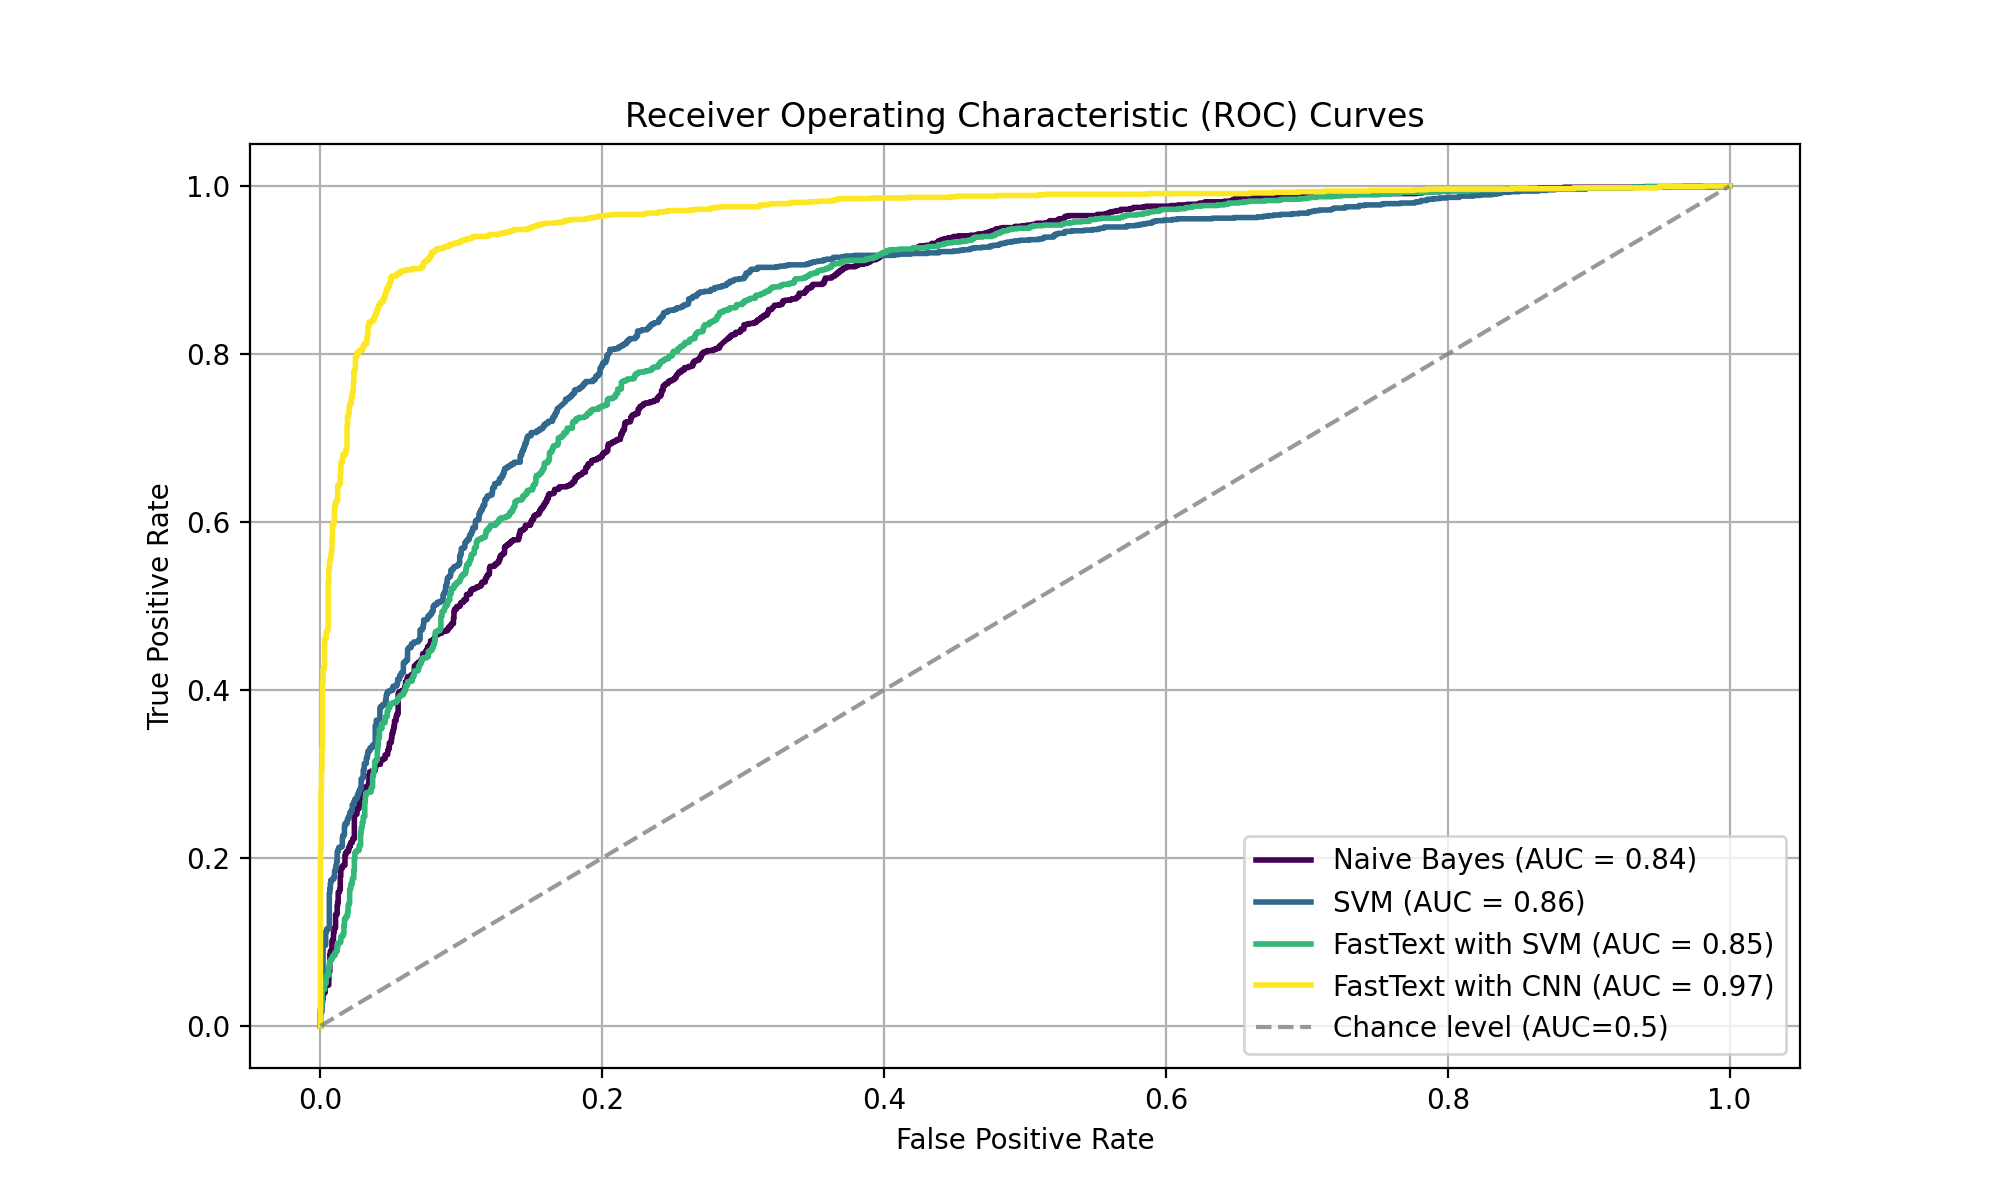

In [175]:
# Assuming you have the following metrics dictionaries
# nb_metrics_not_lemmatized, svm_metrics_not_lemmatized, svm_metrics_fasttext_not_lemmatized, cnn_metrics_not_lemmatized

# List of classifiers and their ROC curve information
classifiers = ['Naive Bayes', 'SVM', 'FastText with SVM', 'FastText with CNN']
roc_curves = [
    (nb_metrics_not_lemmatized['FPR'][0], nb_metrics_not_lemmatized['TPR'][0], nb_metrics_not_lemmatized['ROC AUC'][0]),
    (svm_metrics_not_lemmatized['FPR'][0], svm_metrics_not_lemmatized['TPR'][0], svm_metrics_not_lemmatized['ROC AUC'][0]),
    (svm_metrics_fasttext_not_lemmatized['FPR'][0], svm_metrics_fasttext_not_lemmatized['TPR'][0], svm_metrics_fasttext_not_lemmatized['ROC AUC'][0]),
    (cnn_metrics_not_lemmatized['FPR'][0], cnn_metrics_not_lemmatized['TPR'][0], cnn_metrics_not_lemmatized['ROC AUC'][0])
]

# Define a color map for better aesthetics
colors = plt.cm.viridis(np.linspace(0, 1, len(classifiers)))

# Plotting ROC curves with enhanced aesthetics
plt.figure(figsize=(10, 6))
for i, (fpr, tpr, roc_auc_value) in enumerate(roc_curves):
    plt.plot(fpr, tpr, label=f'{classifiers[i]} (AUC = {roc_auc_value:.2f})', color=colors[i], linestyle='-', linewidth=2)

# Adding random classifier (no skill)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Chance level (AUC=0.5)', alpha=0.8)

plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

# Assuming you have the following metrics dictionaries
# nb_metrics, svm_metrics_linear, svm_metrics_fasttext, cnn_metrics
# nb_metrics_not_lemmatized, svm_metrics_not_lemmatized, svm_metrics_fasttext_not_lemmatized, cnn_metrics_not_lemmatized

# List of classifiers and their ROC curve information for the lemmatized dataset
classifiers_lemmatized = ['Naive Bayes', 'SVM', 'FastText with SVM', 'FastText with CNN']
roc_curves_lemmatized = [
    (nb_metrics['FPR'], nb_metrics['TPR'], nb_metrics['ROC AUC']),
    (svm_metrics_linear['FPR'], svm_metrics_linear['TPR'], svm_metrics_linear['ROC AUC']),
    (svm_metrics_fasttext['FPR'], svm_metrics_fasttext['TPR'], svm_metrics_fasttext['ROC AUC']),
    (cnn_metrics['FPR'], cnn_metrics['TPR'], cnn_metrics['ROC AUC'])
]

# List of classifiers and their ROC curve information for the not lemmatized dataset
classifiers_not_lemmatized = ['Naive Bayes', 'SVM', 'FastText with SVM', 'FastText with CNN']
roc_curves_not_lemmatized = [
    (nb_metrics_not_lemmatized['FPR'], nb_metrics_not_lemmatized['TPR'], nb_metrics_not_lemmatized['ROC AUC']),
    (svm_metrics_not_lemmatized['FPR'], svm_metrics_not_lemmatized['TPR'], svm_metrics_not_lemmatized['ROC AUC']),
    (svm_metrics_fasttext_not_lemmatized['FPR'], svm_metrics_fasttext_not_lemmatized['TPR'], svm_metrics_fasttext_not_lemmatized['ROC AUC']),
    (cnn_metrics_not_lemmatized['FPR'], cnn_metrics_not_lemmatized['TPR'], cnn_metrics_not_lemmatized['ROC AUC'])
]

# Set the font size for all text
plt.rcParams.update({'font.size': 16})

# Define a function to plot ROC curves
def plot_roc_curves(ax, classifiers, roc_curves):
    # Define a color map for better aesthetics
    colors = plt.cm.viridis(np.linspace(0, 1, len(classifiers)))

    # Lists to store FPR, TPR, and ROC AUC for macro-average
    macro_fprs = []
    macro_tprs = []
    macro_roc_aucs = []

    # Plotting ROC curves with enhanced aesthetics
    for i, (fpr, tpr, roc_auc_value) in enumerate(roc_curves):
        ax.plot(fpr, tpr, label=f'{classifiers[i]} (AUC = {roc_auc_value:.2f})', color=colors[i], linestyle='-', linewidth=2)

        # Append to macro-average lists
        macro_fprs.append(fpr)
        macro_tprs.append(tpr)
        macro_roc_aucs.append(roc_auc_value)

    # Adding random classifier (no skill)
    ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Chance level (AUC=0.5)', alpha=0.8)

    # Compute macro-average FPR, TPR, and ROC AUC
    macro_fpr = np.mean(macro_fprs, axis=0)
    macro_tpr = np.mean(macro_tprs, axis=0)
    macro_roc_auc = np.mean(macro_roc_aucs)

    # Plot macro-average ROC curve
    ax.plot(macro_fpr, macro_tpr, label=f'Macro-average (AUC = {macro_roc_auc:.2f})', color='black', linestyle='--', linewidth=2)

    ax.set_title('Receiver Operating Characteristic (ROC) Curves')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend()
    ax.grid(True)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Plot ROC curves for the lemmatized dataset
plot_roc_curves(axs[0], classifiers_lemmatized, roc_curves_lemmatized)
axs[0].set_title('Receiver Operating Characteristic (ROC) - Lemmatized')

# Plot ROC curves for the not lemmatized dataset
plot_roc_curves(axs[1], classifiers_not_lemmatized, roc_curves_not_lemmatized)
axs[1].set_title('Receiver Operating Characteristic (ROC) - Not Lemmatized')

plt.tight_layout()
plt.show()


In [247]:
# Set the font size for all text
plt.rcParams.update({'font.size': 16})

# Define a function to plot ROC curves
def plot_roc_curves(ax, classifiers, roc_curves):
    # Define a color map for better aesthetics
    colors = plt.cm.viridis(np.linspace(0, 1, len(classifiers)))

    # Plotting ROC curves with enhanced aesthetics
    for i, (fpr, tpr, roc_auc_value) in enumerate(roc_curves):
        ax.plot(fpr, tpr, label=f'{classifiers[i]} (AUC = {roc_auc_value:.2f})', color=colors[i], linestyle='-', linewidth=2)

    # Adding random classifier (no skill)
    ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Chance level (AUC=0.5)', alpha=0.8)

    ax.set_title('Receiver Operating Characteristic (ROC) Curves')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend()
    ax.grid(True)

# Assuming you have the following metrics dictionaries
# nb_metrics, svm_metrics_linear, svm_metrics_fasttext, cnn_metrics
# nb_metrics_not_lemmatized, svm_metrics_not_lemmatized, svm_metrics_fasttext_not_lemmatized, cnn_metrics_not_lemmatized

# List of classifiers and their ROC curve information for the lemmatized dataset
classifiers_lemmatized = ['Naive Bayes', 'SVM', 'FastText with SVM', 'FastText with CNN']
roc_curves_lemmatized = [
    (nb_metrics['FPR'][0], nb_metrics['TPR'][0], nb_metrics['ROC AUC'][0]),
    (svm_metrics_linear['FPR'][0], svm_metrics_linear['TPR'][0], svm_metrics_linear['ROC AUC'][0]),
    (svm_metrics_fasttext['FPR'][0], svm_metrics_fasttext['TPR'][0], svm_metrics_fasttext['ROC AUC'][0]),
    (cnn_metrics['FPR'][0], cnn_metrics['TPR'][0], cnn_metrics['ROC AUC'][0])
]

# List of classifiers and their ROC curve information for the not lemmatized dataset
classifiers_not_lemmatized = ['Naive Bayes', 'SVM', 'FastText with SVM', 'FastText with CNN']
roc_curves_not_lemmatized = [
    (nb_metrics_not_lemmatized['FPR'][0], nb_metrics_not_lemmatized['TPR'][0], nb_metrics_not_lemmatized['ROC AUC'][0]),
    (svm_metrics_not_lemmatized['FPR'][0], svm_metrics_not_lemmatized['TPR'][0], svm_metrics_not_lemmatized['ROC AUC'][0]),
    (svm_metrics_fasttext_not_lemmatized['FPR'][0], svm_metrics_fasttext_not_lemmatized['TPR'][0], svm_metrics_fasttext_not_lemmatized['ROC AUC'][0]),
    (cnn_metrics_not_lemmatized['FPR'][0], cnn_metrics_not_lemmatized['TPR'][0], cnn_metrics_not_lemmatized['ROC AUC'][0])
]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Plot ROC curves for the lemmatized dataset
plot_roc_curves(axs[0], classifiers_lemmatized, roc_curves_lemmatized)
axs[0].set_title('Receiver Operating Characteristic (ROC) - Lemmatized')

# Plot ROC curves for the not lemmatized dataset
plot_roc_curves(axs[1], classifiers_not_lemmatized, roc_curves_not_lemmatized)
axs[1].set_title('Receiver Operating Characteristic (ROC) - Not Lemmatized')

plt.tight_layout()
plt.show()

NameError: name 'nb_metrics_not_lemmatized' is not defined

# Learning curves for all traditional classifiers

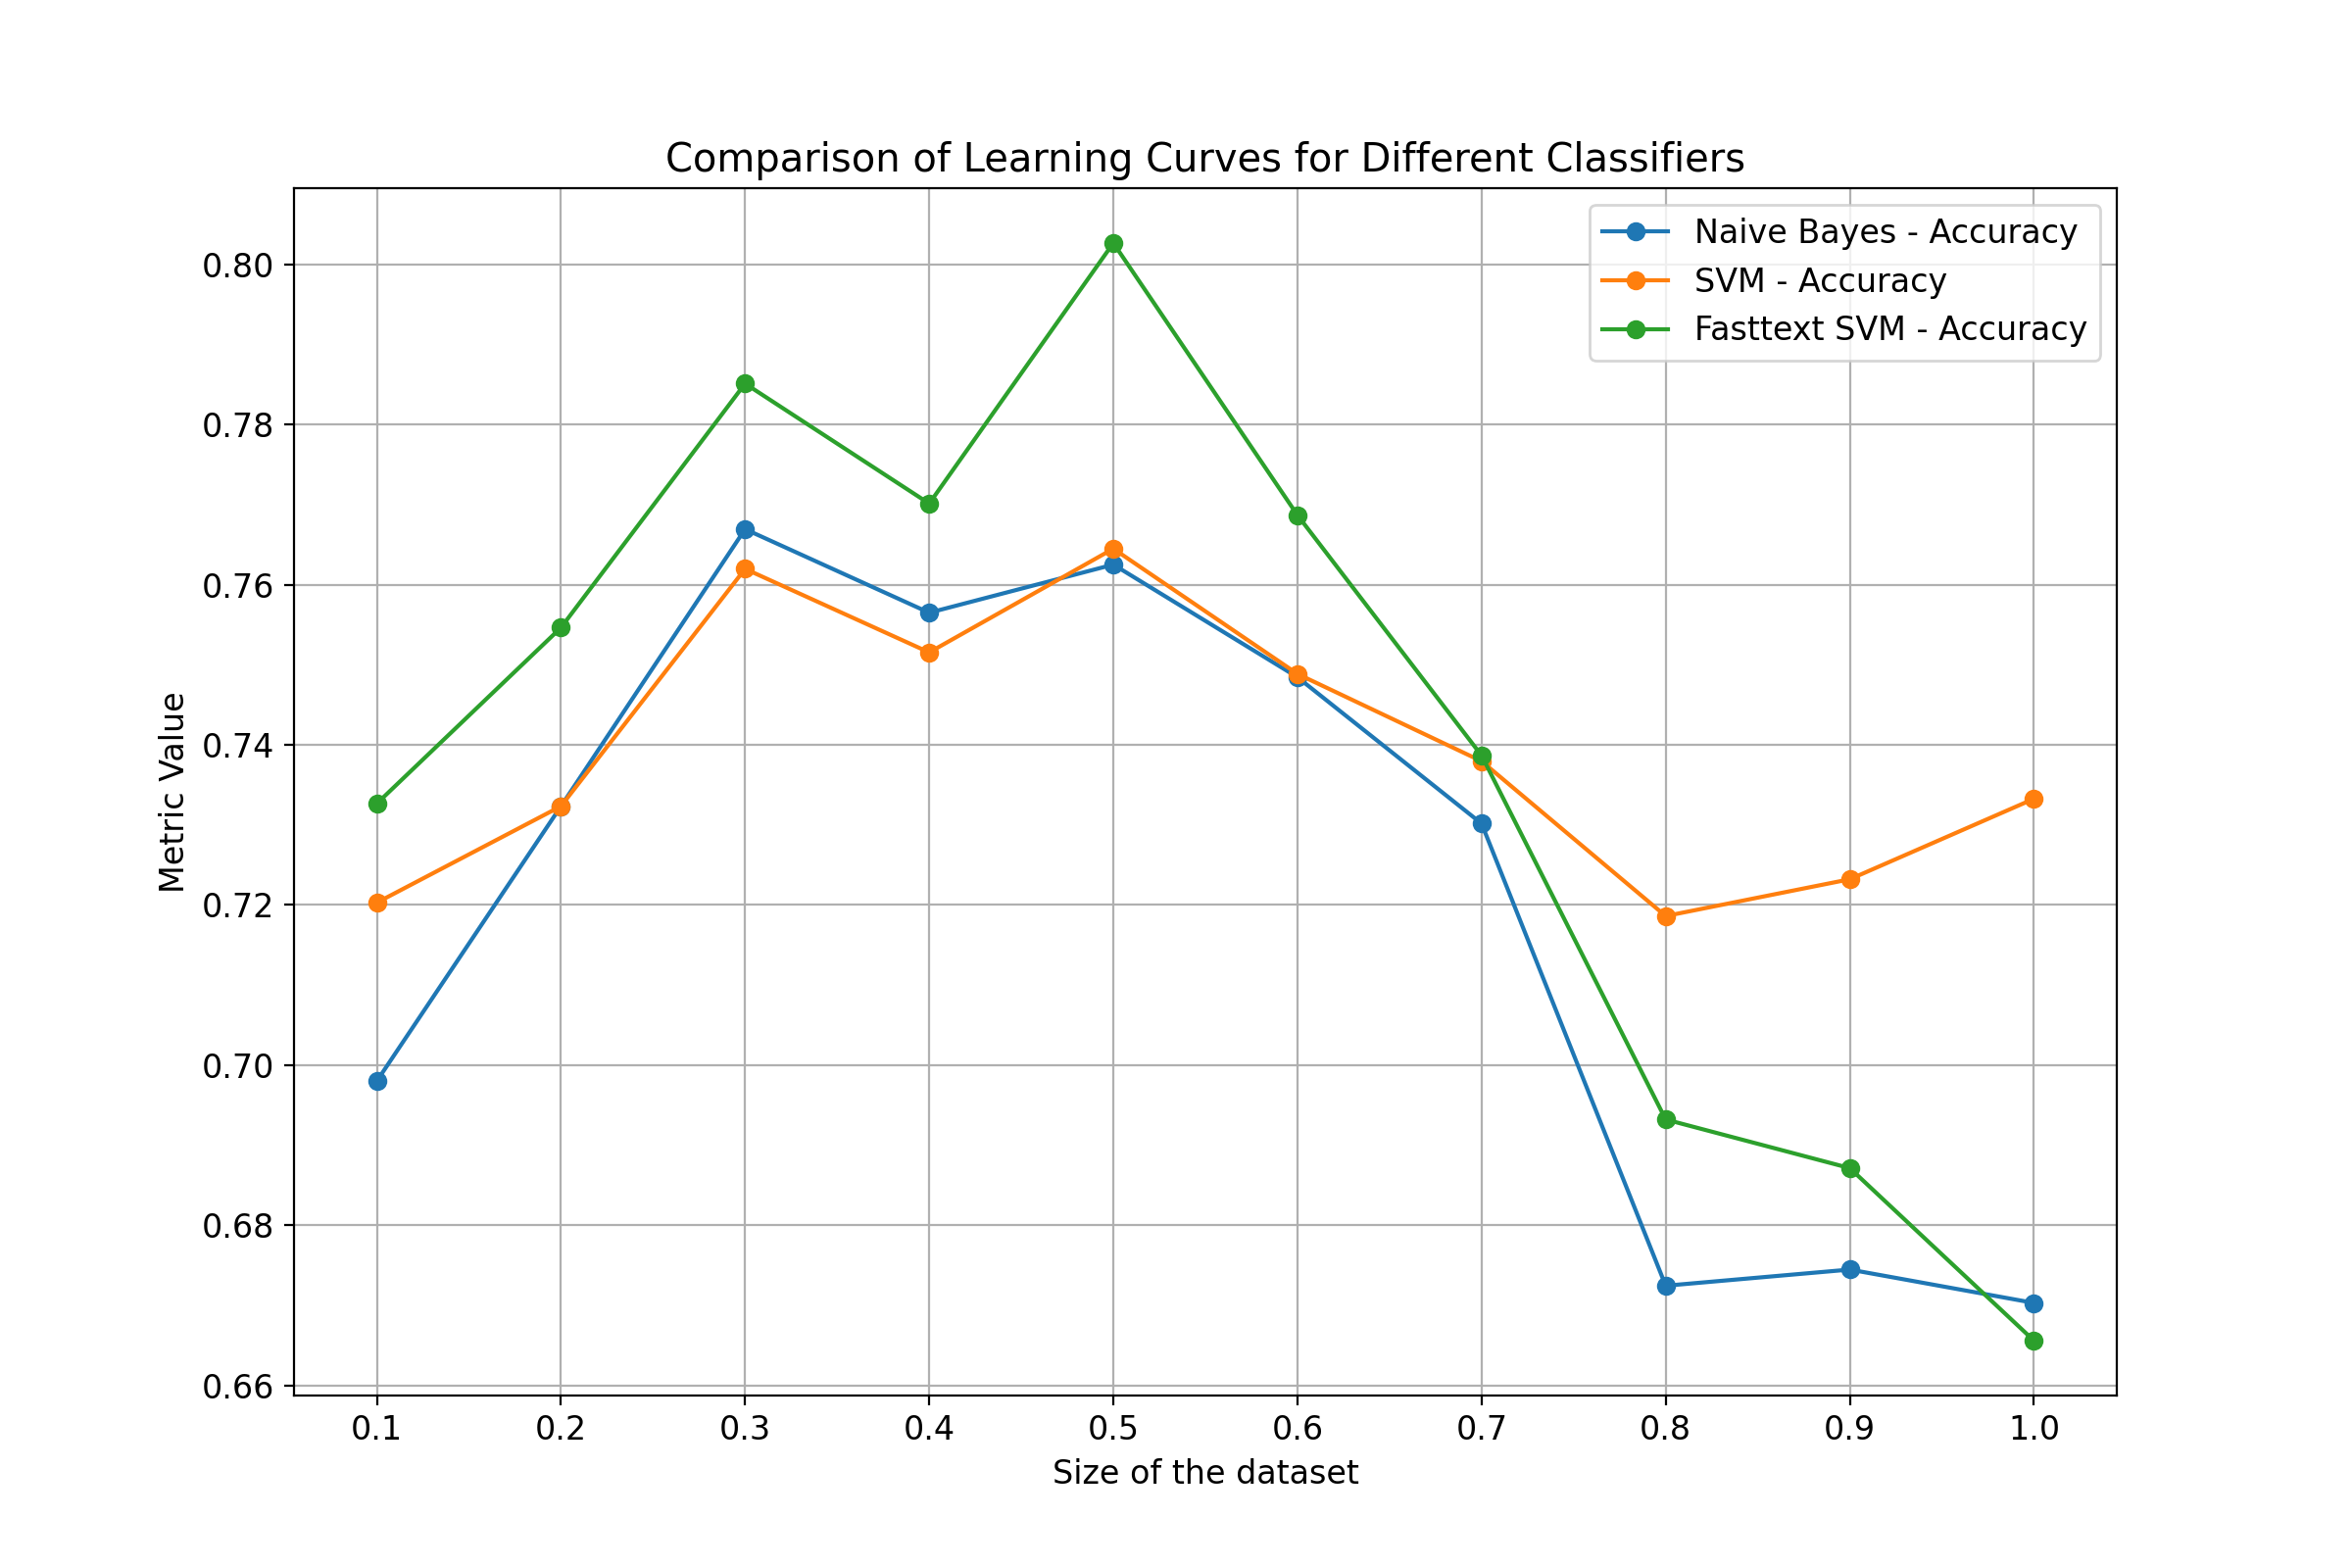

In [263]:
# learning_curve_metrics_nb_not_lemmatized, learning_curve_metrics_svm_not_lemmatized, learning_curve_metrics_fasttext_svm_not_lemmatized

# learning_curve_metrics_nb, learning_curve_metrics_svm, learning_curve_metrics_fasttext_svm

# Assuming you have the following data stored in variables
learning_curve_metrics_nb_not_lemmatized = {
    'Training Percentages': percentage_splits_nb_not_lemmatized,
    'Accuracy': accuracy_list_nb_not_lemmatized,
    'Precision': precision_list_nb_not_lemmatized,
    'Recall': recall_list_nb_not_lemmatized,
    'F1 Score': f1_list_nb_not_lemmatized,
}

learning_curve_metrics_svm_not_lemmatized = {
    'Training Percentages': percentage_splits_svm_not_lemmatized,
    'Accuracy': accuracy_list_svm_not_lemmatized,
    'Precision': precision_list_svm_not_lemmatized,
    'Recall': recall_list_svm_not_lemmatized,
    'F1 Score': f1_list_svm_not_lemmatized,
}

learning_curve_metrics_fasttext_svm_not_lemmatized = {
    'Training Percentages': percentage_splits_fasttext_svm_not_lemmatized,
    'Accuracy': accuracy_list_fasttext_svm_not_lemmatized,
    'Precision': precision_list_fasttext_svm_not_lemmatized,
    'Recall': recall_list_fasttext_svm_not_lemmatized,
    'F1 Score': f1_list_fasttext_svm_not_lemmatized,
}

# Create a comparison chart for learning curves
plt.figure(figsize=(12, 8))

# Plot learning curves for Naive Bayes
plt.plot(learning_curve_metrics_nb_not_lemmatized['Training Percentages'], learning_curve_metrics_nb_not_lemmatized['Accuracy'], label='Naive Bayes - Accuracy', marker='o')
# plt.plot(learning_curve_metrics_nb['Training Percentages'], learning_curve_metrics_nb['Precision'], label='Naive Bayes - Precision', marker='o')
# plt.plot(learning_curve_metrics_nb['Training Percentages'], learning_curve_metrics_nb['Recall'], label='Naive Bayes - Recall', marker='o')
# plt.plot(learning_curve_metrics_nb['Training Percentages'], learning_curve_metrics_nb['F1 Score'], label='Naive Bayes - F1 Score', marker='o')

# Plot learning curves for SVM
plt.plot(learning_curve_metrics_svm_not_lemmatized['Training Percentages'], learning_curve_metrics_svm_not_lemmatized['Accuracy'], label='SVM - Accuracy', marker='o')
# plt.plot(learning_curve_metrics_svm['Training Percentages'], learning_curve_metrics_svm['Precision'], label='SVM - Precision', marker='o')
# plt.plot(learning_curve_metrics_svm['Training Percentages'], learning_curve_metrics_svm['Recall'], label='SVM - Recall', marker='o')
# plt.plot(learning_curve_metrics_svm['Training Percentages'], learning_curve_metrics_svm['F1 Score'], label='SVM - F1 Score', marker='o')

# Plot learning curves for Fasttext SVM
plt.plot(learning_curve_metrics_fasttext_svm_not_lemmatized['Training Percentages'], learning_curve_metrics_fasttext_svm_not_lemmatized['Accuracy'], label='Fasttext SVM - Accuracy', marker='o')
# plt.plot(learning_curve_metrics_fasttext_svm['Training Percentages'], learning_curve_metrics_fasttext_svm['Precision'], label='Fasttext SVM - Precision', marker='o')
# plt.plot(learning_curve_metrics_fasttext_svm['Training Percentages'], learning_curve_metrics_fasttext_svm['Recall'], label='Fasttext SVM - Recall', marker='o')
# plt.plot(learning_curve_metrics_fasttext_svm['Training Percentages'], learning_curve_metrics_fasttext_svm['F1 Score'], label='Fasttext SVM - F1 Score', marker='o')

# Customize the plot
plt.title('Comparison of Learning Curves for Different Classifiers')
plt.xlabel('Size of the dataset')
plt.ylabel('Metric Value')
plt.xticks(percentage_splits)
plt.grid(True)
plt.legend()
plt.show()

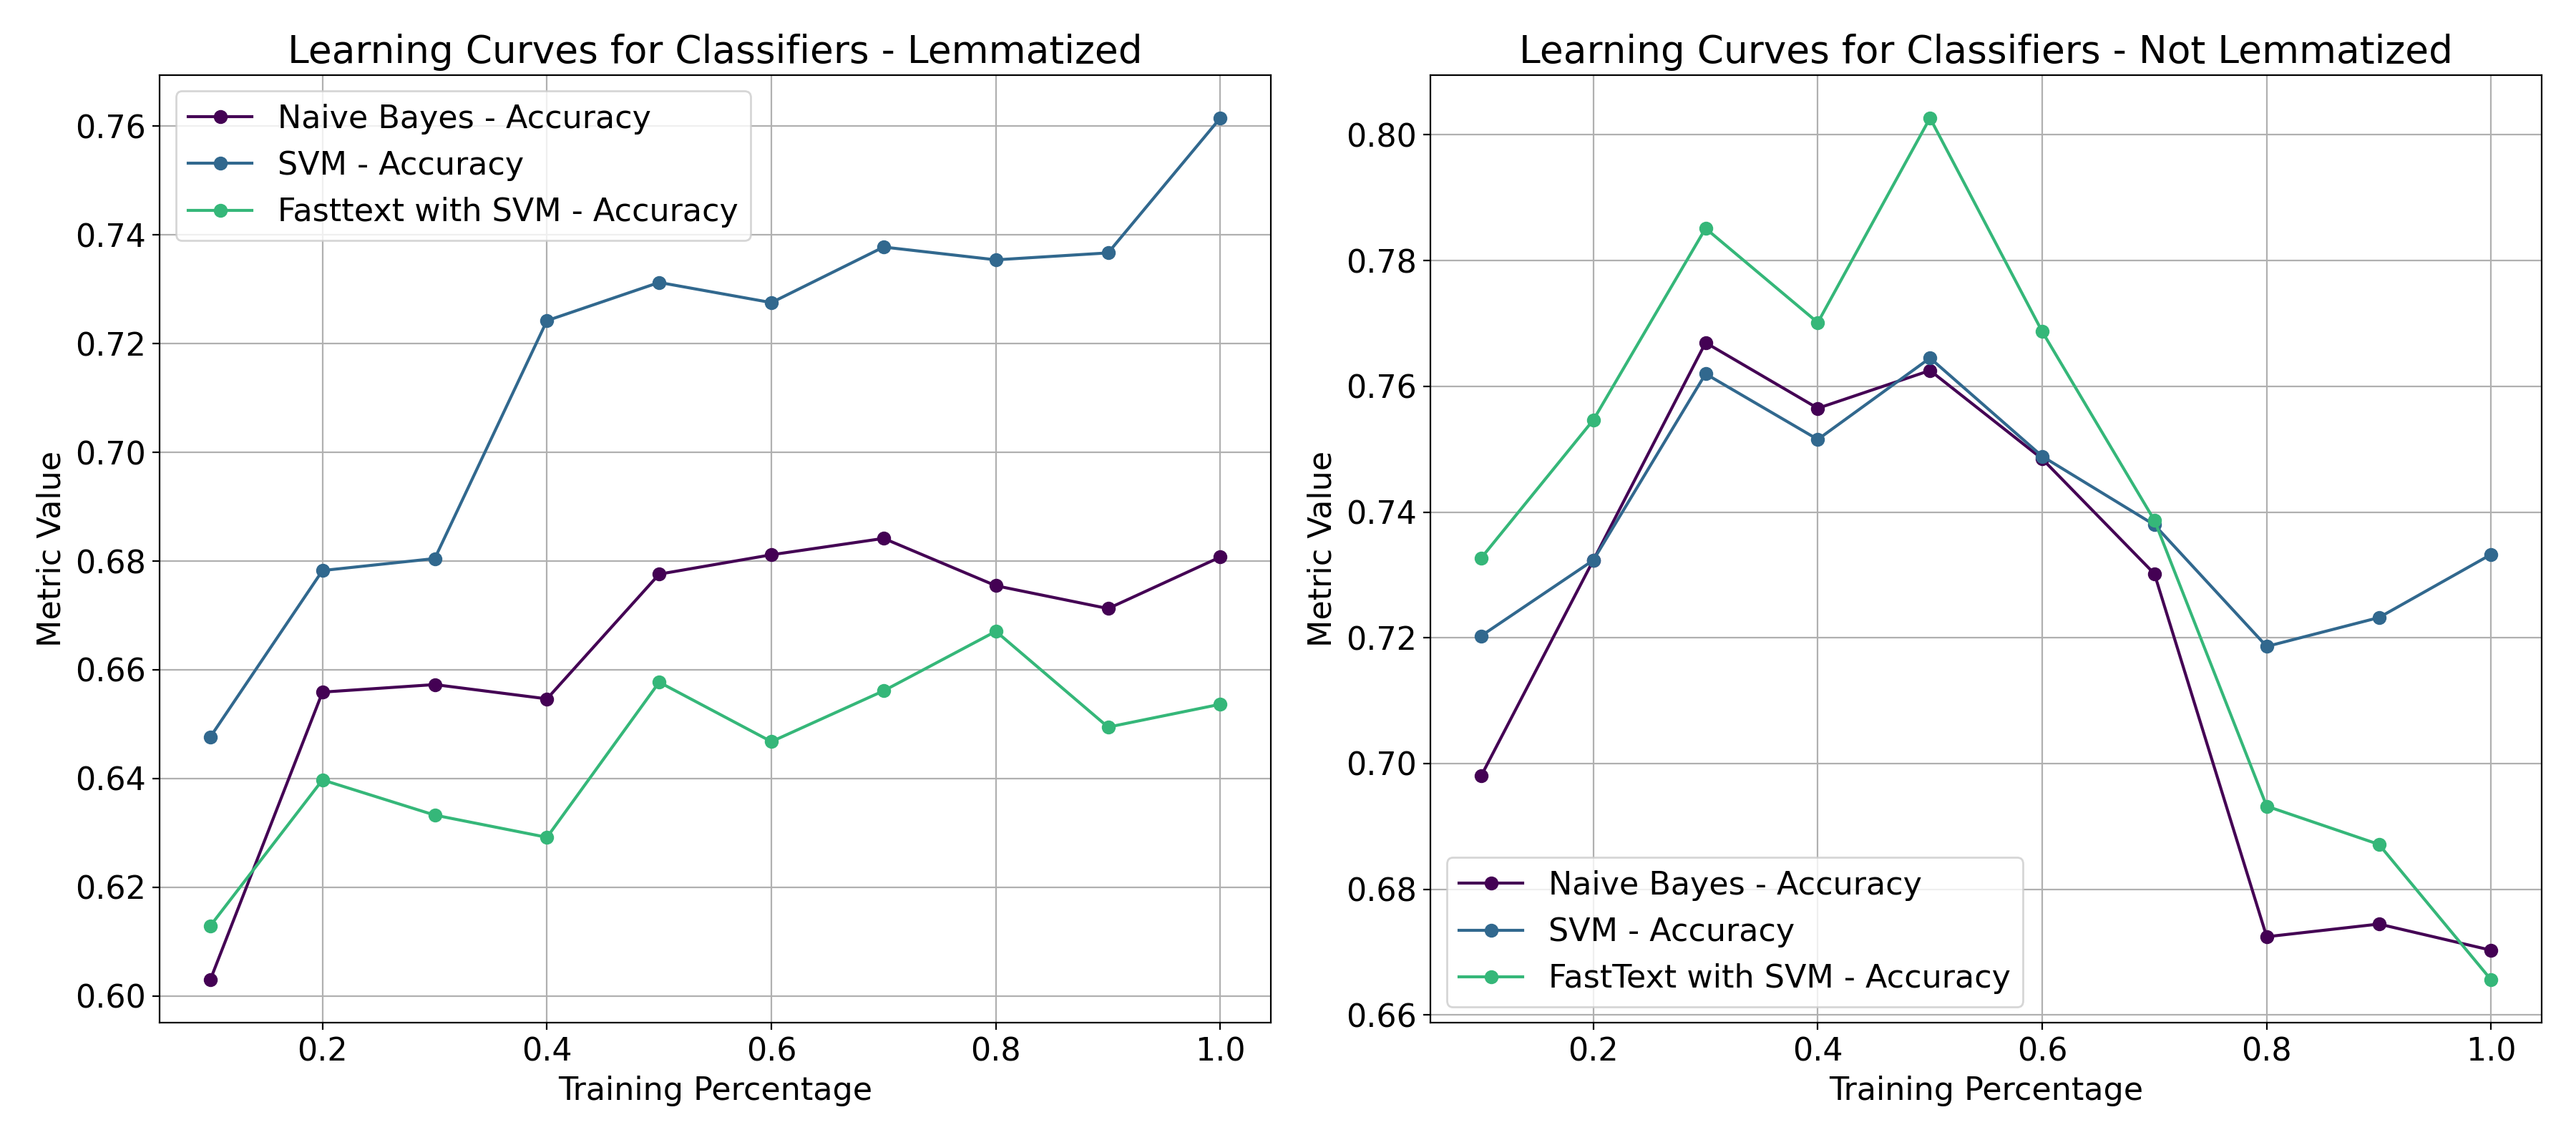

In [273]:
# Set the font size for all text
plt.rcParams.update({'font.size': 16})  # Set a larger font size

# Function to get colors from ROC curve plot
def get_roc_colors(ax):
    lines = ax.lines
    colors = [line.get_color() for line in lines]
    return colors

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Subplot 1 - Learning Curves with Lemmatization
axs[0].set_prop_cycle('color', roc_colors_lemmatized)

axs[0].plot(percentage_splits_nb, accuracy_list_nb, label='Naive Bayes - Accuracy', marker='o')
# Add similar lines for precision, recall, and F1 Score
axs[0].plot(percentage_splits_svm, accuracy_list_svm, label='SVM - Accuracy', marker='o')
# Add similar lines for precision, recall, and F1 Score
axs[0].plot(percentage_splits_fasttext_svm, accuracy_list_fasttext_svm, label='Fasttext with SVM - Accuracy', marker='o')

axs[0].set_title('Learning Curves for Classifiers - Lemmatized')
axs[0].set_xlabel('Training Percentage', fontsize=16)  # Set larger font size
axs[0].set_ylabel('Metric Value', fontsize=16)  # Set larger font size
axs[0].grid(True)
axs[0].legend()

# Subplot 2 - Learning Curves without Lemmatization
axs[1].set_prop_cycle('color', roc_colors_not_lemmatized)

axs[1].plot(percentage_splits_nb_not_lemmatized, accuracy_list_nb_not_lemmatized, label='Naive Bayes - Accuracy', marker='o')
# Add similar lines for precision, recall, and F1 Score
axs[1].plot(percentage_splits_svm_not_lemmatized, accuracy_list_svm_not_lemmatized, label='SVM - Accuracy', marker='o')
# Add similar lines for precision, recall, and F1 Score
axs[1].plot(percentage_splits_fasttext_svm_not_lemmatized, accuracy_list_fasttext_svm_not_lemmatized, label='FastText with SVM - Accuracy', marker='o')

axs[1].set_title('Learning Curves for Classifiers - Not Lemmatized')
axs[1].set_xlabel('Training Percentage', fontsize=16)  # Set larger font size
axs[1].set_ylabel('Metric Value', fontsize=16)  # Set larger font size
axs[1].grid(True)
axs[1].legend()

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

# Producing average sentiment over time chart

In [36]:
df_copy = pd.read_csv('preprocessed_full_data.csv')
df_labelled_copy = pd.read_csv('labelled_data.csv')
len(df_copy), len(df_labelled_copy)

(26766, 9985)

In [54]:
df_labelled_copy.head()

,text,label,processed_text_latvian,tweet_length,stopwords,hashtags,user_mentions,emojis,cleaned_text
0,🎉 VĒSTURISKA UZVARA!Šodien Saeima ar 70 balsīm...,1,🎉 vēsturiska uzvara šodien saeima 70 balsīm pi...,32,0,0,0,0,vēsturisks uzvara šodien saeima balss pieņemt ...
1,Gobzems nometis visas maskas - šobrīd Saeimā ļ...,-1,gobzems nometis visas maskas šobrīd saeimā ļot...,24,0,0,0,0,gobzems nomest viss maska šobrīd saeima ļoti a...
2,Šodien Saeimas komisijā atbalstīja manus un NA...,0,šodien saeimas komisijā atbalstīja manus na pr...,30,0,0,0,0,šodien saeima komisija atbalstīt mans na priek...
3,Latvijas Republikas Saeima gala lasījumā atbal...,0,latvijas republikas saeima gala lasījumā atbal...,26,0,0,0,0,latvija republika saeima gals lasījums atbalst...
4,"""Jūlijas Stepeņenko vīrs, biedrs Vjačeslavs St...",-1,jūlijas stepeņenko vīrs biedrs vjačeslavs step...,19,0,0,1,0,vīrs biedrs stepaņenko suverēns vara mēģināt s...


In [93]:
# Merge based on the 'cleaned_text' column
merged_df = pd.merge(df_copy, df_labelled_copy, how='left', on='cleaned_text')

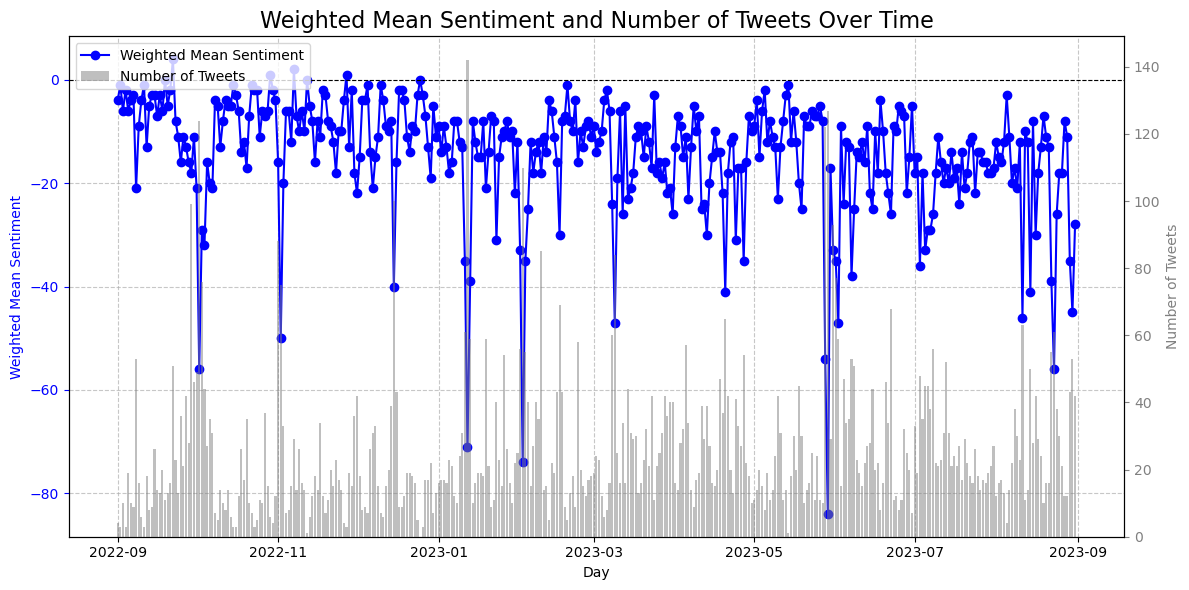

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'timestamp' column is in datetime format
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'])
merged_df['day'] = merged_df['timestamp'].dt.date

# Group by day and calculate the weighted mean sentiment and number of tweets
grouped_data = merged_df.groupby('day')['label'].agg(['sum', 'count']).reset_index()
grouped_data.columns = ['day', 'weighted_mean_sentiment', 'num_tweets']

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Line plot for weighted mean sentiment
ax1.plot(grouped_data['day'], grouped_data['weighted_mean_sentiment'], marker='o', linestyle='-', label='Weighted Mean Sentiment', color='blue')
ax1.set_xlabel('Day')
ax1.set_ylabel('Weighted Mean Sentiment', color='blue')
ax1.tick_params('y', colors='blue')

# Adding a horizontal line at y=0 for reference on the first y-axis
ax1.axhline(y=0, color='black', linestyle='--', linewidth=0.8)

# Creating a secondary y-axis for the bar chart
ax2 = ax1.twinx()
ax2.bar(grouped_data['day'], grouped_data['num_tweets'], alpha=0.5, color='gray', label='Number of Tweets')
ax2.set_ylabel('Number of Tweets', color='gray')
ax2.tick_params('y', colors='gray')

# Adding legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Adding grid lines
ax1.grid(True, linestyle='--', alpha=0.7)

# Adding title
plt.title('Weighted Mean Sentiment and Number of Tweets Over Time', fontsize=16)

# Rotating x-axis labels
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

C:\Users\tomsb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tomsb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tomsb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


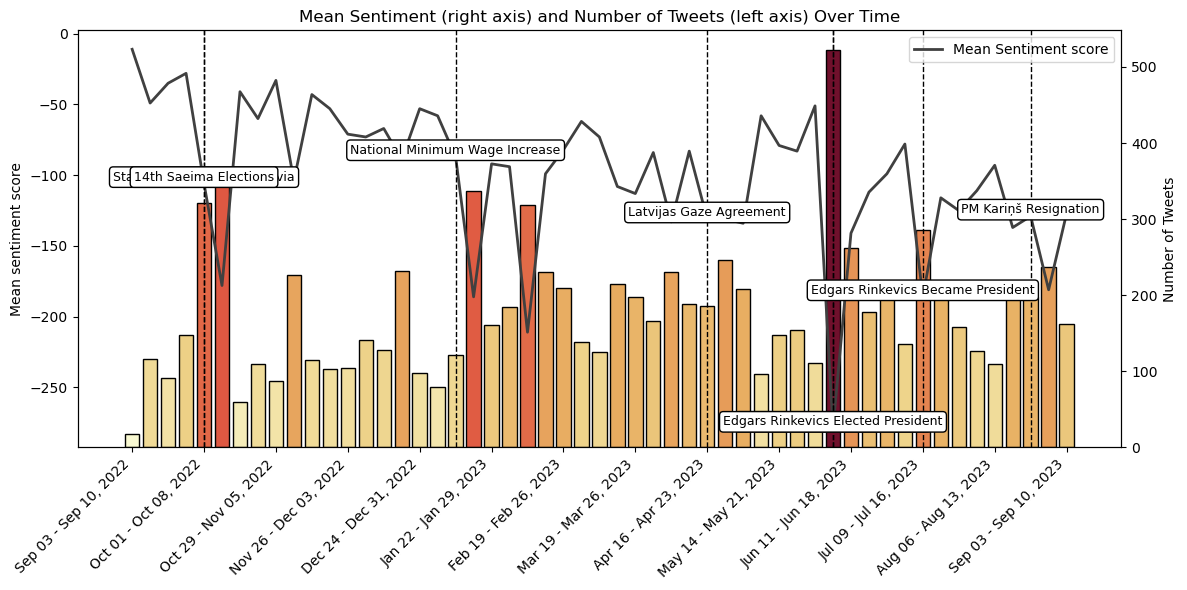

In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize
from matplotlib import cm

# Assuming 'timestamp' column is in datetime format
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'])
merged_df['day'] = merged_df['timestamp'].dt.date

# Extracting week information
merged_df['week'] = merged_df['timestamp'].dt.strftime('%Y-%U')

# Group by week and calculate the weighted mean sentiment and number of tweets
grouped_data = merged_df.groupby('week')['label'].agg(['sum', 'count']).reset_index()
grouped_data.columns = ['week', 'weighted_mean_sentiment', 'num_tweets']

# Normalize the number of tweets to be within the range [0, 1]
norm = Normalize(vmin=grouped_data['num_tweets'].min(), vmax=grouped_data['num_tweets'].max())

# Use the 'YlOrRd' colormap for a transition from light to dark yellow-red
colors = [cm.YlOrRd(norm(value)) for value in grouped_data['num_tweets']]

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Creating a secondary y-axis for the bar chart
ax2 = ax1.twinx()
sns.barplot(x=grouped_data['week'], y=grouped_data['num_tweets'], alpha=1, palette=colors, ax=ax2, edgecolor='black')
ax2.set_ylabel('Number of Tweets', color='black', fontsize=10)
ax2.tick_params('y', colors='black')

# Line plot for weighted mean sentiment with a dark grey color
ax1.plot(grouped_data['week'], grouped_data['weighted_mean_sentiment'], linestyle='-', linewidth=2, color='#404040', label='Mean Sentiment score')

# Adding legend
ax1.legend(loc='upper right')

# Adding grid lines
# ax1.grid(True, linestyle='--', alpha=0.5)

# Setting x-axis labels without overlap
step_size = 4
ax1.set_xticks(grouped_data.index[::step_size])
ax1.set_xticklabels([f"{(pd.to_datetime(week.split('-')[0], format='%Y') + pd.DateOffset(weeks=int(week.split('-')[1]))).strftime('%b %d')} - {(pd.to_datetime(week.split('-')[0], format='%Y') + pd.DateOffset(weeks=int(week.split('-')[1])+1)).strftime('%b %d, %Y')}" for week in grouped_data['week'][::step_size]], rotation=45, ha='right')
ax1.set_ylabel('Mean sentiment score', color='black', fontsize=10)

# Add vertical dashed lines for significant events
events = [
    #{'date': pd.to_datetime('2022-09-27'), 'label': 'State of Emergency in Latvia'},
    {'date': pd.to_datetime('2022-10-01'), 'label': '14th Saeima Elections'},
    #{'date': pd.to_datetime('2022-11-01'), 'label': 'Work Started by 14th Saeima'},
    #{'date': pd.to_datetime('2022-12-14'), 'label': 'Approval of Kariņš\' 2nd Cabinet'},
    {'date': pd.to_datetime('2023-01-01'), 'label': 'National Minimum Wage Increase'},
    {'date': pd.to_datetime('2023-04-14'), 'label': 'Latvijas Gaze Agreement'},
    {'date': pd.to_datetime('2023-05-28'), 'label': 'Latvian Hockey Team Success'},
    #{'date': pd.to_datetime('2023-05-29'), 'label': 'Monday Declared a Holiday'},
    {'date': pd.to_datetime('2023-05-31'), 'label': 'Edgars Rinkevics Elected President'},
   # {'date': pd.to_datetime('2023-06-30'), 'label': 'Latvian Song and Dance Festival'},
    {'date': pd.to_datetime('2023-07-08'), 'label': 'Edgars Rinkevics Became President'},
    {'date': pd.to_datetime('2023-08-14'), 'label': 'PM Kariņš Resignation'}
]

for event in events:
    # Calculate the x-position based on the week of the event date
    x_position = grouped_data[grouped_data['week'] == event['date'].strftime('%Y-%U')].index[0]
    y_position = grouped_data.loc[x_position, 'weighted_mean_sentiment'] + 0.03
    if event['date'] == pd.to_datetime('2022-11-01'):
        y_position -= 0.  # Adjust the y position for November 1, 2022 event
    ax1.axvline(x=x_position, color='black', linestyle='--', linewidth=1)
    ax1.annotate(event['label'], xy=(x_position, grouped_data.loc[x_position, 'weighted_mean_sentiment']),
                  xytext=(x_position, y_position),
                  arrowprops=dict(facecolor='black', arrowstyle='->'),
                  fontsize=9, ha='center', va='bottom', bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

# Adjust zorder to make the line plot appear in front of the bars
ax1.set_zorder(ax2.get_zorder() + 1)
ax1.patch.set_visible(False)

# Adding title
plt.title('Mean Sentiment (right axis) and Number of Tweets (left axis) Over Time', fontsize=12)

plt.tight_layout()
plt.show()

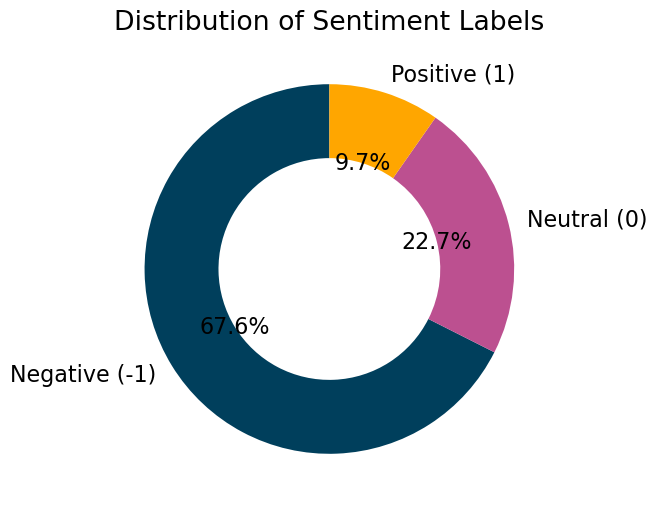

In [299]:
import matplotlib.pyplot as plt

# Get the counts of each sentiment label
sentiment_counts = df_labelled['label'].value_counts()

# Define labels and colors
labels = ['Negative (-1)', 'Neutral (0)', 'Positive (1)']
colors = ['#003f5c', '#bc5090', '#ffa600']

# Create pie chart without a hole in the center
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.4))
plt.gca().add_artist(plt.Circle((0, 0), 0.2, fc='white'))  # Add a white circle to fill the center
plt.title('Distribution of Sentiment Labels')
plt.show()
